# Aluguel de Casas no Brasil
### CRISP-DM Ciclo 1
---

## Preparação

### Imports e configurações

In [98]:
import sqlite3
import numpy                as np
import pandas               as pd
import seaborn              as sns
import matplotlib.pyplot    as plt

from scipy                  import stats
from IPython.core.display   import HTML

# Configurando o estilo dos gráficos
sns.set(style = 'whitegrid', palette = 'tab10', color_codes = True)

cor1 = sns.color_palette('tab10')[0]
cor2 = sns.color_palette('tab10')[1]
cor3 = sns.color_palette('tab10')[2]
cor4 = sns.color_palette('tab10')[3]
cor5 = sns.color_palette('tab10')[4]
cor6 = sns.color_palette('tab10')[5]

# Caminho para o diretório do projeto
homepath = '/Users/guttofranca/Repos/brazilian_houses_for_rent/'

# Connect to sqlite database
conn = sqlite3.connect(homepath + 'data/processed/brazilian_houses.db')
data = pd.read_sql_query("SELECT * FROM rentals", conn)


### Funções

In [99]:
def jupyter_settings():
    
    """
    Plots pre settings.
    """


    %matplotlib inline
    plt.style.use('seaborn-v0_8-whitegrid')
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    display(HTML('<style>.container {width:100% !important;}</style>'))
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option('display.expand_frame_repr', False)
    sns.set()
    
jupyter_settings()

sns.set_style('white')

def overview(data):
    """
    Retorna uma visão geral dos dados fornecidos.

    Parâmetros:
    - data: DataFrame contendo os dados a serem analisados.

    Retorna:
    Um dicionário contendo as seguintes informações:
    - 'Número de Linhas': número de linhas do DataFrame.
    - 'Número de Colunas': número de colunas do DataFrame.
    - 'Tipos de Dados': dicionário com os tipos de dados de cada coluna.
    - 'Valores Nulos': dicionário com a contagem de valores nulos em cada coluna.
    - 'Valores Únicos': dicionário com a contagem de valores únicos em cada coluna.
    - 'Valores Duplicados': número de linhas duplicadas no DataFrame.
    """
    
    return {
        'Número de Linhas': data.shape[0],
        'Número de Colunas': data.shape[1],
        'Tipos de Dados': data.dtypes.to_dict(),
        'Valores Nulos': data.isnull().sum().to_dict(),
        'Valores Únicos': data.nunique().to_dict(),
        'Valores Duplicados': data.duplicated().sum()
    }


def describe_extended(data):
    """
    Retorna um DataFrame contendo estatísticas básicas e estendidas de um conjunto de dados.

    Parâmetros:
    data: (pandas.Series) - O conjunto de dados a ser analisado.

    Retorno:
    DataFrame - Um DataFrame contendo as estatísticas básicas (describe) e estendidas (var, skewness, kurtosis) do conjunto de dados.
    """
    # Use o método describe() para obter as estatísticas básicas
    desc = data.describe()
    
    # Calcule a skewness e a kurtosis para cada coluna
    var = data.var()
    skewness = data.apply(stats.skew)
    kurt = data.apply(stats.kurtosis)

    
    # Crie um novo DataFrame para armazenar as estatísticas estendidas
    extended_stats = pd.DataFrame({'var': var, 'skew': skewness, 'kurtosis': kurt})
    
    # Concatene o DataFrame de descrição básica com o DataFrame de estatísticas estendidas
    return pd.concat([desc, extended_stats.transpose()]).apply(lambda s: s.apply('{0:.3f}'.format))


def identify_outliers(dataframe, variables):
    """
    Identifica os 5 outliers mais extremos para cada variável especificada em um dataframe.

    dataframe(pandas.Series): DataFrame para análise.
    variables(List): Lista de variáveis (colunas) para identificar outliers.
    
    Retorna:  Dicionário de DataFrames, cada um contendo os 5 outliers mais extremos para cada variável.
    """
    outlier_dataframes = {}

    # Calcula os limiares de outliers para cada variável
    for var in variables:
        Q1 = dataframe[var].quantile(0.25)
        Q3 = dataframe[var].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Filtra os outliers
        outliers = dataframe[(dataframe[var] < lower_bound) | (dataframe[var] > upper_bound)]

        # Cria um dataframe com os 5 outliers mais extremos
        outlier_dataframes[var] = pd.DataFrame(outliers.nlargest(5, var), columns=['id', var])

    return outlier_dataframes


## Regras
 
Vocês, obrigatoriamente, terão que responder às 18 perguntas a seguir durante a Análise Exploratória. E com respostas que agreguem valor ao negócio! Uma dica: responda a pergunta e, caso necessário, proponha uma solução :D 
1. Correlação entre área e valor do aluguel: Existe uma correlação significativa entre a área do imóvel (area) e o valor do aluguel (rent amount)? 
2. Impacto da aceitação de animais: Como a aceitação de animais (animal) afeta o valor do aluguel (rent amount)? 
3. Distribuição de imóveis mobiliados: Qual é a proporção de imóveis mobiliados (furniture) e não mobiliados? Existe diferença no valor do aluguel entre eles? 
4. Análise de outliers no valor do IPTU (property tax): Existem outliers significativos no valor do IPTU? Como eles impactam o valor total (total)? 
5. Influência do número de vagas de estacionamento: Como o número de vagas de estacionamento (parking spaces) influencia o valor do aluguel (rent amount)? 
6. Relação entre andar (floor) e valor do aluguel: Existe alguma tendência no valor do aluguel com base no andar do imóvel? 
7. Variação das taxas de condomínio (HOA) por cidade: Como as taxas de condomínio variam entre diferentes cidades?
8. Correlação entre número de banheiros e valor do aluguel: Qual é a relação entre o número de banheiros (bathroom) e o valor do aluguel (rent amount)? 
9. Variação do valor do aluguel por cidade: Como o valor do aluguel (rent amount) varia entre diferentes cidades? 
10. Distribuição do custo total (total): Como é a distribuição do custo total dos aluguéis? 
11. Previsão de valor de aluguel baseado em características **DESAFIO!!!**: Quais características são os melhores preditores para o valor do aluguel? 
12. Proporção do seguro incêndio no custo total: Qual é a proporção do seguro incêndio (fire insurance) no custo total (total)? 
13. Variação do valor do aluguel com base no número de quartos: Como o número de quartos (rooms) afeta o valor do aluguel (rent amount)? 
14. Análise de agrupamento de imóveis **DESAFIO!!!**: É possível identificar grupos de imóveis com características semelhantes? 
15. Influência da localização na taxa de HOA: A localização (cidade) tem impacto significativo na taxa de HOA? 
16. Relação entre área e número de quartos/banheiros: Existe uma relação entre a área do imóvel (area) e o número de quartos (rooms) e banheiros (bathroom)? 
17. Diferenças no valor do aluguel por tipo de mobília: Como a presença ou ausência de mobília (furniture) afeta o valor do aluguel (rent amount)? 
18. Análise de densidade de imóveis por cidade: Qual cidade possui mais imóveis listados para aluguel? 
19. Perfil dos imóveis mais caros e mais baratos: Quais características são comuns nos imóveis com os valores de aluguel mais altos e mais baixos? 
20. Relação entre quantidade de banheiros e quartos: Existe uma correlação entre o número de quartos (rooms) e o número de banheiros (bathroom)?

## Descrição dos dados

---
- **id**: Identificador único dos imóveis.
- **city**: Código da cidade onde o imóvel está localizado.
- **area**: Área do imóvel em metros quadrados.
- **rooms**: Número de quartos.
- **bathroom**: Número de banheiros.
- **parking spaces**: Número de vagas de estacionamento.
- **floor**: Andar do imóvel.
- **animal**: Permissão para animais de estimação (1 para sim, 0 para não).
- **furniture**: Mobiliado (1 para sim, 0 para não).
- **hoa**: Valor do condomínio.
- **rent amount**: Valor do aluguel.
- **property tax**: Valor do IPTU (Imposto Predial e Territorial Urbano).
- **fire insurance**: Valor do seguro contra incêndio.
- **total**: Valor total do aluguel, incluindo todas as taxas.

---


In [100]:
overview(data)

{'Número de Linhas': 6080,
 'Número de Colunas': 14,
 'Tipos de Dados': {'id': dtype('int64'),
  'city': dtype('int64'),
  'area': dtype('int64'),
  'rooms': dtype('int64'),
  'bathroom': dtype('int64'),
  'parking spaces': dtype('int64'),
  'floor': dtype('int64'),
  'animal': dtype('int64'),
  'furniture': dtype('int64'),
  'hoa': dtype('int64'),
  'rent amount': dtype('int64'),
  'property tax': dtype('int64'),
  'fire insurance': dtype('int64'),
  'total': dtype('int64')},
 'Valores Nulos': {'id': 0,
  'city': 0,
  'area': 0,
  'rooms': 0,
  'bathroom': 0,
  'parking spaces': 0,
  'floor': 0,
  'animal': 0,
  'furniture': 0,
  'hoa': 0,
  'rent amount': 0,
  'property tax': 0,
  'fire insurance': 0,
  'total': 0},
 'Valores Únicos': {'id': 6080,
  'city': 2,
  'area': 435,
  'rooms': 9,
  'bathroom': 10,
  'parking spaces': 10,
  'floor': 37,
  'animal': 2,
  'furniture': 2,
  'hoa': 1290,
  'rent amount': 1032,
  'property tax': 1035,
  'fire insurance': 190,
  'total': 4069},
 'V

In [101]:
# Análise estatística
describe_extended(data).T

,count,mean,std,min,25%,50%,75%,max,var,skew,kurtosis
id,6080.000,3039.500,1755.289,0.000,1519.750,3039.500,4559.250,6079.000,3081040.000,0.000,-1.200
city,6080.000,0.863,0.344,0.000,1.000,1.000,1.000,1.000,0.118,-2.115,2.475
area,6080.000,151.144,375.559,10.000,58.000,100.000,200.000,24606.000,141044.927,51.693,3162.252
rooms,6080.000,2.493,1.130,1.000,2.000,3.000,3.000,10.000,1.276,0.528,0.761
bathroom,6080.000,2.342,1.439,1.000,1.000,2.000,3.000,10.000,2.070,1.070,0.772
parking spaces,6080.000,1.756,1.612,0.000,1.000,1.000,2.000,12.000,2.598,1.434,2.682
floor,6080.000,5.672,6.169,0.000,0.000,4.000,9.000,99.000,38.056,2.117,15.488
animal,6080.000,0.767,0.423,0.000,1.000,1.000,1.000,1.000,0.179,-1.266,-0.397
furniture,6080.000,0.260,0.439,0.000,0.000,0.000,1.000,1.000,0.193,1.093,-0.805
hoa,6080.000,1088.426,3981.358,0.000,24.500,650.000,1436.000,220000.000,15851208.553,47.922,2525.963


## Análise Exploratória de Dados (EDA)

### Visão Geral dos Dados:
- Número de Linhas: 6080
- Número de Colunas: 14
- Tipos de Dados: Todos são inteiros
- Valores Nulos: Não há valores nulos em nenhuma coluna.
- Valores Únicos: Existem 2 cidades, 435 áreas de imóveis diferentes sendo nenhum duplicado
- Valores Duplicados: 0

### Análise Estatística Descritiva:
- Área: Varia de 10 a 24.606 m², com média de 151,14 m².
- Quartos: A maioria dos imóveis tem entre 1 e 3 quartos.
- Banheiros: Em média, os imóveis possuem 2,34 banheiros.
- Vagas de Estacionamento: Média de 1,76 vagas por imóvel.
- Andar: Varia de 0 (possivelmente térreo) a 99, com média de 5,67.
- Animais de Estimação: A maioria dos imóveis permite animais (76,74%).
- Mobília: 26,02% dos imóveis são mobiliados.
- Custos Financeiros: O valor do aluguel varia significativamente, com uma média de R$ 4.395,84.

### Outliers

In [102]:
variables = ['rent amount', 'area', 'hoa', 'property tax']
outliers_df = identify_outliers(data, variables)


In [103]:
outliers_df['area']

,id,area
4178,4178,24606
5494,5494,12732
3983,3983,1600
5178,5178,1000
1533,1533,999


In [104]:
outliers_df['hoa']

,id,hoa
1269,1269,220000
3303,3303,200000
4438,4438,14130
832,832,10000
5752,5752,9900


In [105]:
outliers_df['property tax']

,id,property tax
5627,5627,366300
2611,2611,313700
5025,5025,10830
3694,3694,9500
4356,4356,9500


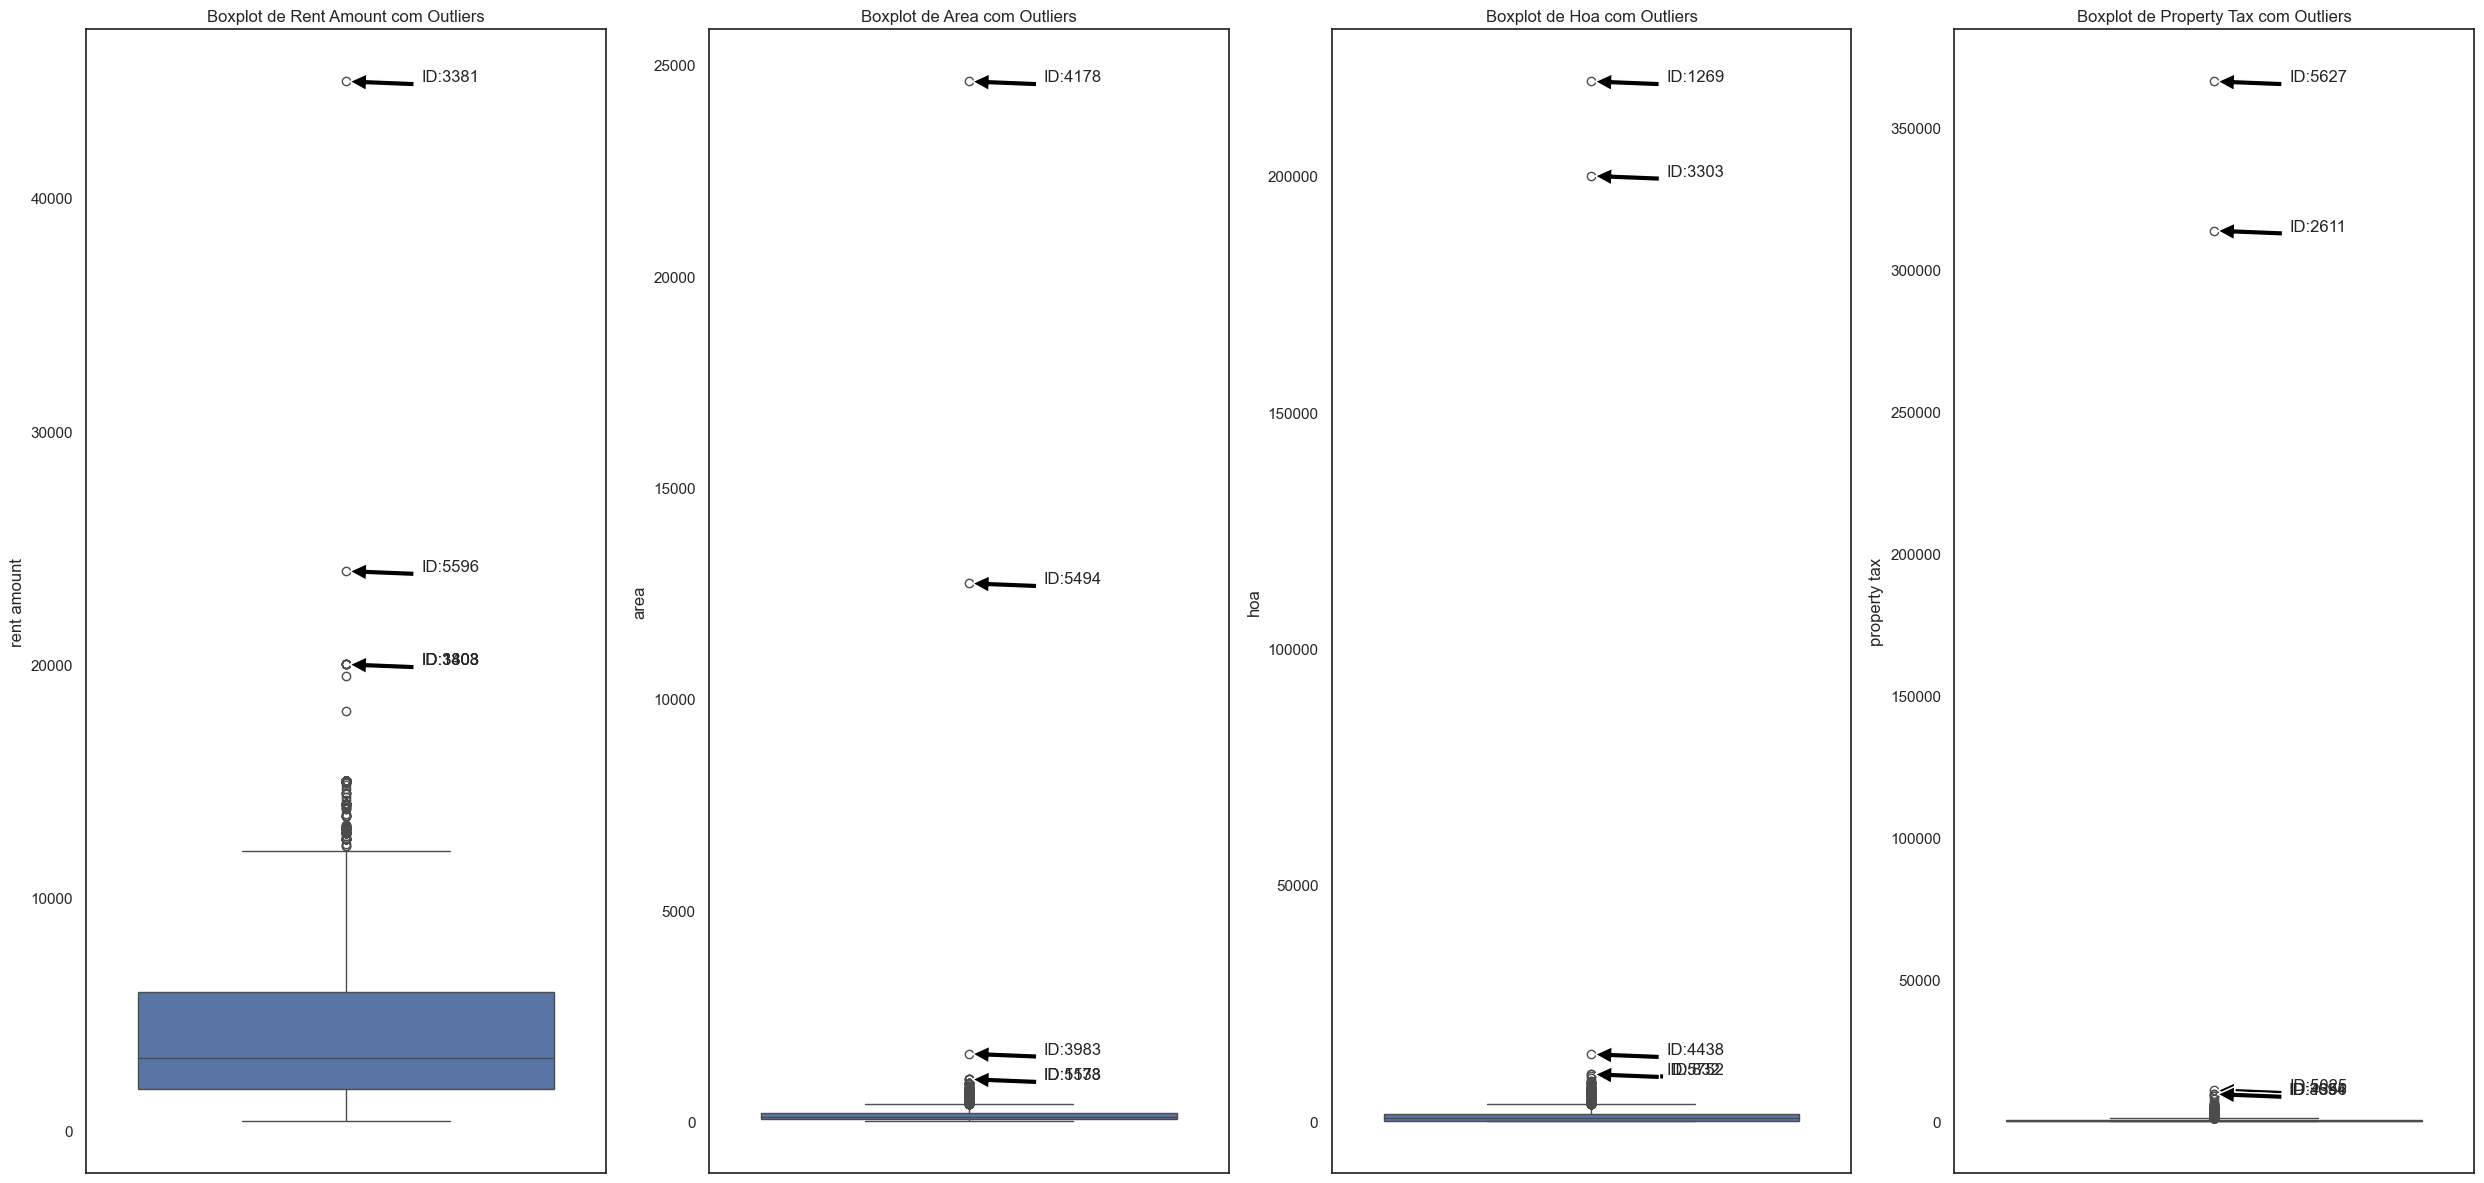

In [106]:
# Configurando o tamanho dos gráficos
plt.figure()

# Criando boxplots e anotando os top 5 outliers para cada variável
for i, var in enumerate(variables, 1):
    plt.subplot(1, 4, i)
    sns.boxplot(y = data[var])
    plt.title(f'Boxplot de {var.title()} com Outliers')

    # Anotando os top 5 outliers
    for index, row in outliers_df[var].iterrows():
        plt.annotate(f'ID:{row["id"]}', xy=(0, row[var]), xytext=(0.2, row[var]),
                     arrowprops=dict(facecolor='black', shrink=0.05), ha='center')

plt.tight_layout()
plt.savefig(homepath + 'reports/figures/boxplot_outliers.png')
plt.show()

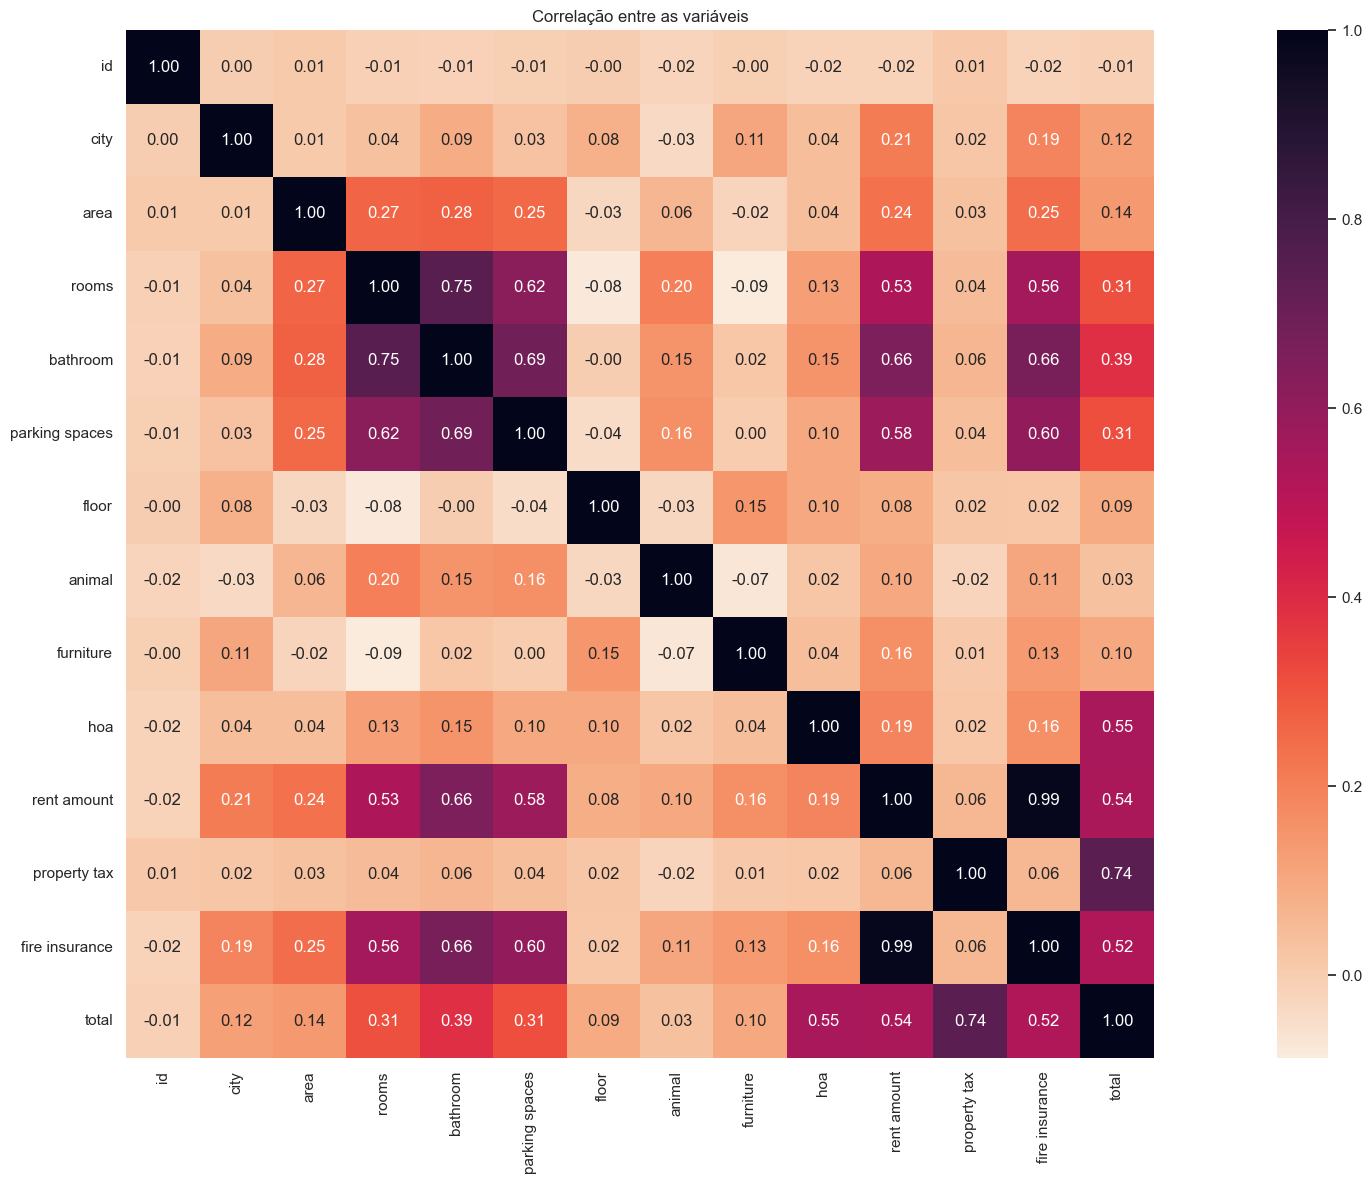

In [107]:
# Criando um heatmap para verificar a correlação entre as variáveis
corr = data.corr()
sns.heatmap(corr, cmap = 'rocket_r', fmt = '.2f', square = True, linecolor = 'white', annot = True)

plt.title('Correlação entre as variáveis')
plt.tight_layout();
plt.savefig(homepath + 'reports/figures/correlation.png')



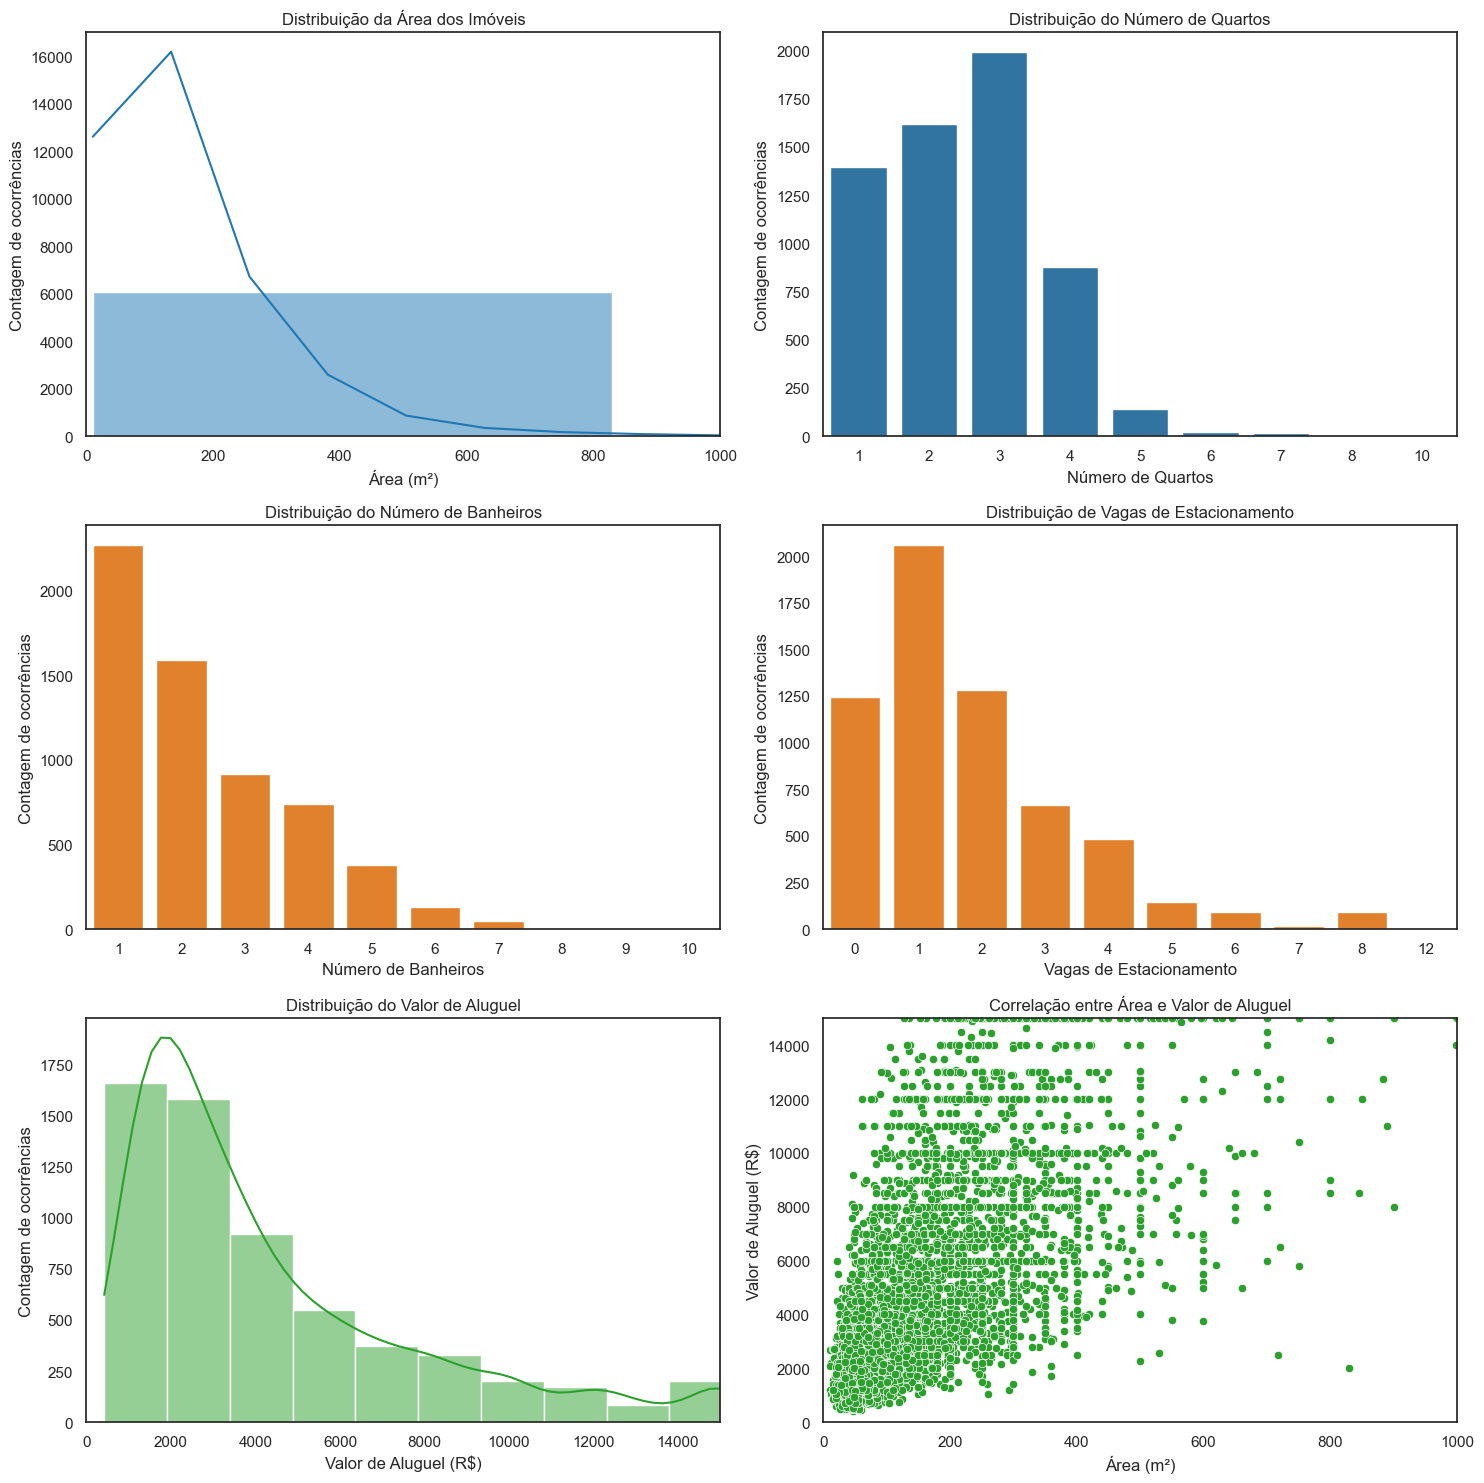

In [108]:
# Criando um conjunto de figuras para várias análises
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

# Distribuição de Área
sns.histplot(data['area'], bins=30, ax=axes[0, 0], kde=True, color = cor1)
axes[0, 0].set_title('Distribuição da Área dos Imóveis')
axes[0, 0].set_xlim(0, 1000) # Limitando
axes[0, 0].set_xlabel('Área (m²)')
axes[0, 0].set_ylabel('Contagem de ocorrências')

# Distribuição de Quartos
sns.countplot(x='rooms', data=data, ax=axes[0, 1], color = cor1)
axes[0, 1].set_title('Distribuição do Número de Quartos')
axes[0, 1].set_xlabel('Número de Quartos')
axes[0, 1].set_ylabel('Contagem de ocorrências')

# Distribuição de Banheiros
sns.countplot(x='bathroom', data=data, ax=axes[1, 0], color = cor2)
axes[1, 0].set_title('Distribuição do Número de Banheiros')
axes[1, 0].set_xlabel('Número de Banheiros')
axes[1, 0].set_ylabel('Contagem de ocorrências')

# Distribuição de Vagas de Estacionamento
sns.countplot(x='parking spaces', data=data, ax=axes[1, 1], color = cor2)
axes[1, 1].set_title('Distribuição de Vagas de Estacionamento')
axes[1, 1].set_xlabel('Vagas de Estacionamento')
axes[1, 1].set_ylabel('Contagem de ocorrências')

# Distribuição do Valor de Aluguel
sns.histplot(data['rent amount'], bins=30, ax=axes[2, 0], kde=True, color = cor3)
axes[2, 0].set_title('Distribuição do Valor de Aluguel')
axes[2, 0].set_xlim(0, 15000) # Limitando 
axes[2, 0].set_xlabel('Valor de Aluguel (R$)')
axes[2, 0].set_ylabel('Contagem de ocorrências')

# Correlação entre Área e Valor de Aluguel
sns.scatterplot(x='area', y='rent amount', data=data, ax=axes[2, 1], color = cor3)
axes[2, 1].set_title('Correlação entre Área e Valor de Aluguel')
axes[2, 1].set_xlim(0, 1000) # Limitando
axes[2, 1].set_ylim(0, 15000)
axes[2, 1].set_xlabel('Área (m²)')
axes[2, 1].set_ylabel('Valor de Aluguel (R$)')

plt.tight_layout();
plt.savefig(homepath + 'reports/figures/distribuições.png')

#### Outliers

- Existem outliers em várias variáveis, como area, hoa (valor do condomínio), e property tax, o que pode indicar propriedades excepcionais ou erros de entrada de dados.

#### Correlações Significativas

- Há uma forte correlação positiva entre o rent amount (valor do aluguel) e o fire insurance (seguro contra incêndio), faz sentido pois o valor do seguro geralmente é proporcional ao valor do aluguel.
- O número de bathrooms (banheiros) e rooms (quartos) também mostra uma forte correlação com o rent amount, indicando que imóveis maiores tendem a ter aluguéis mais altos.
- Total tem uma correlação significativa com property tax (IPTU), sugerindo que imóveis com taxas mais altas também tendem a ter custos totais mais elevados.

#### Distribuição das Variáveis

- A maioria dos imóveis tem entre 2 e 3 quartos e 1 a 2 vagas de estacionamento.
- A área dos imóveis varia consideravelmente, com alguns casos extremos (por exemplo, área máxima de 24.606 m²).
- O floor (andar) tem uma distribuição interessante, com muitos imóveis localizados no térreo (valor 0).

### 1. Correlação entre área e valor do aluguel: Existe uma correlação significativa entre a área do imóvel (area) e o valor do aluguel (rent amount)?

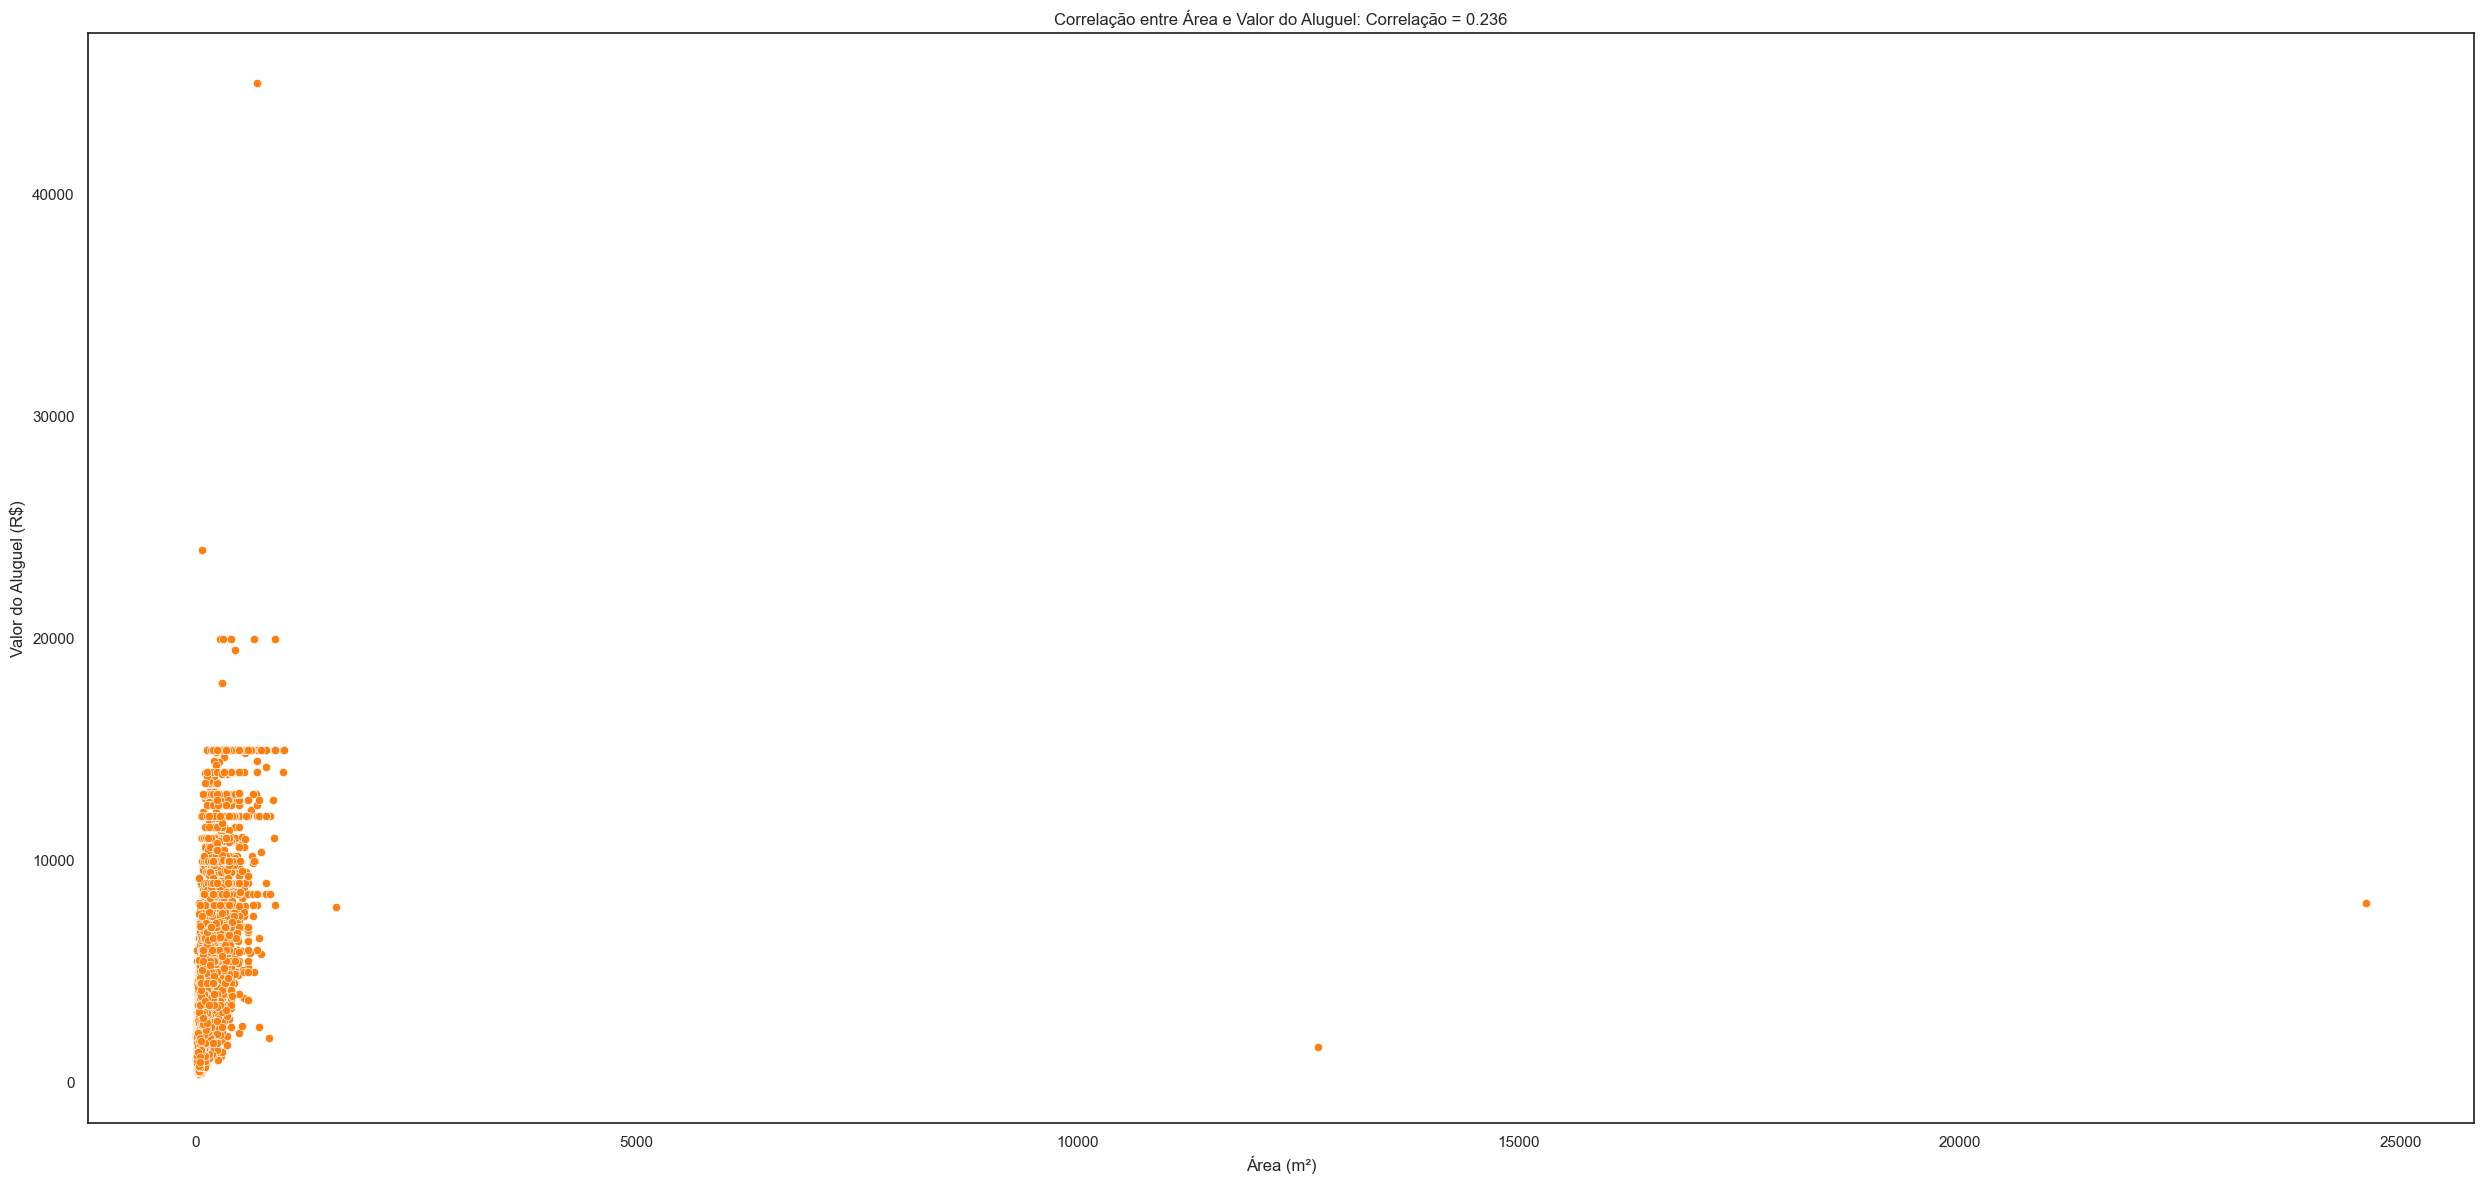

In [109]:
# Calculando o coeficiente de correlação entre 'area' e 'rent amount'
question_1 = data['area'].corr(data['rent amount'])

sns.scatterplot(x = 'area', y = 'rent amount', data = data, color = cor2)

# Título e labels
plt.title(f'Correlação entre Área e Valor do Aluguel: Correlação = {round(question_1, 3)}')
plt.xlabel('Área (m²)')
plt.ylabel('Valor do Aluguel (R$)')

plt.tight_layout()
plt.savefig(homepath + 'reports/figures/pergunta1.png')

- Esse valor corresponde a uma correlação positiva fraca entre Área e Valor do Aluguel. Embora haja alguma tendência de que imóveis maiores tenham aluguéis mais altos, outros fatores também desempenham um papel importante na determinação do valor do aluguel.

### 2. Impacto da aceitação de animais: Como a aceitação de animais (animal) afeta o valor do aluguel (rent amount)? 

Média do valor do aluguel para imóveis que aceitam animais: R$4585.85 
Média do valor do aluguel para imóveis que não aceitam animais: R$3768.86


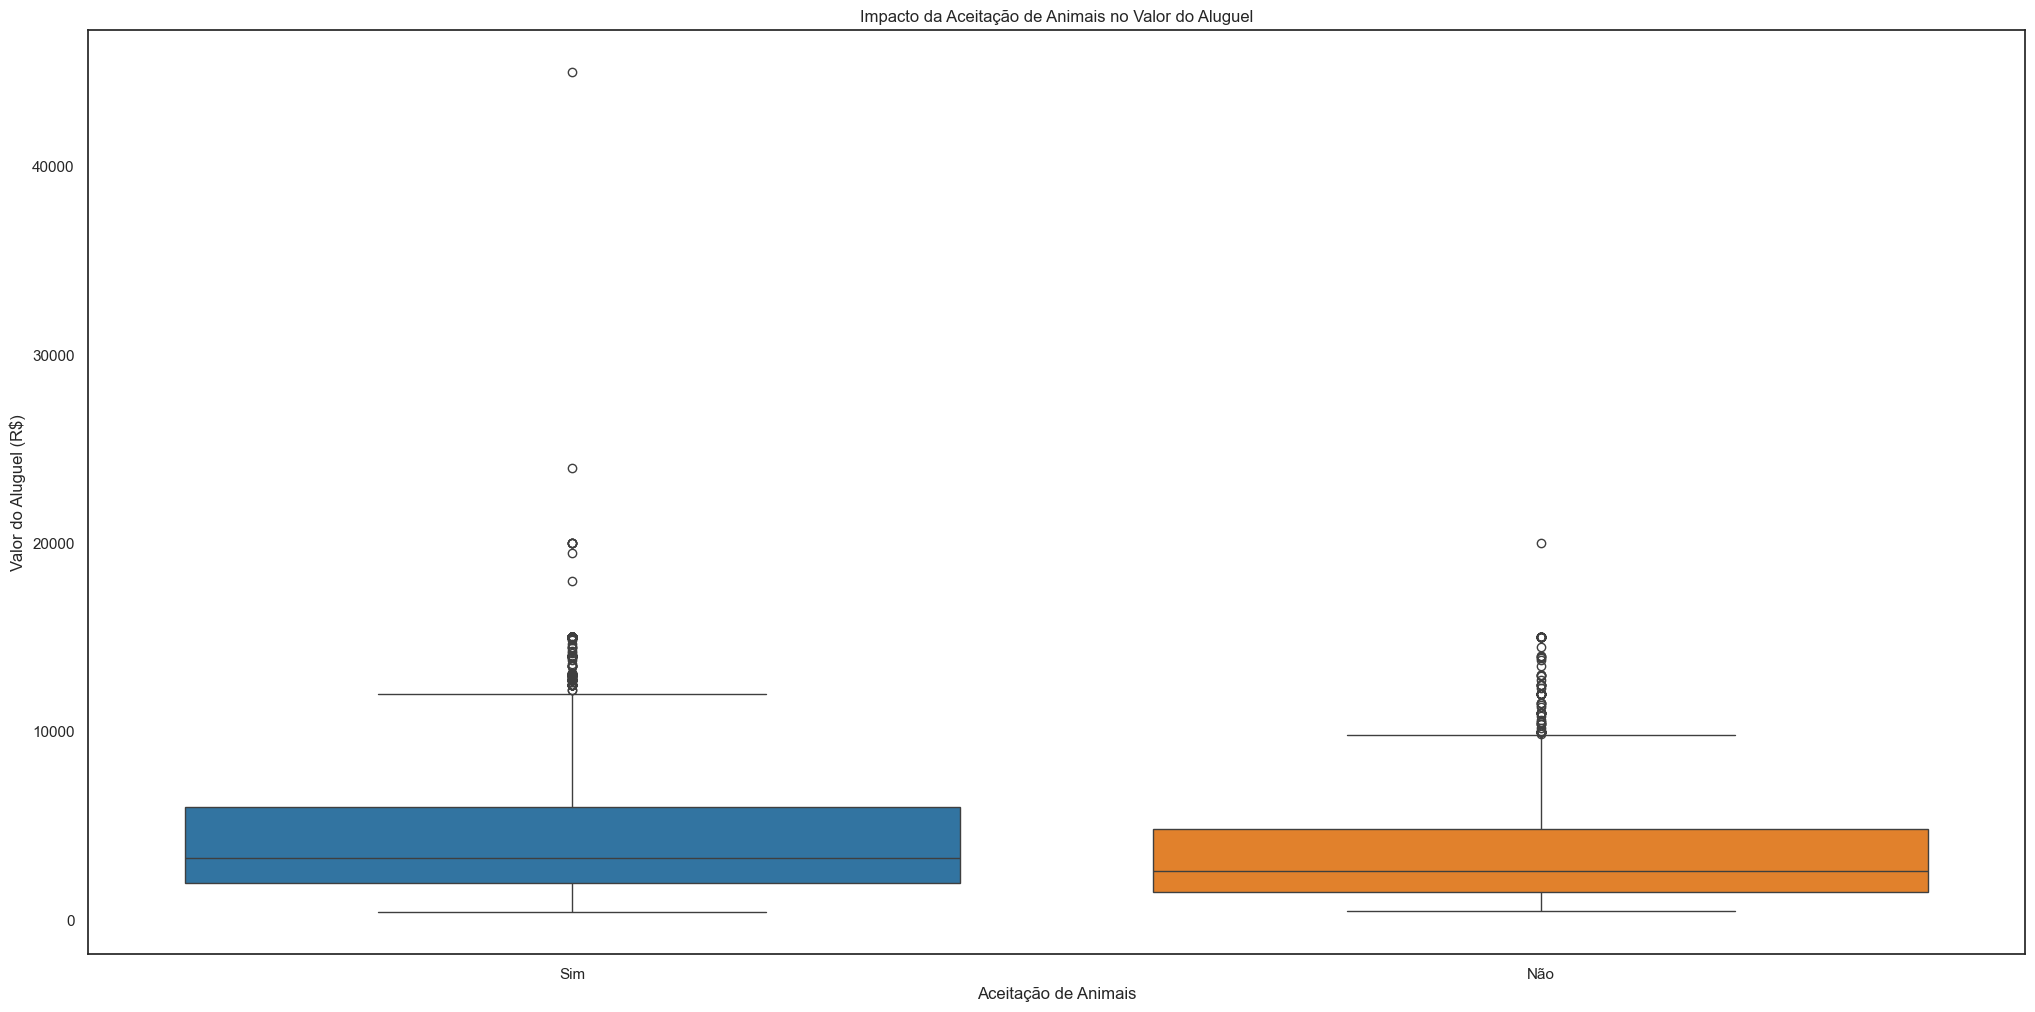

In [110]:
# Gráfico de caixa para comparar o valor do aluguel em imóveis que aceitam e não aceitam animais
sns.boxplot(x = data['animal'].replace({0: 'Não', 1: 'Sim'}), y = data['rent amount'], palette = (cor1, cor2), hue = data['animal'].replace({0: 'Não', 1: 'Sim'}))

# Título e labels
plt.title('Impacto da Aceitação de Animais no Valor do Aluguel')
plt.xlabel('Aceitação de Animais')
plt.ylabel('Valor do Aluguel (R$)')
plt.savefig(homepath + 'reports/figures/pergunta2.png')

# Calculando a média do valor do aluguel para imóveis que aceitam e não aceitam animais
mean_animal_accepted = data[data['animal'] == 1]['rent amount'].mean()
mean_animal_not_accepted = data[data['animal'] == 0]['rent amount'].mean()

print(f'Média do valor do aluguel para imóveis que aceitam animais: R${round(mean_animal_accepted, 2)} \nMédia do valor do aluguel para imóveis que não aceitam animais: R${round(mean_animal_not_accepted, 2)}')

- Média do Valor do Aluguel: A média do valor do aluguel para imóveis que aceitam animais é aproximadamente R$ 4.586. Para imóveis que não aceitam animais, a média do aluguel é cerca de R$ 3.769.

- Distribuição do Valor do Aluguel: O gráfico de caixa mostra uma distribuição ligeiramente mais alta de valores de aluguel para imóveis que aceitam animais em comparação com aqueles que não aceitam.

- Estes valores sugerem que a aceitação de animais de estimação pode estar associada a um valor de aluguel mais alto, entretanto, pela pequena variação, essa diferença pode ser motivada pela soma de outros fatores como localização e tamanho do imóvel.

### 3. Distribuição de imóveis mobiliados: Qual é a proporção de imóveis mobiliados (furniture) e não mobiliados? Existe diferença no valor do aluguel entre eles? 

furniture
Não    0.739803
Sim    0.260197
Name: proportion, dtype: float64
furniture
Não    4047.210760
Sim    5387.092288
Name: rent amount, dtype: float64


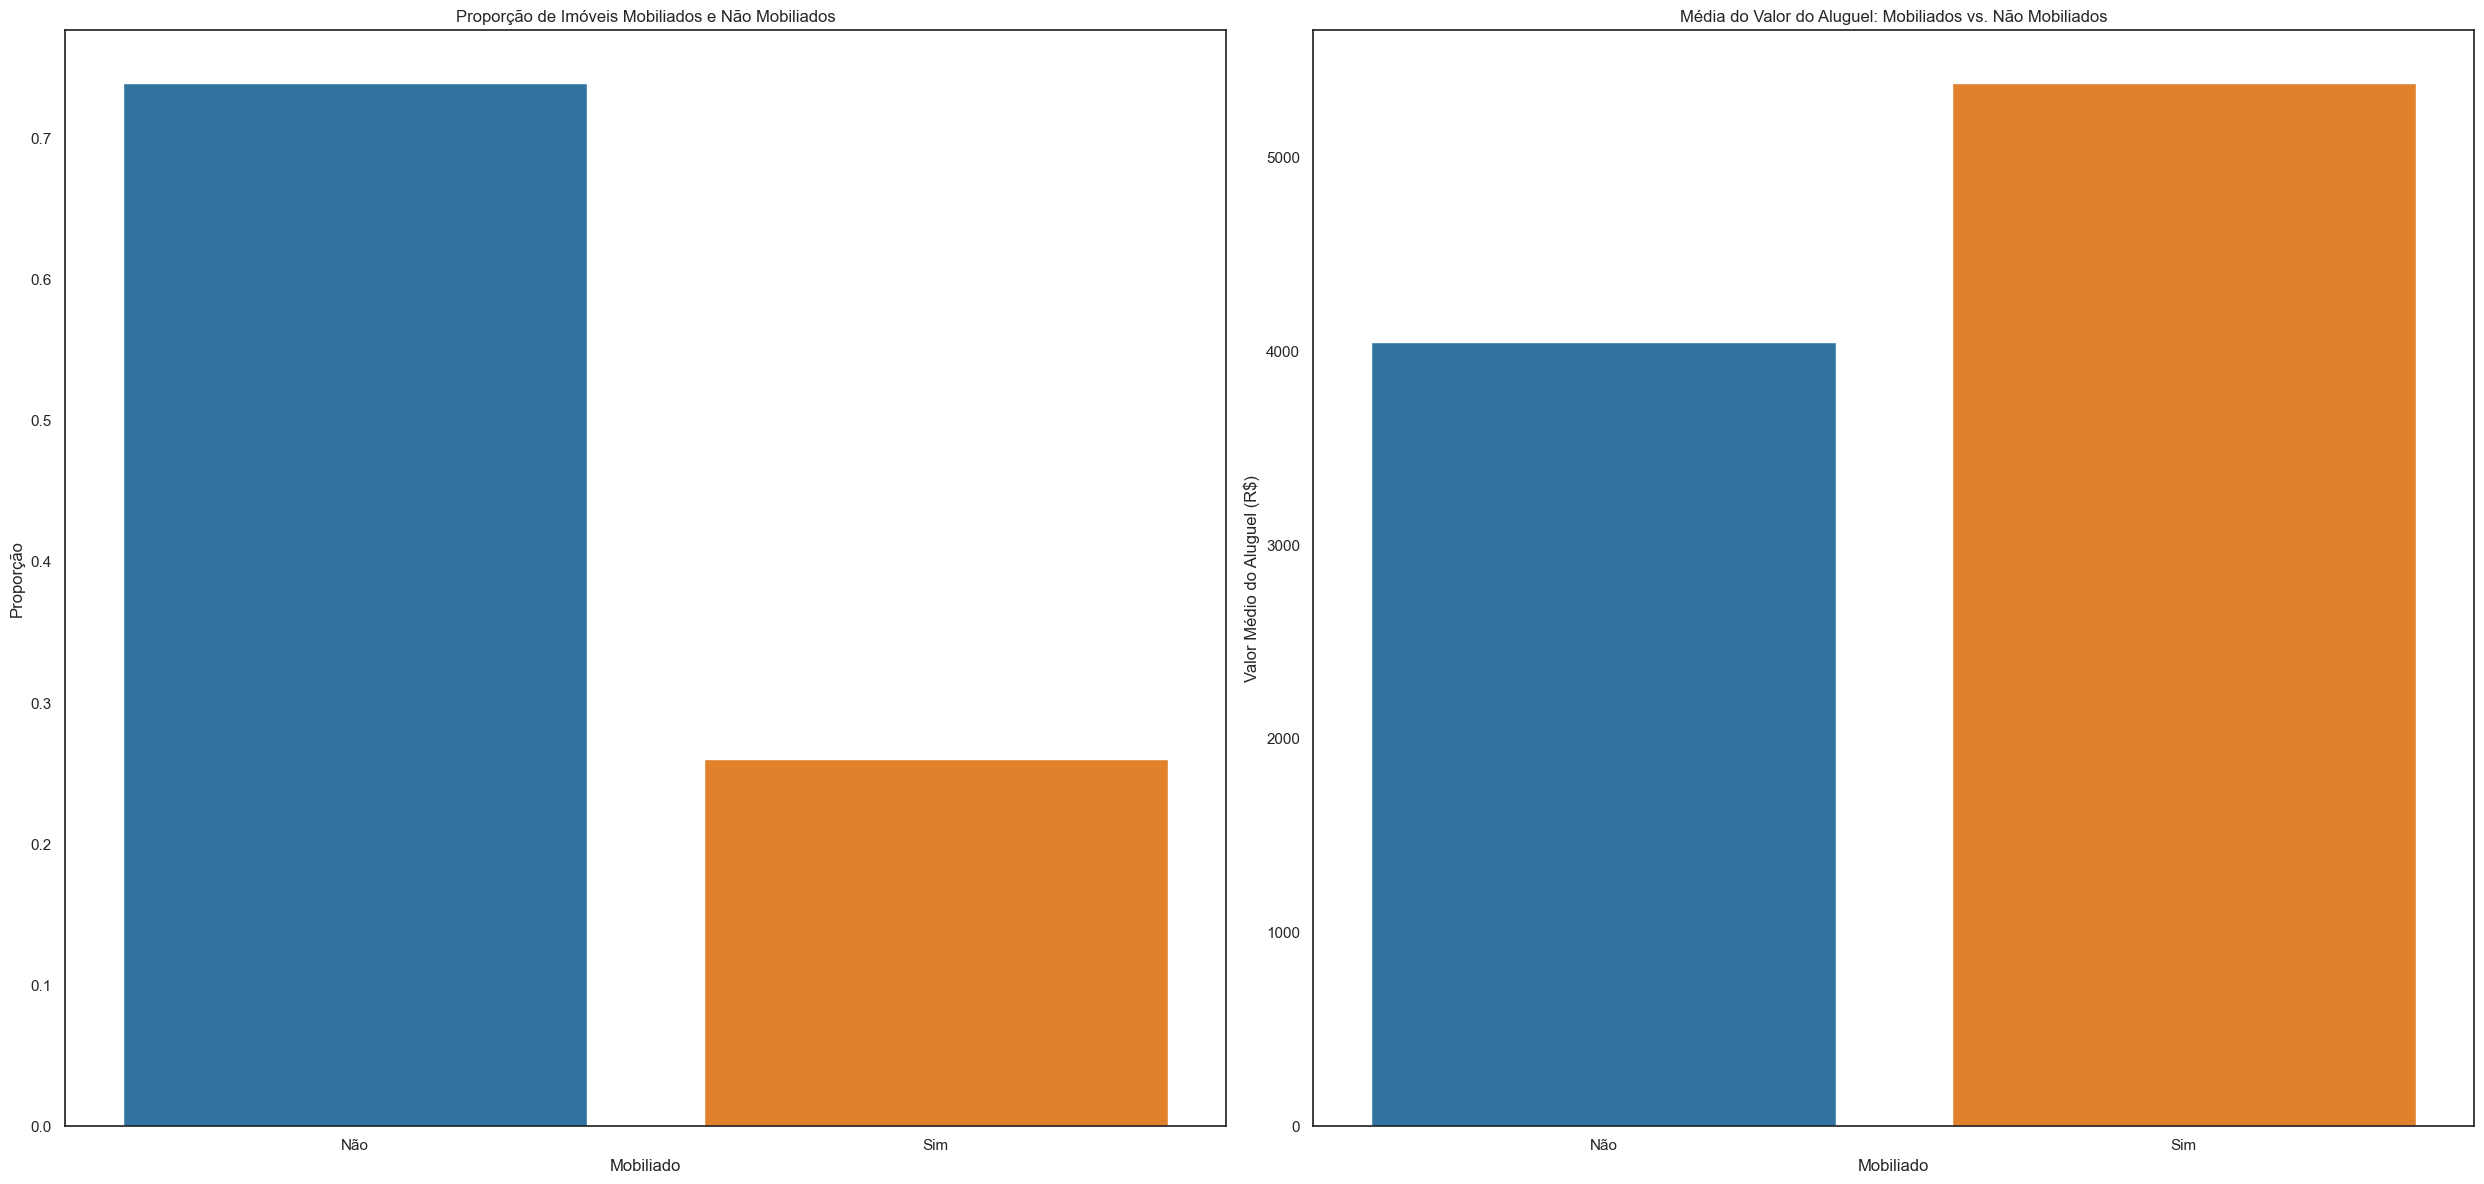

In [111]:
# Proporção de imóveis mobiliados e não mobiliados
prop_furniture = data['furniture'].map({0: 'Não', 1: 'Sim'}).value_counts(normalize = True)

# Calculando a média do valor do aluguel para imóveis mobiliados e não mobiliados
mean_rent_furniture = data.groupby(data['furniture'].map({0: 'Não', 1: 'Sim'}))['rent amount'].mean()

# Gráfico de barras para a proporção de imóveis mobiliados e não mobiliados
plt.figure()

plt.subplot(1, 2, 1)
sns.barplot(x = prop_furniture.index, y = prop_furniture.values, hue = prop_furniture.index, palette = [cor1, cor2])
plt.title('Proporção de Imóveis Mobiliados e Não Mobiliados')
plt.xlabel('Mobiliado')
plt.ylabel('Proporção')

# Gráfico de barras para a média do valor do aluguel de imóveis mobiliados e não mobiliados
plt.subplot(1, 2, 2)
sns.barplot(x = mean_rent_furniture.index, y = mean_rent_furniture.values, hue = mean_rent_furniture.index ,palette = [cor1, cor2])
plt.title('Média do Valor do Aluguel: Mobiliados vs. Não Mobiliados')
plt.xlabel('Mobiliado')
plt.ylabel('Valor Médio do Aluguel (R$)')

plt.tight_layout();
print(prop_furniture)
print(mean_rent_furniture)

plt.savefig(homepath + 'reports/figures/pergunta3.png')

Proporção de Imóveis Mobiliados e Não Mobiliados:

- Cerca de 73.98% dos imóveis não são mobiliados.
- Aproximadamente 26.02% dos imóveis são mobiliados.

Diferença no Valor do Aluguel entre Imóveis Mobiliados e Não Mobiliados:
    
- A média do valor do aluguel para imóveis não mobiliados é de aproximadamente R$ 4.047.
- Para imóveis mobiliados, a média do valor do aluguel é de cerca de R$ 5.387.

Isso sugere que, em média, imóveis mobiliados têm um valor de aluguel mais alto em comparação com imóveis não mobiliados, o que faz sentido.

### 4. Análise de outliers no valor do IPTU (property tax): Existem outliers significativos no valor do IPTU? Como eles impactam o valor total (total)?

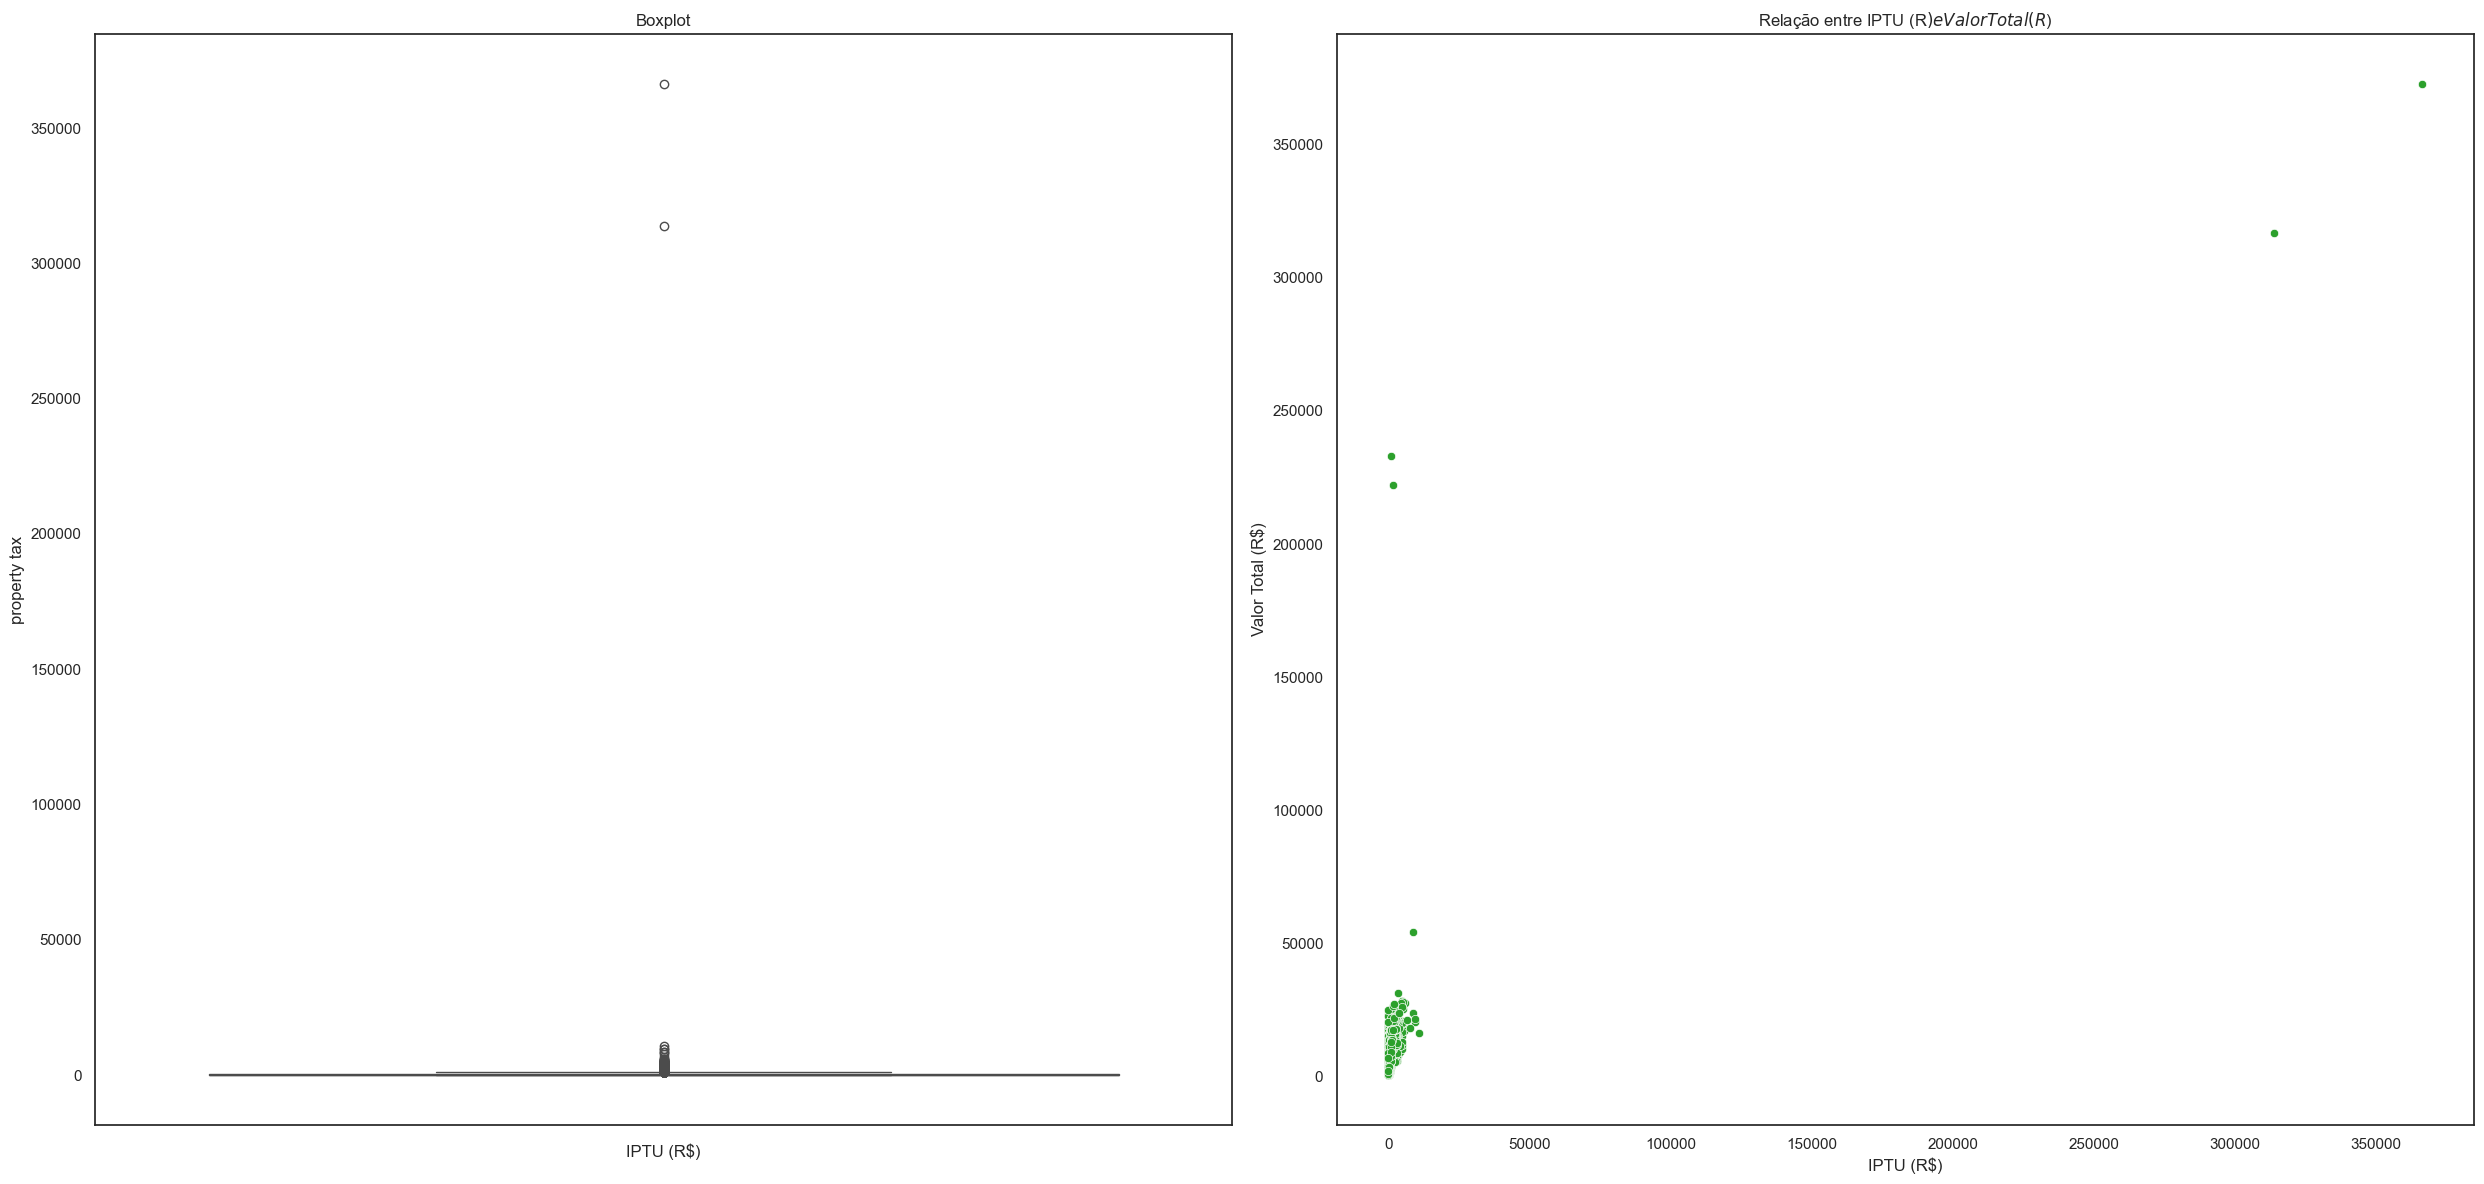

In [112]:
plt.figure()

# Boxplot do IPTU
plt.subplot(1, 2, 1)
sns.boxplot(data['property tax'])
plt.title('Boxplot')
plt.xlabel('IPTU (R$)')

# Gráfico de dispersão entre IPTU e valor total
plt.subplot(1, 2, 2)
sns.scatterplot(x = 'property tax', y = 'total', data = data, color = cor3)
plt.title('Relação entre IPTU (R$) e Valor Total (R$)')
plt.xlabel('IPTU (R$)')
plt.ylabel('Valor Total (R$)')

plt.tight_layout();
plt.savefig(homepath + 'reports/figures/pergunta4.png')

In [113]:
Q1_iptu = data['property tax'].quantile(0.25)
Q3_iptu = data['property tax'].quantile(0.75)
IQR_iptu = Q3_iptu - Q1_iptu
outlier_threshold_iptu_upper = Q3_iptu + 1.5 * IQR_iptu

# Filtrando outliers
outliers_iptu = data[data['property tax'] > outlier_threshold_iptu_upper]

# Proporção de outliers no IPTU
proporcao_outliers_iptu = len(outliers_iptu) / len(data)
print(f'A proporção de imóveis considerados como outliers no iptu é de {proporcao_outliers_iptu*100}%.')

A proporção de imóveis considerados como outliers no iptu é de 8.68421052631579%.


Boxplot do IPTU:
- O boxplot mostra a presença de diversos outliers no valor do IPTU, indicando que há valores significativamente mais altos do que a maioria. Esses IDs já foram identificados anteriormente.

Relação entre IPTU e Valor Total:
- O gráfico de dispersão mostra que, embora a maioria dos imóveis tenha valores de IPTU e totais moderados, existem alguns casos com IPTU extremamente alto.

Proporção de Outliers no IPTU:
- A proporção de imóveis considerados como outliers no valor do IPTU é aproximadamente 8.68%.

Isso indica que os outliers no valor do IPTU têm um impacto significativo no valor total, especialmente em imóveis com taxas de IPTU muito altas. 
- Obs: Imóveis em áreas de alto valor imobiliário demandam uma análise mais detalhada futuramente, com mais dados.

### 5. Influência do número de vagas de estacionamento: Como o número de vagas de estacionamento (parking spaces) influencia o valor do aluguel (rent amount)? 

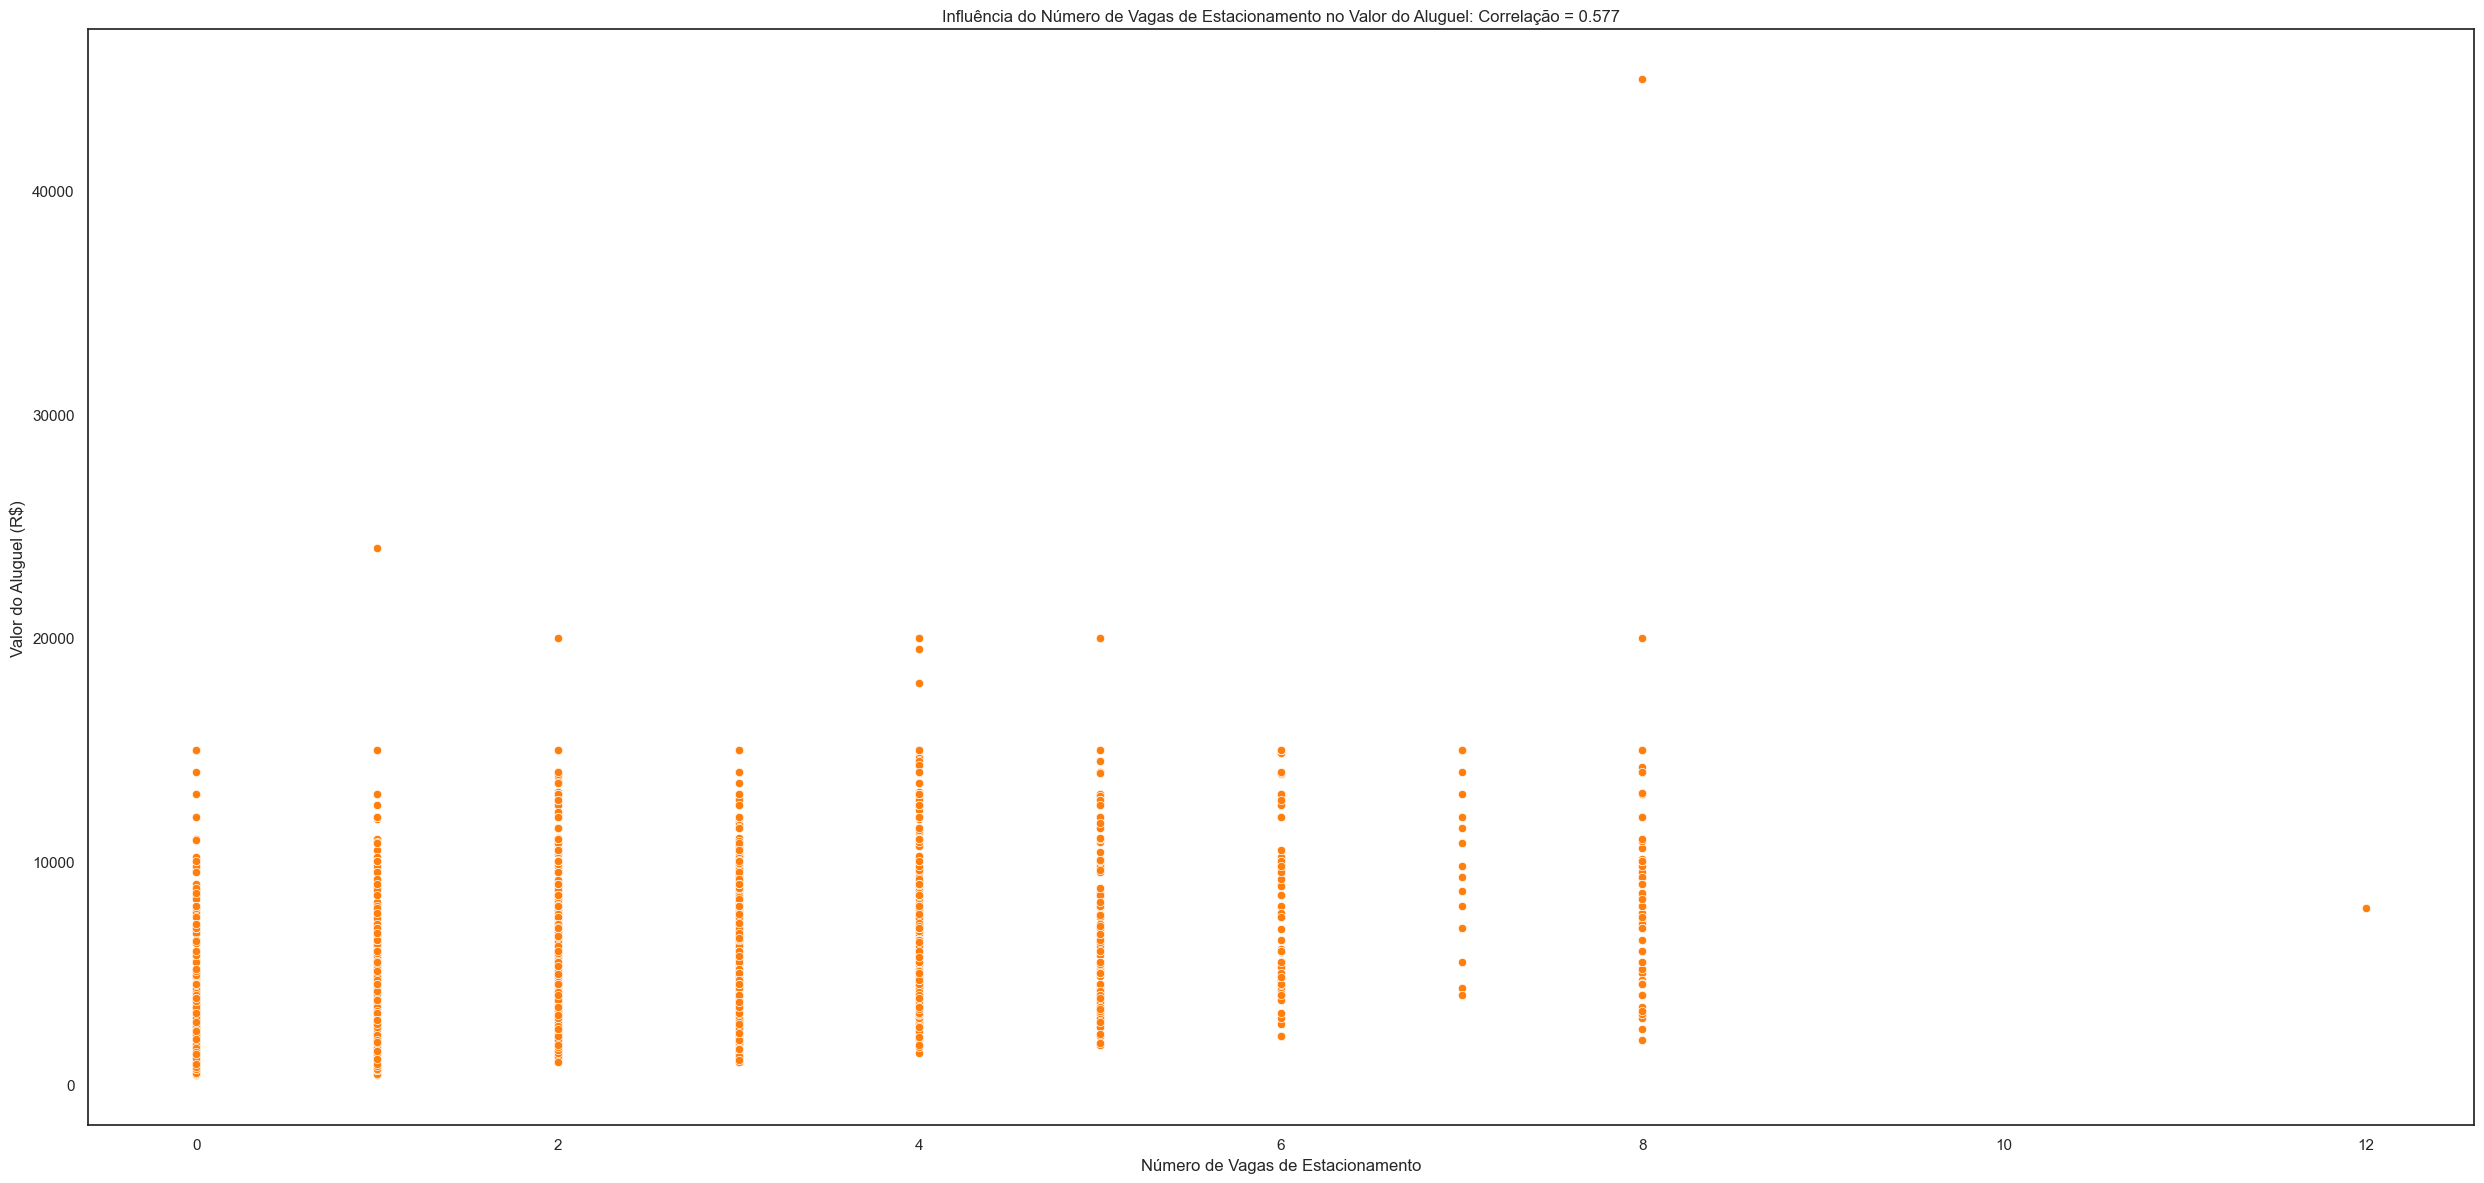

In [114]:
correlation_parking_rent = data['parking spaces'].corr(data['rent amount'])

# Criando um gráfico de dispersão para visualizar a relação entre o número de vagas de estacionamento e o valor do aluguel
sns.scatterplot(x = 'parking spaces', y = 'rent amount', data = data, color = cor2)

# Título e labels
plt.title(f'Influência do Número de Vagas de Estacionamento no Valor do Aluguel: Correlação = {round(correlation_parking_rent, 3)}')
plt.xlabel('Número de Vagas de Estacionamento')
plt.ylabel('Valor do Aluguel (R$)')

plt.tight_layout();
plt.savefig(homepath + 'reports/figures/pergunta5.png')

O coeficiente de correlação entre o número de vagas de estacionamento e o valor do aluguel é de aproximadamente 0.577. Este valor indica uma correlação positiva moderada, sugerindo que imóveis com mais vagas de estacionamento tendem a ter aluguéis mais altos, vale ressaltar que outros fatores também influenciam no valor do aluguel.

### 6. Relação entre andar (floor) e valor do aluguel: Existe alguma tendência no valor do aluguel com base no andar do imóvel?

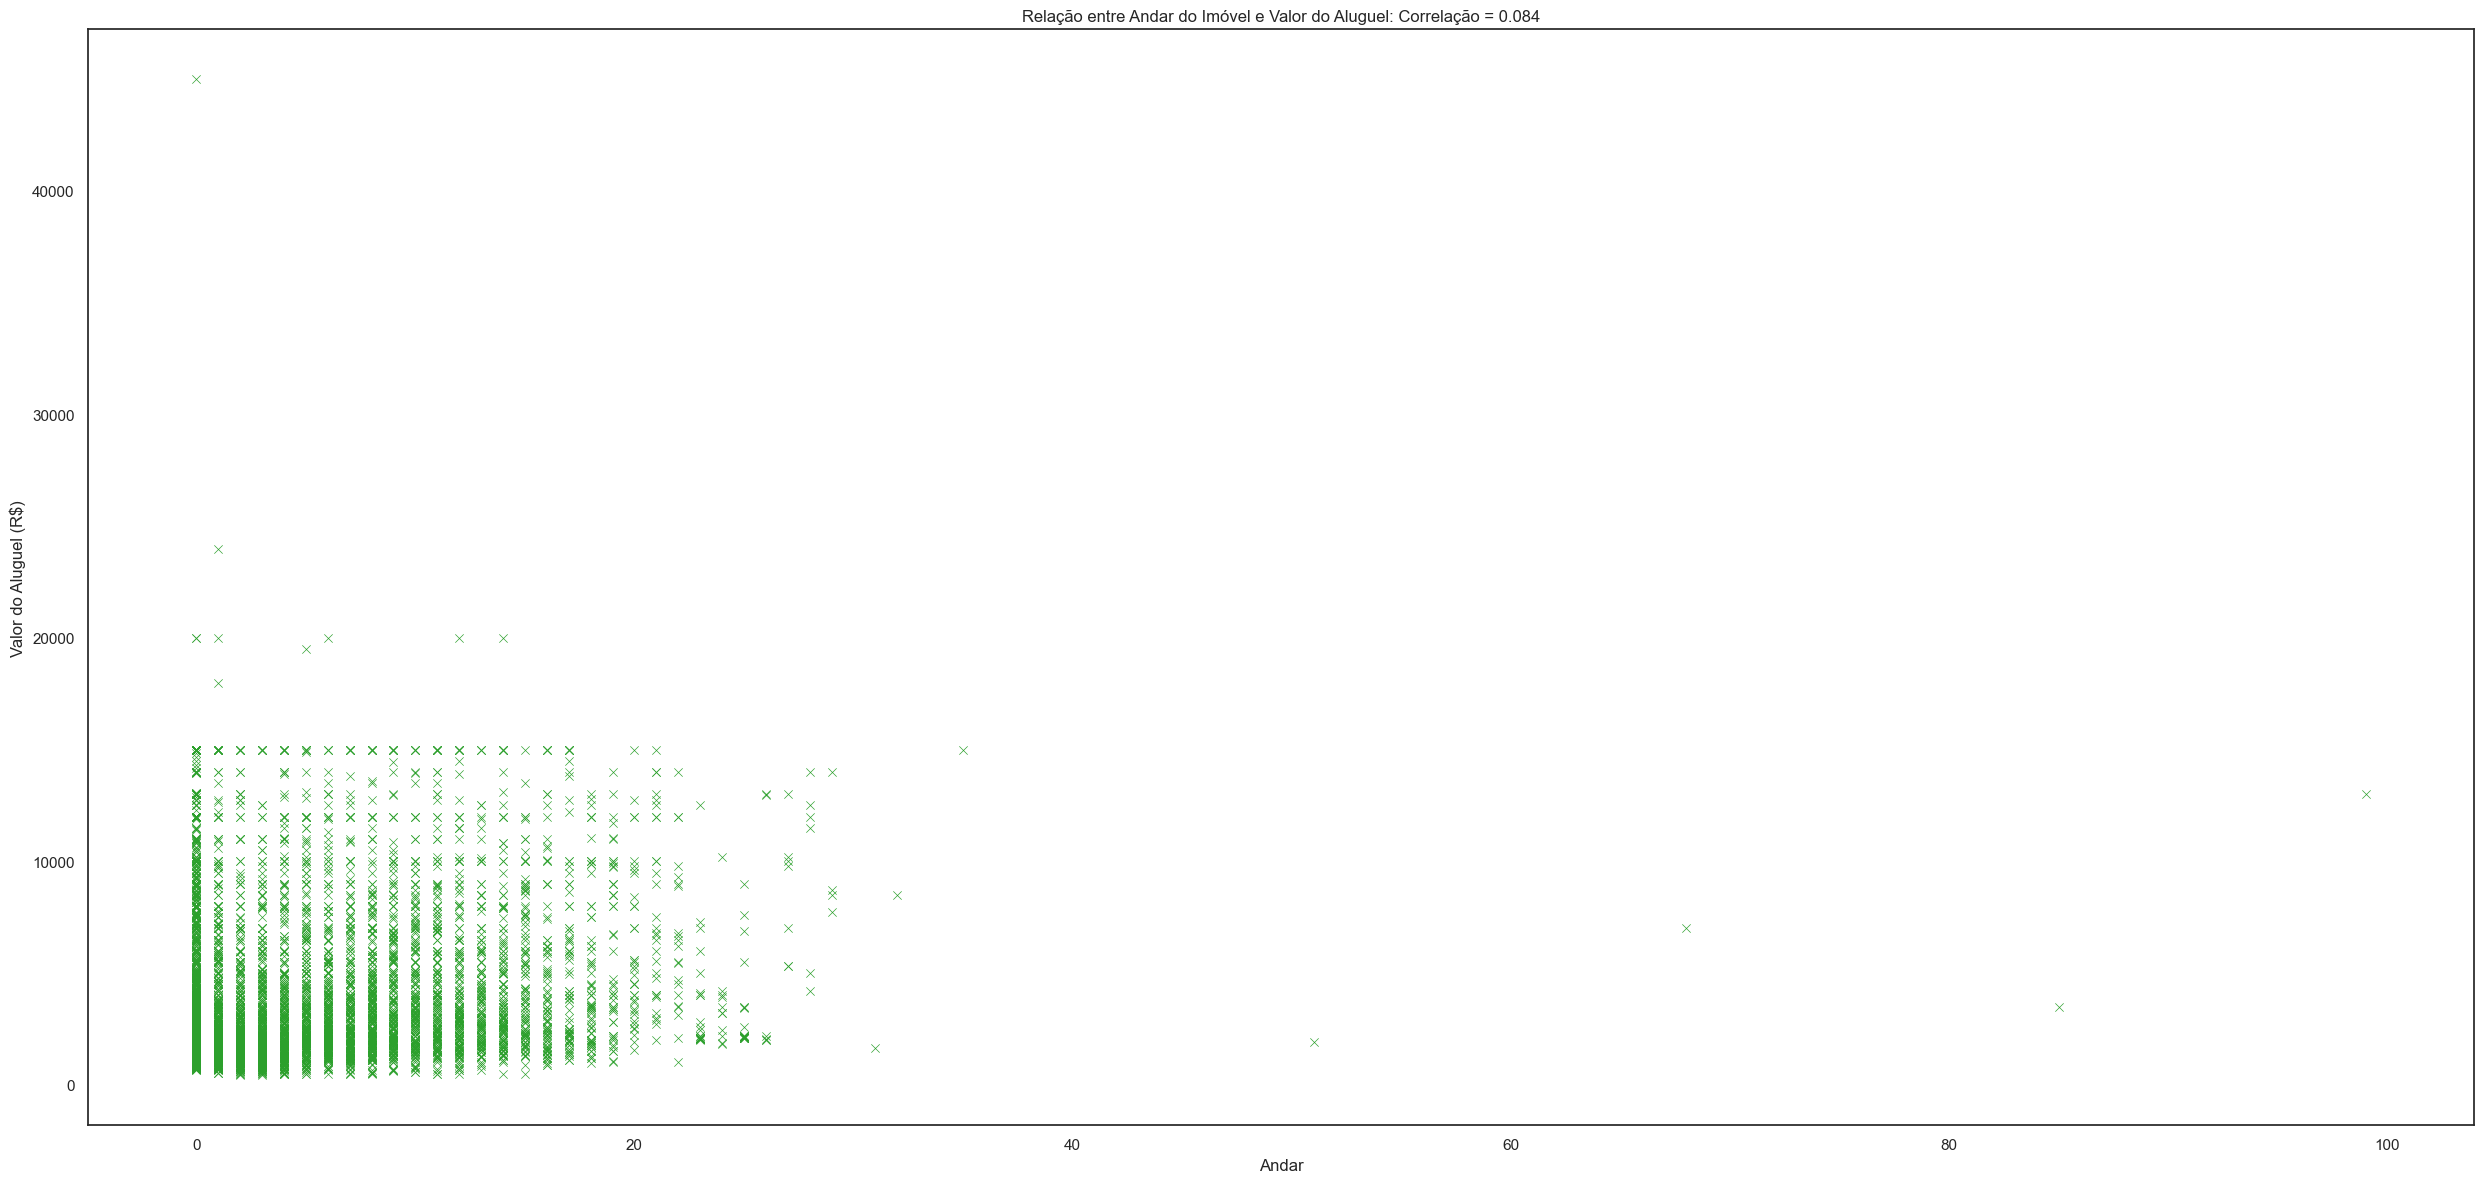

In [115]:
correlation_floor_rent = data['floor'].corr(data['rent amount'])
sns.scatterplot(x = 'floor', y = 'rent amount', data = data, color = cor3, marker = 'x')

# Título e labels
plt.title(f'Relação entre Andar do Imóvel e Valor do Aluguel: Correlação = {round(correlation_floor_rent, 3)}')
plt.xlabel('Andar')
plt.ylabel('Valor do Aluguel (R$)')

plt.tight_layout();
plt.savefig(homepath + 'reports/figures/pergunta6.png')

O coeficiente de correlação entre o andar do imóvel e o valor do aluguel é de aproximadamente 0.084, uma correlação positiva muito fraca, sugerindo que o andar do imóvel, por si só, não é determinante para o valor do aluguel.

### 7. Variação das taxas de condomínio (HOA) por cidade: Como as taxas de condomínio variam entre diferentes cidades?

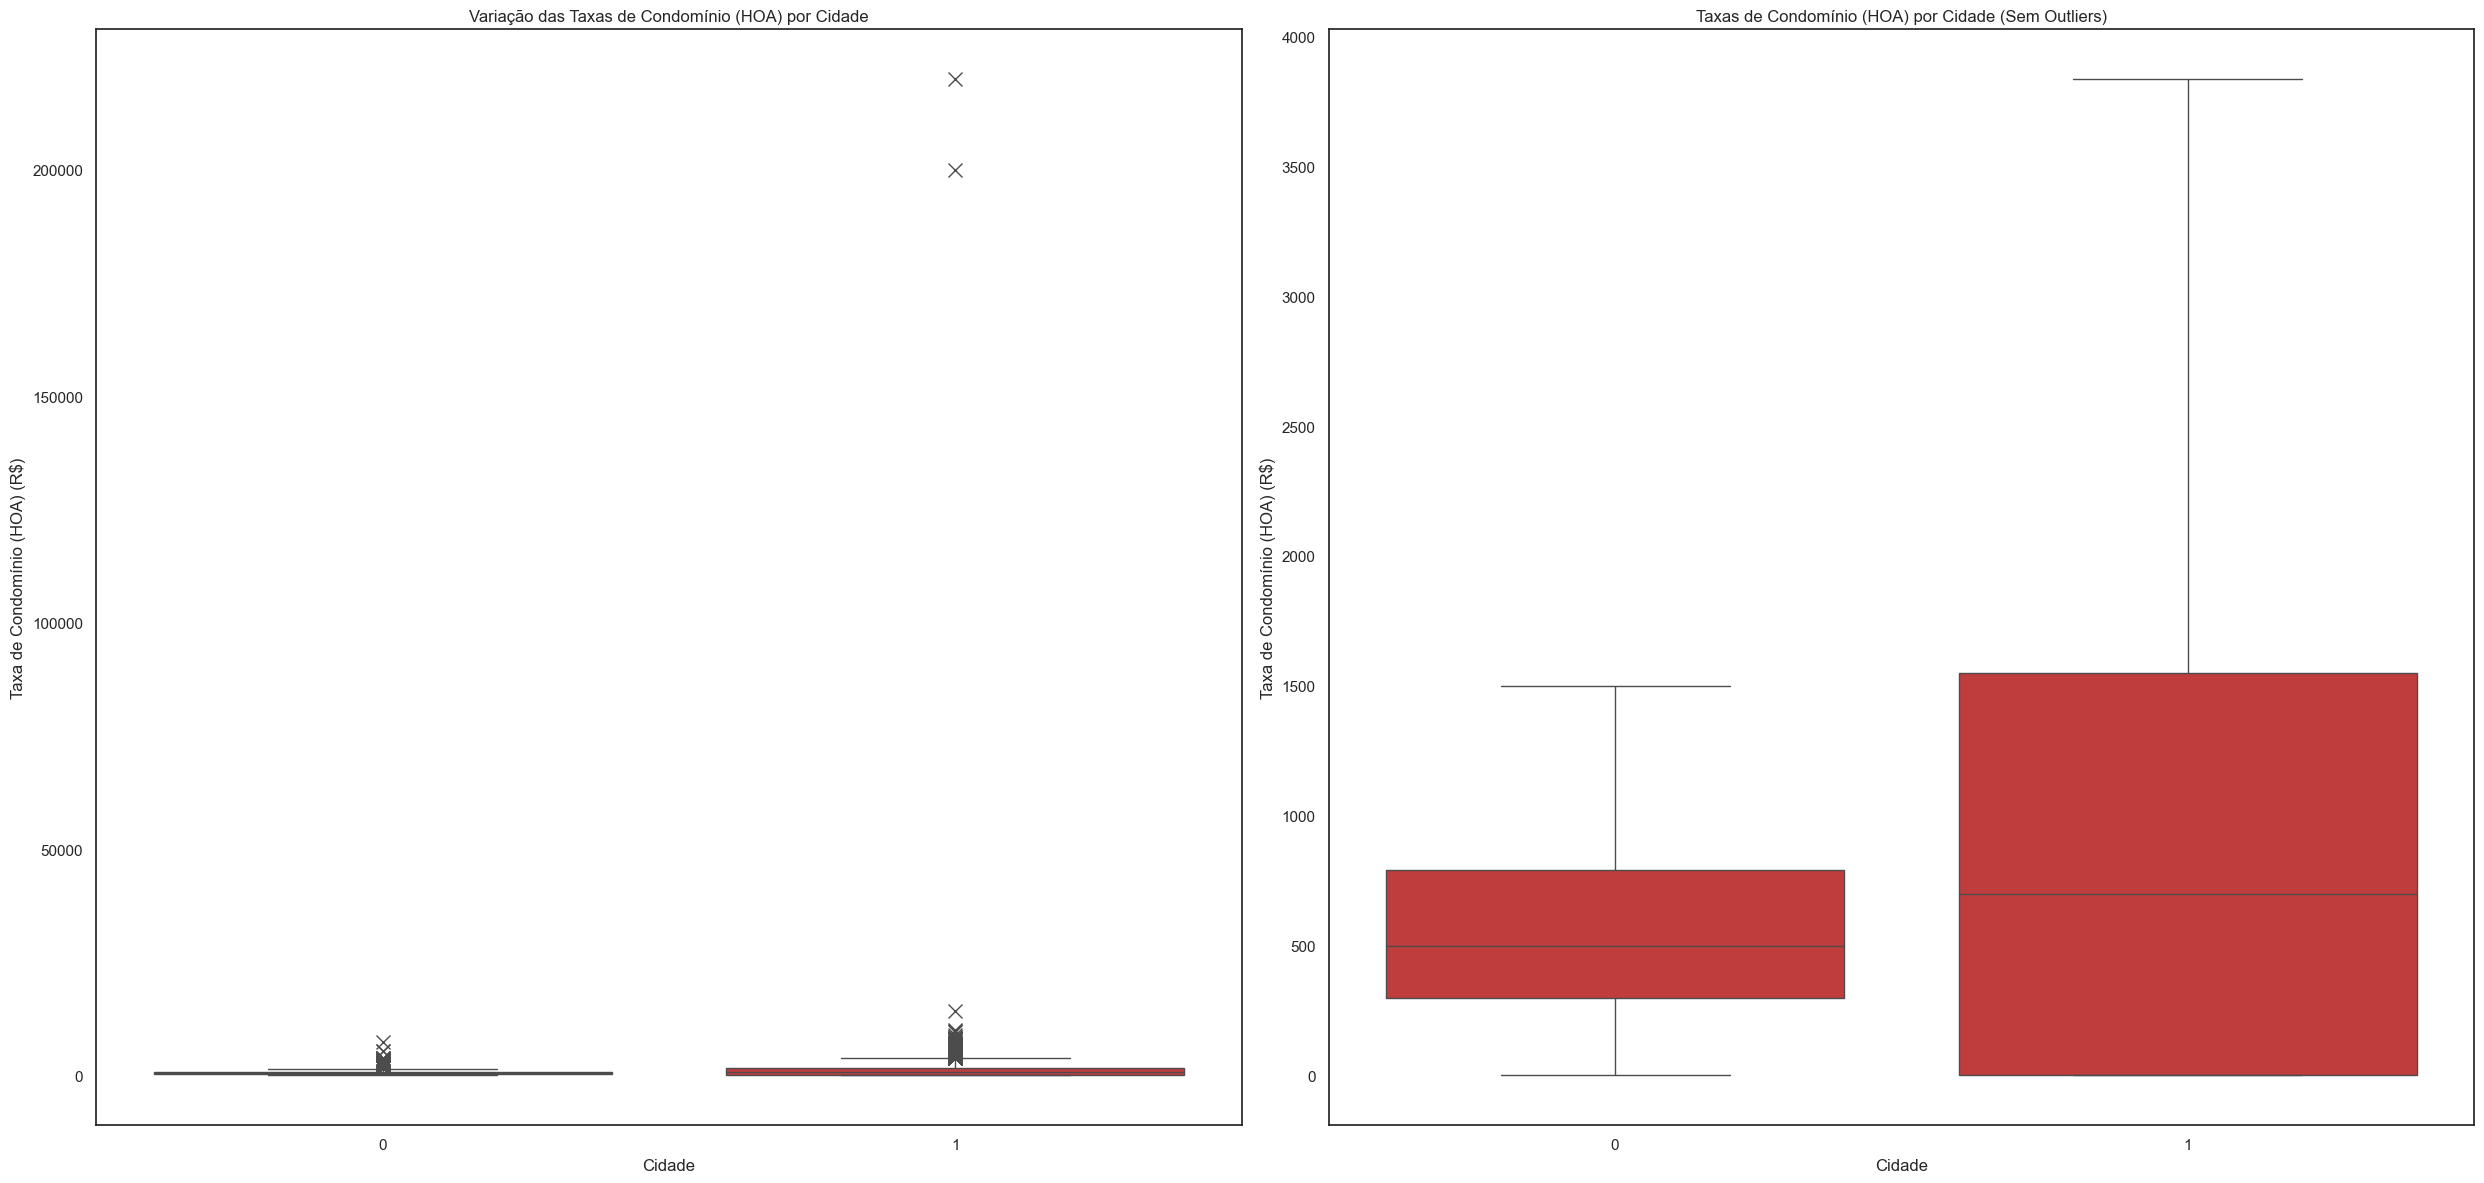

In [116]:
flierprops = dict(marker='x', markersize = 10)

plt.figure()

plt.subplot(1, 2, 1)
sns.boxplot(x = 'city', y = 'hoa', data = data, flierprops = flierprops, color = cor4)

# Título e labels
plt.title('Variação das Taxas de Condomínio (HOA) por Cidade')
plt.xlabel('Cidade')
plt.ylabel('Taxa de Condomínio (HOA) (R$)')

plt.subplot(1, 2, 2)
sns.boxplot(x = 'city', y = 'hoa', data = data, showfliers = False, color = cor4)

# Título e labels
plt.title('Taxas de Condomínio (HOA) por Cidade (Sem Outliers)')
plt.xlabel('Cidade')
plt.ylabel('Taxa de Condomínio (HOA) (R$)')

plt.tight_layout();
plt.savefig(homepath + 'reports/figures/pergunta7.png')

As diferenças nas medianas, a amplitude dos quartis e a presença de outliers podem indicar variações significativas nas taxas de condomínio entre as cidades codificadas.


### 8. Correlação entre número de banheiros e valor do aluguel: Qual é a relação entre o número de banheiros (bathroom) e o valor do aluguel (rent amount)? 


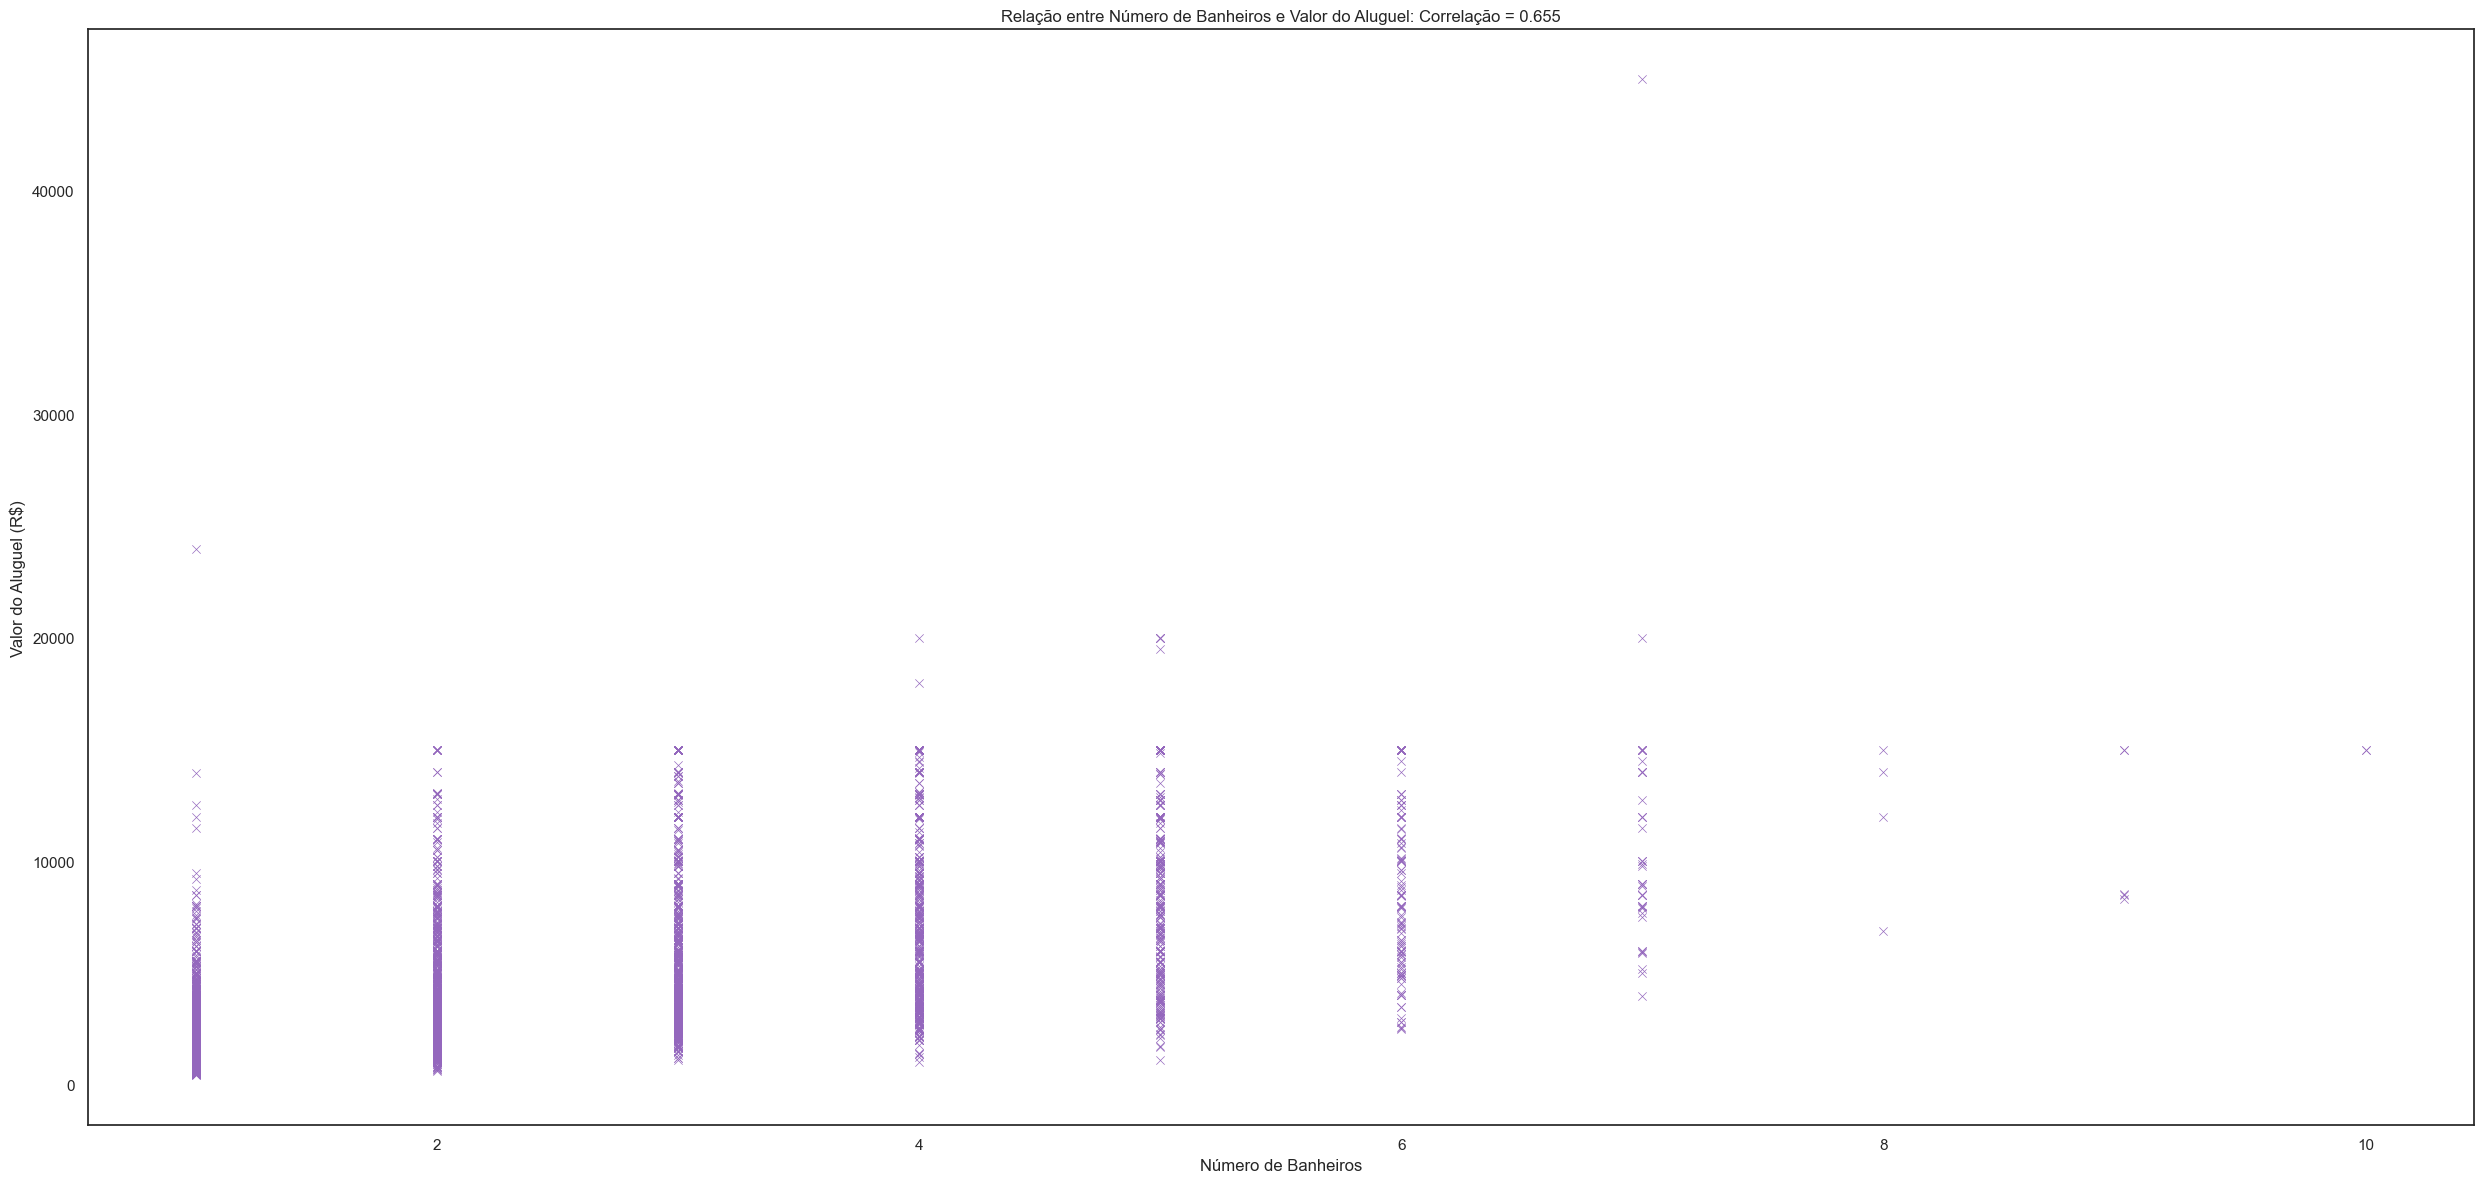

In [117]:
correlation_bathroom_rent = data['bathroom'].corr(data['rent amount'])

sns.scatterplot(x = 'bathroom', y = 'rent amount', data = data, marker = 'x', color = cor5)

# Título e labels
plt.title(f'Relação entre Número de Banheiros e Valor do Aluguel: Correlação = {round(correlation_bathroom_rent, 3)}')
plt.xlabel('Número de Banheiros')
plt.ylabel('Valor do Aluguel (R$)')

plt.tight_layout();
plt.savefig(homepath + 'reports/figures/pergunta8.png')

O coeficiente de correlação entre o número de banheiros e o valor do aluguel é de aproximadamente 0.655. Este valor indica uma correlação positiva moderada a forte, sugerindo que imóveis com mais banheiros tendem a ter aluguéis mais altos. Este padrão pode ser atribuído ao fato de que imóveis maiores, que geralmente têm mais banheiros, também tendem a ter um valor de aluguel mais elevado.


### 9. Variação do valor do aluguel por cidade: Como o valor do aluguel (rent amount) varia entre diferentes cidades? 

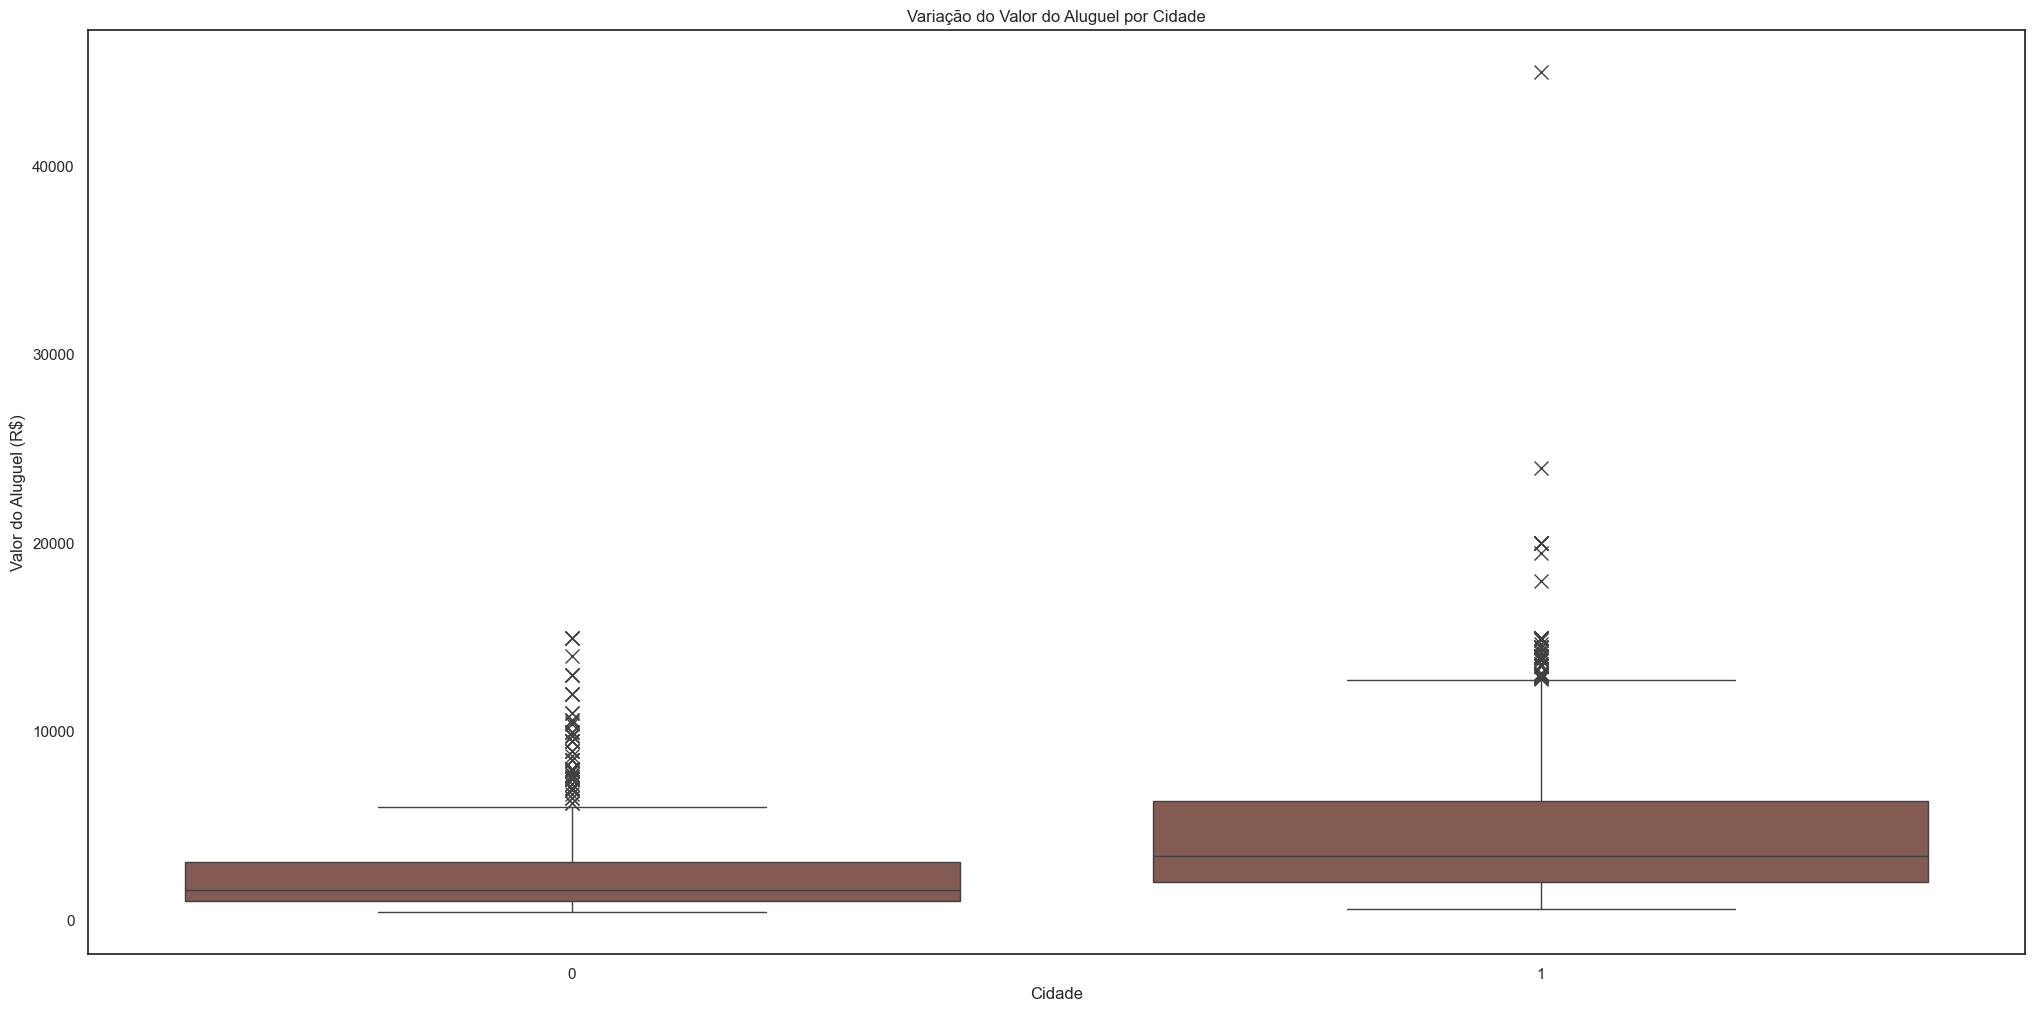

In [118]:
sns.boxplot(x = 'city', y = 'rent amount', data = data, flierprops = flierprops, color = cor6)

# Título e labels
plt.title('Variação do Valor do Aluguel por Cidade')
plt.xlabel('Cidade')
plt.ylabel('Valor do Aluguel (R$)')
plt.savefig(homepath + 'reports/figures/pergunta9.png')

As variações nas medianas, a amplitude dos interquartis e a presença de outliers podem indicar diferenças significativas nos custos de aluguel entre as cidades.


### 10. Distribuição do custo total (total): Como é a distribuição do custo total dos aluguéis? 

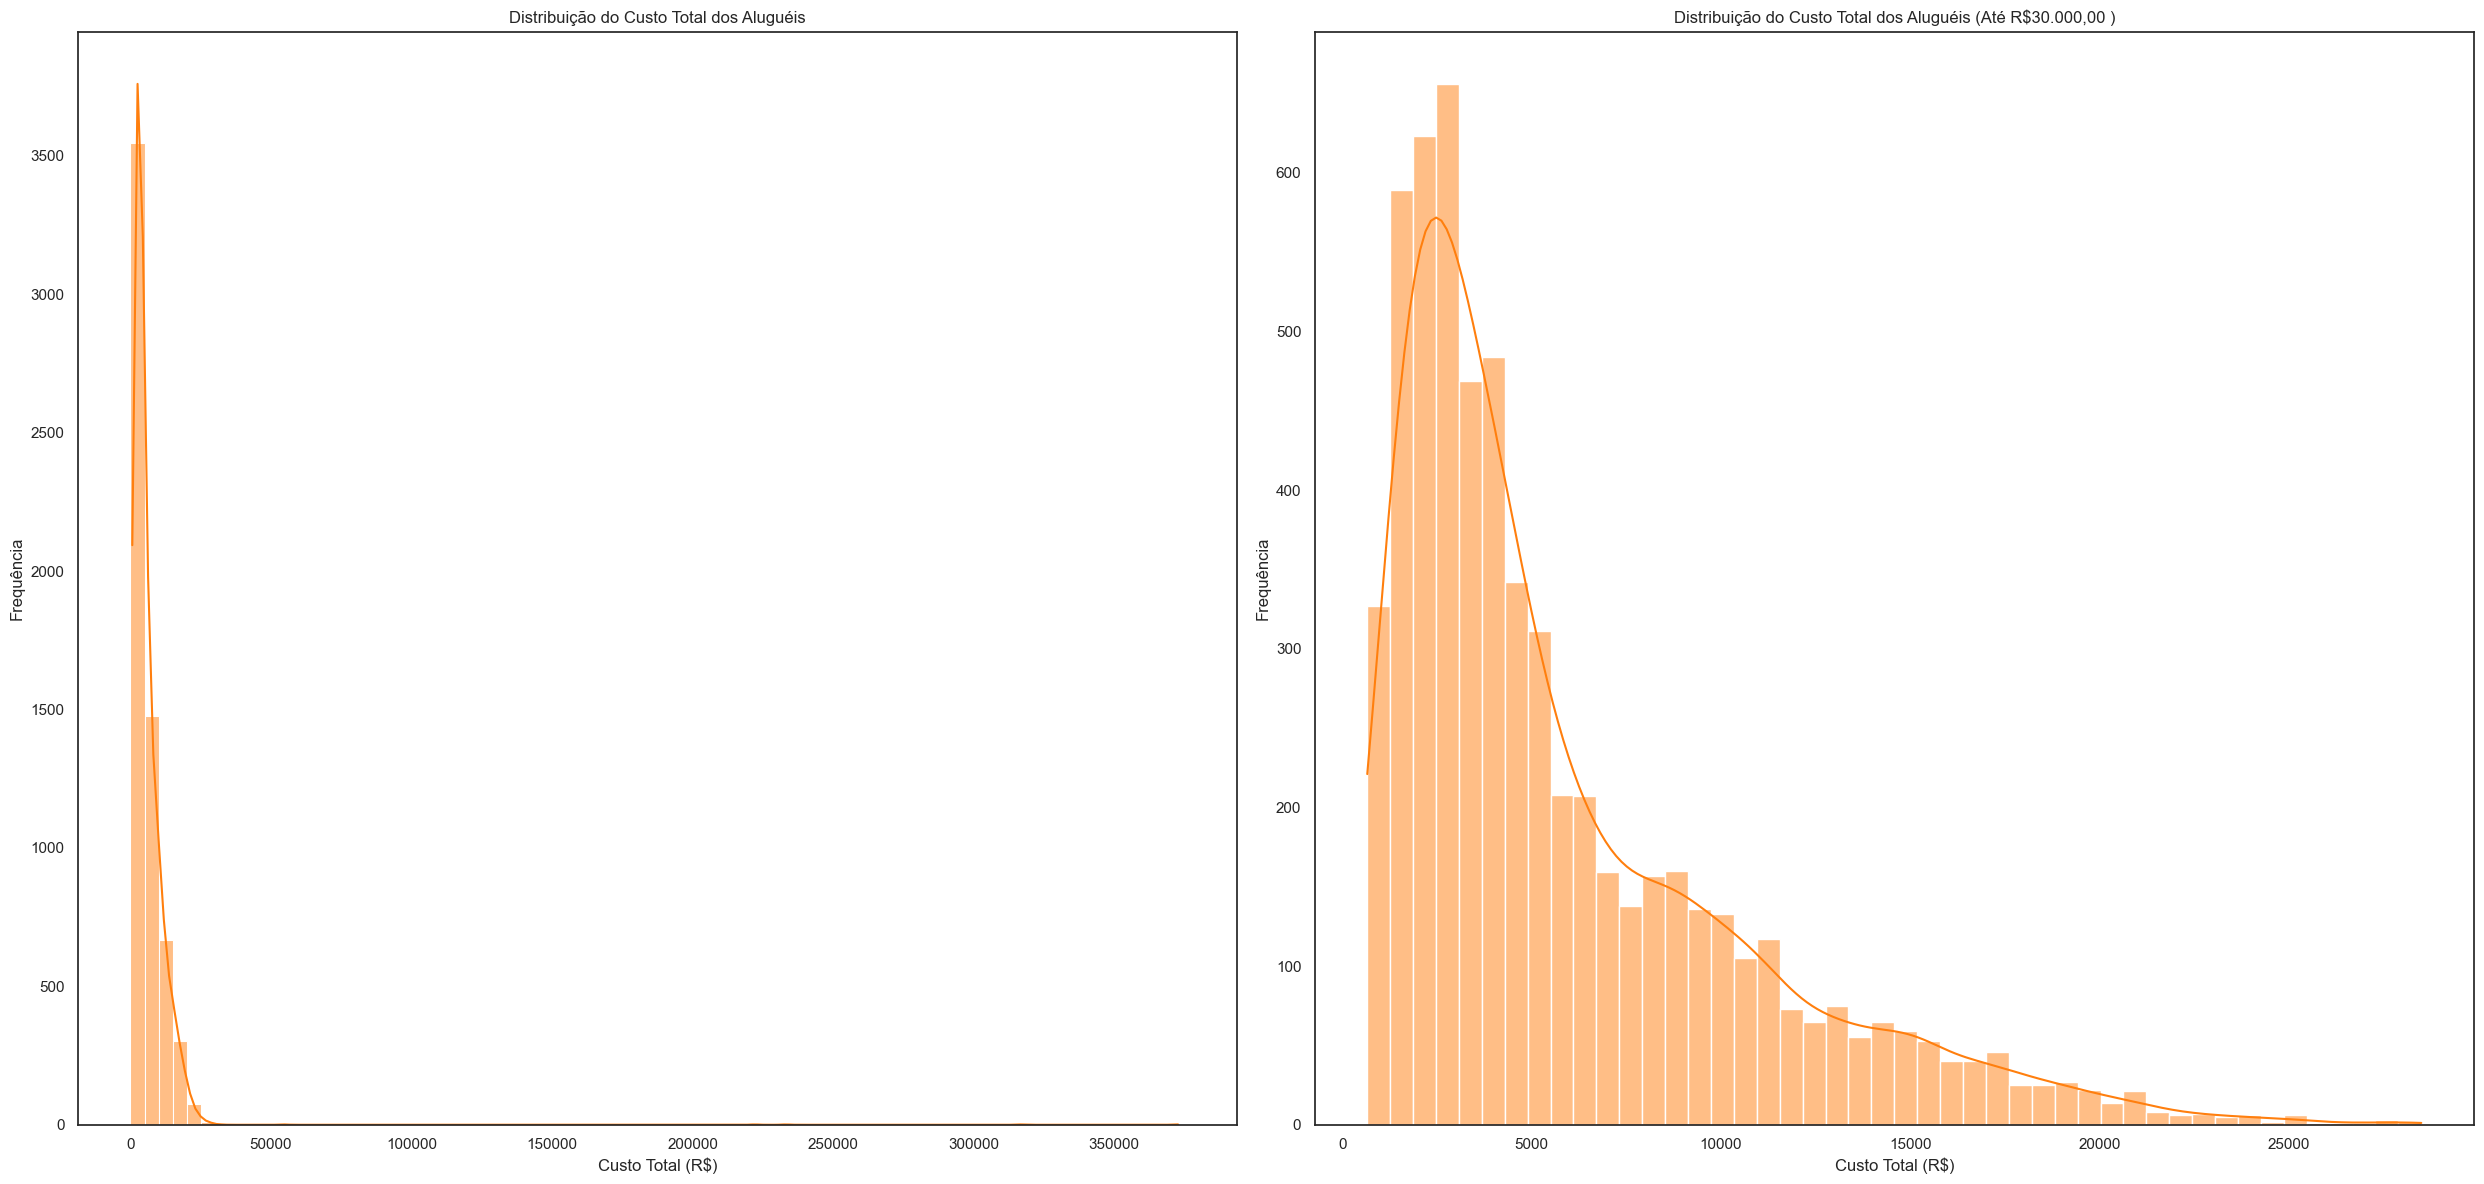

In [119]:
bin_size = 5000
bins_range = range(0, int(data['total'].max() + bin_size), bin_size)


plt.figure()

plt.subplot(1, 2, 1)
sns.histplot(data['total'], bins = bins_range, kde = True, color = cor2)

# Título e labels
plt.title('Distribuição do Custo Total dos Aluguéis')
plt.xlabel('Custo Total (R$)')
plt.ylabel('Frequência')

plt.subplot(1, 2, 2)
sns.histplot(data[data['total'] <= 30000]['total'], kde = True, color = cor2)
plt.title('Distribuição do Custo Total dos Aluguéis (Até R$30.000,00 )')
plt.xlabel('Custo Total (R$)')
plt.ylabel('Frequência')

plt.tight_layout();
plt.savefig(homepath + 'reports/figures/pergunta10.png')

Concentração em Valores Mais Baixos:
- A maioria dos aluguéis está concentrada nas faixas de preço mais baixas, conforme indicado pelas barras mais altas do lado esquerdo dos gráficos.

Decréscimo na Frequência com o Aumento do Custo:
- A frequência de aluguéis diminui à medida que o custo total aumenta, o que é característico de uma distribuição assimétrica à direita.

Outliers:
- Há uma presença visível de outliers em faixas de custo mais altas.


### 11. Proporção do seguro incêndio no custo total: Qual é a proporção do seguro incêndio (fire insurance) no custo total (total)? 


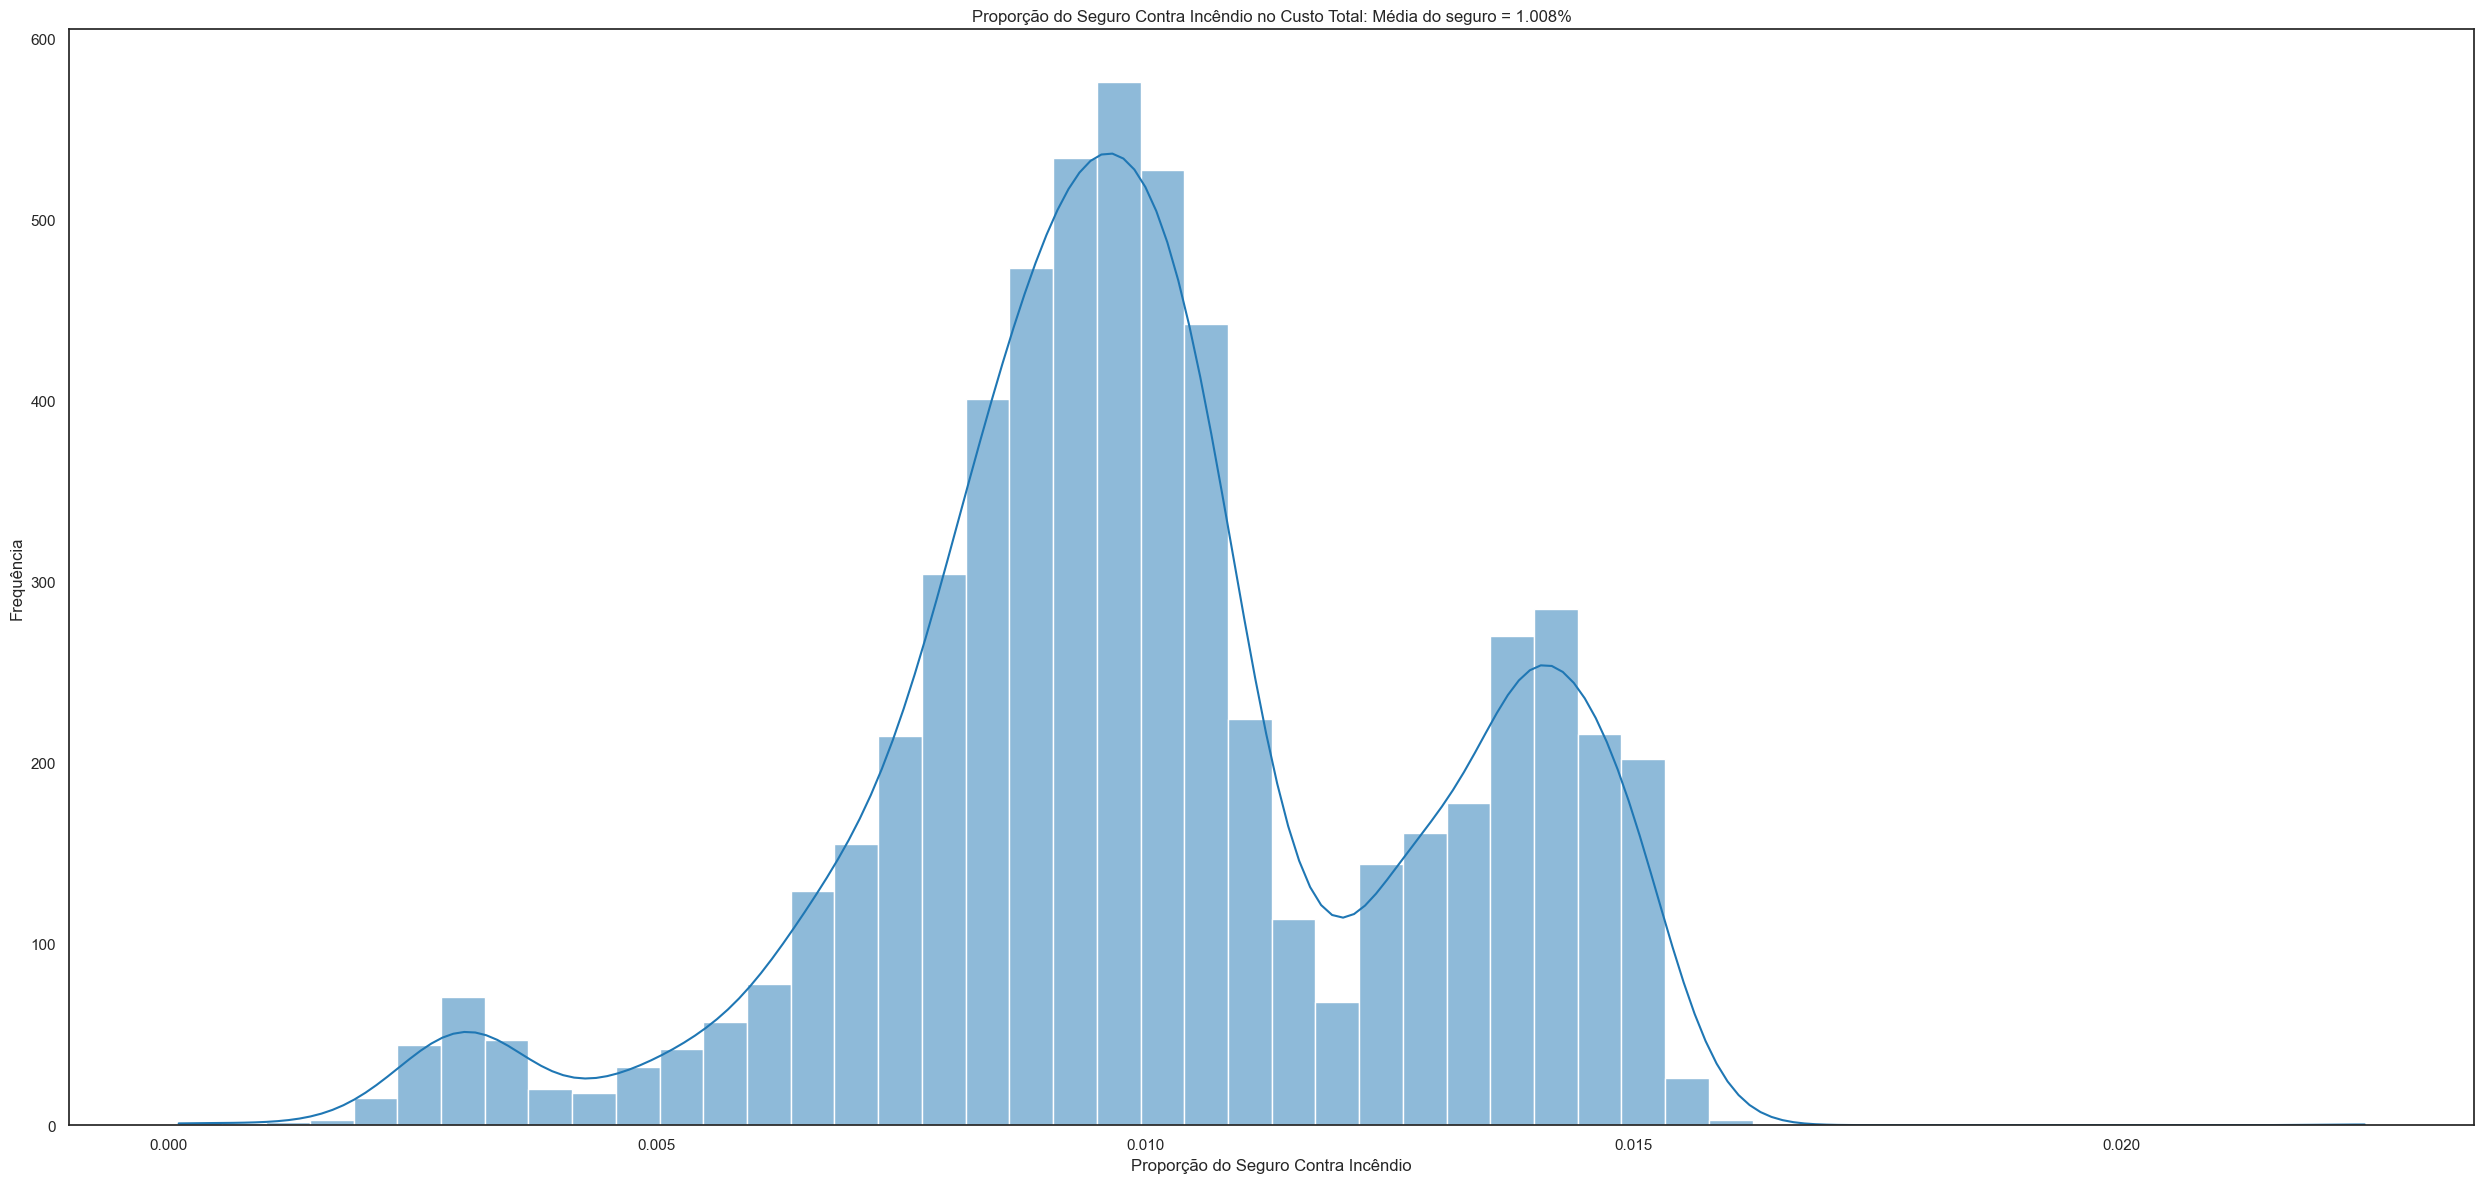

In [121]:
data['fire_insurance_proportion'] = data['fire insurance'] / data['total']
fire_insurance_proportion_mean = data['fire_insurance_proportion'].mean()

sns.histplot(data['fire_insurance_proportion'], bins = 50, kde = True, color = cor1)

# Título e labels
plt.title(f'Proporção do Seguro Contra Incêndio no Custo Total: Média do seguro = {round(fire_insurance_proportion_mean*100, 3)}%')
plt.xlabel('Proporção do Seguro Contra Incêndio')
plt.ylabel('Frequência')
plt.savefig(homepath + 'reports/figures/pergunta11.png')

plt.tight_layout();

A proporção média do seguro contra incêndio no custo total é de aproximadamente 1.008%.
Concentração da Proporção:
- A maioria dos valores se concentra em proporções baixas, indicando que o seguro contra incêndio geralmente representa uma pequena fração do custo total do aluguel.

Distribuição:
- A distribuição é relativamente estreita, sugerindo que a proporção do seguro contra incêndio em relação ao custo total é bastante consistente entre os diferentes aluguéis.


### 12. Variação do valor do aluguel com base no número de quartos: Como o número de quartos (rooms) afeta o valor do aluguel (rent amount)? 


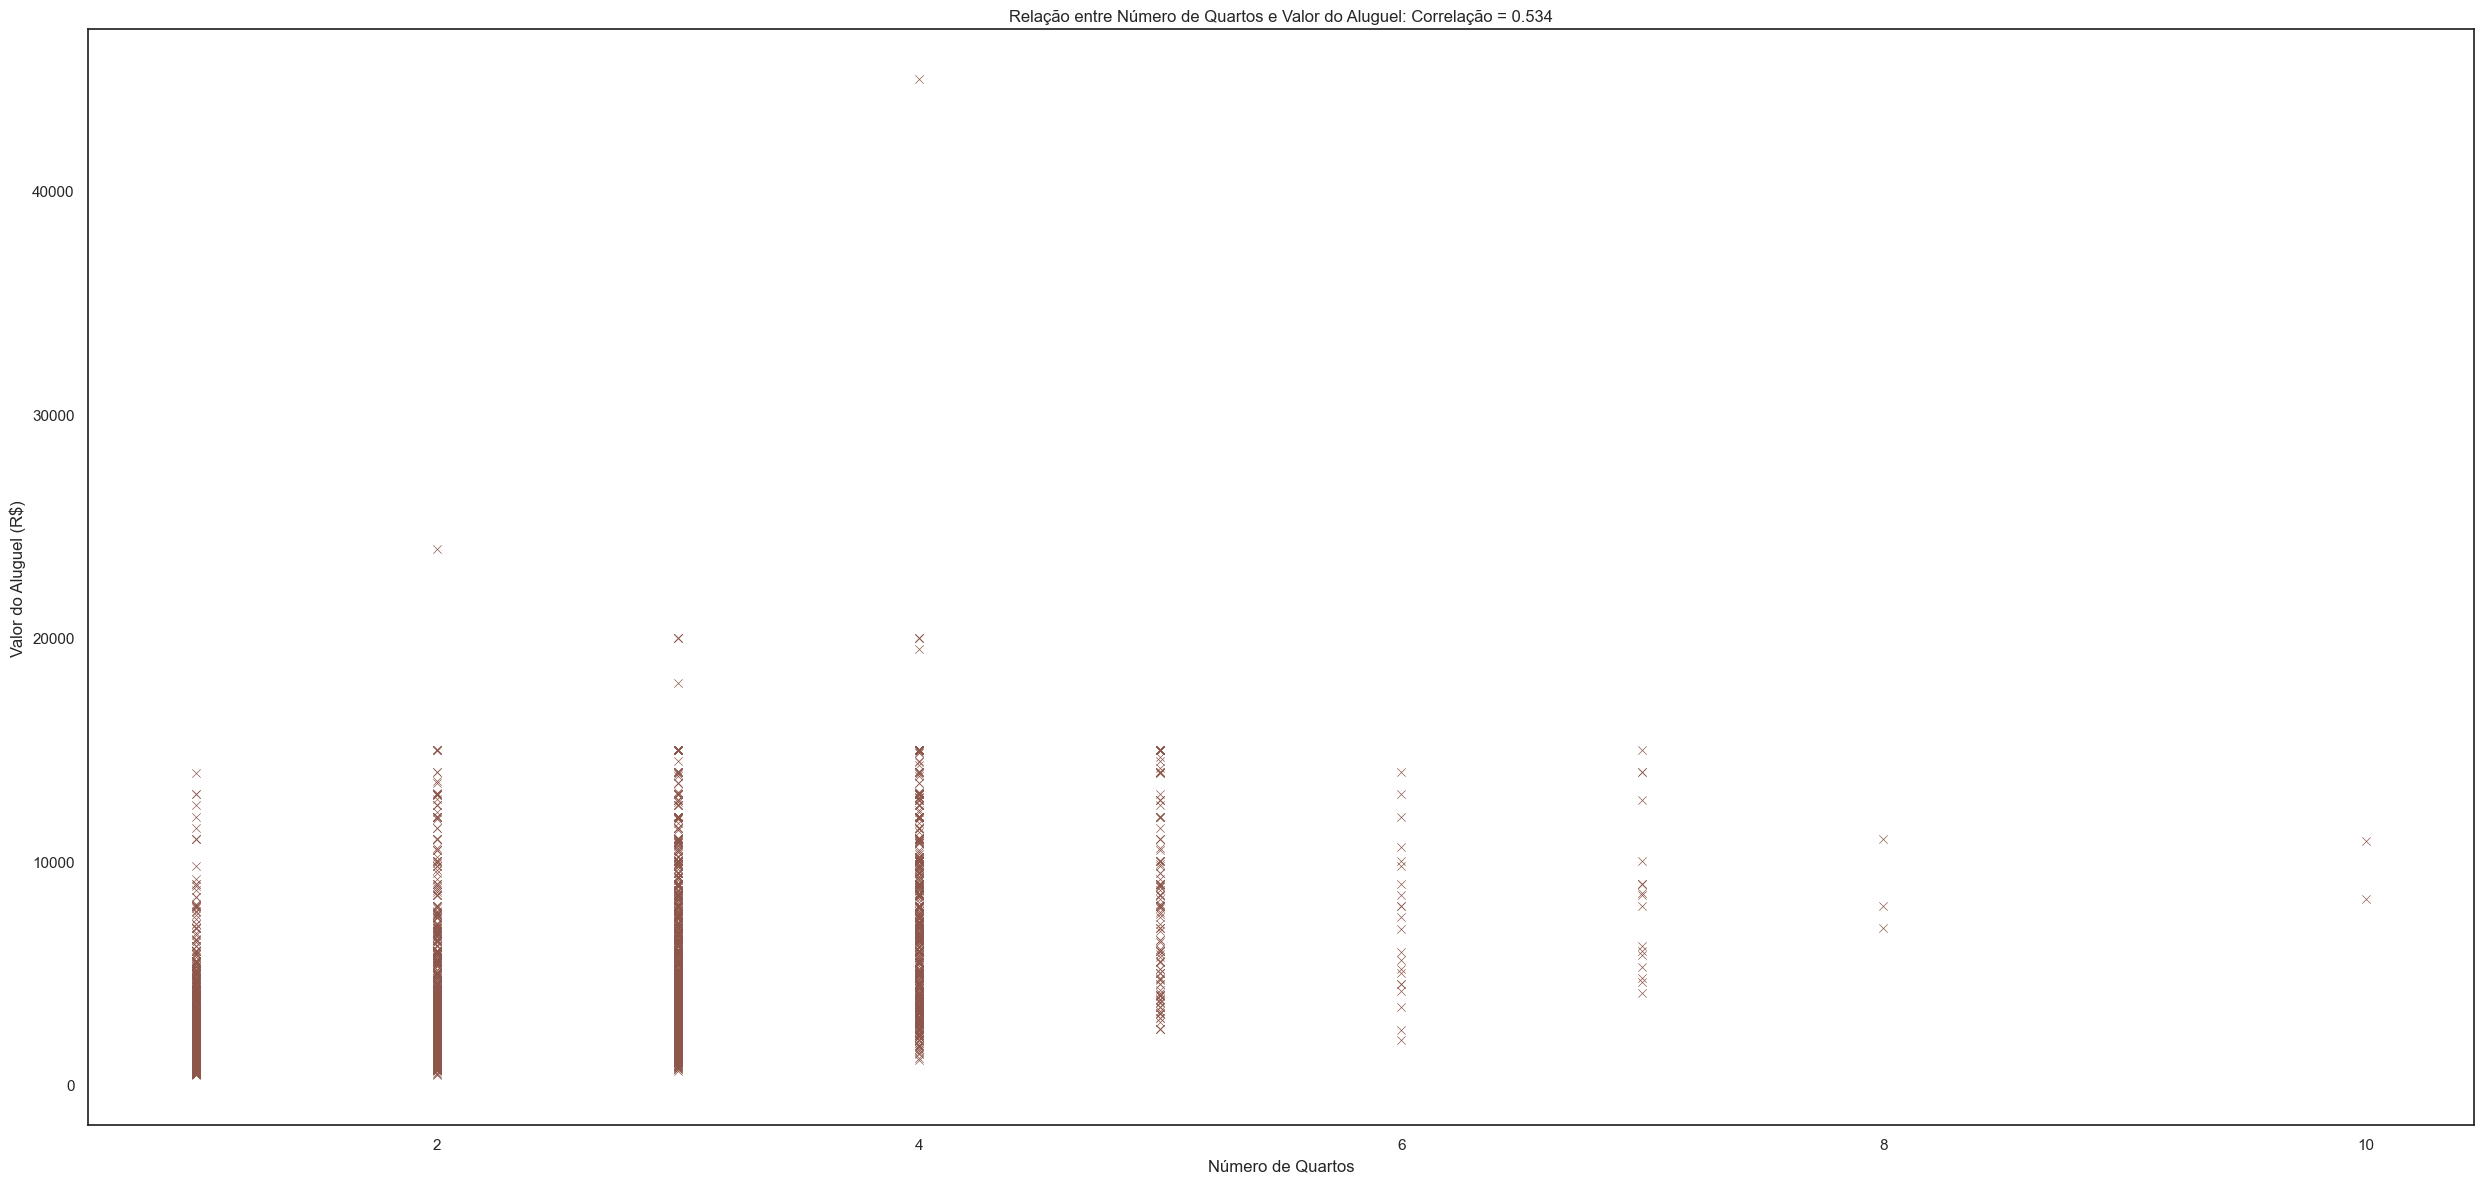

In [122]:
correlation_rooms_rent = data['rooms'].corr(data['rent amount'])

sns.scatterplot(x = 'rooms', y = 'rent amount', data = data, marker = 'x', color = cor6)

# Título e labels
plt.title(f'Relação entre Número de Quartos e Valor do Aluguel: Correlação = {round(correlation_rooms_rent, 3)}')
plt.xlabel('Número de Quartos')
plt.ylabel('Valor do Aluguel (R$)')

plt.tight_layout();
plt.savefig(homepath + 'reports/figures/pergunta12.png')

O coeficiente de correlação entre o número de quartos e o valor do aluguel é de aproximadamente 0.534. Este valor indica uma correlação positiva moderada, sugerindo que imóveis com mais quartos tendem a ter aluguéis mais altos. Isso pode ser atribuído à relação geral entre o tamanho do imóvel e seu valor de aluguel: imóveis maiores, com mais quartos, geralmente custam mais para alugar.


### 13. Influência da localização na taxa de HOA: A localização (cidade) tem impacto significativo na taxa de HOA?


A correlação entre cidade e HOA é de 0.043


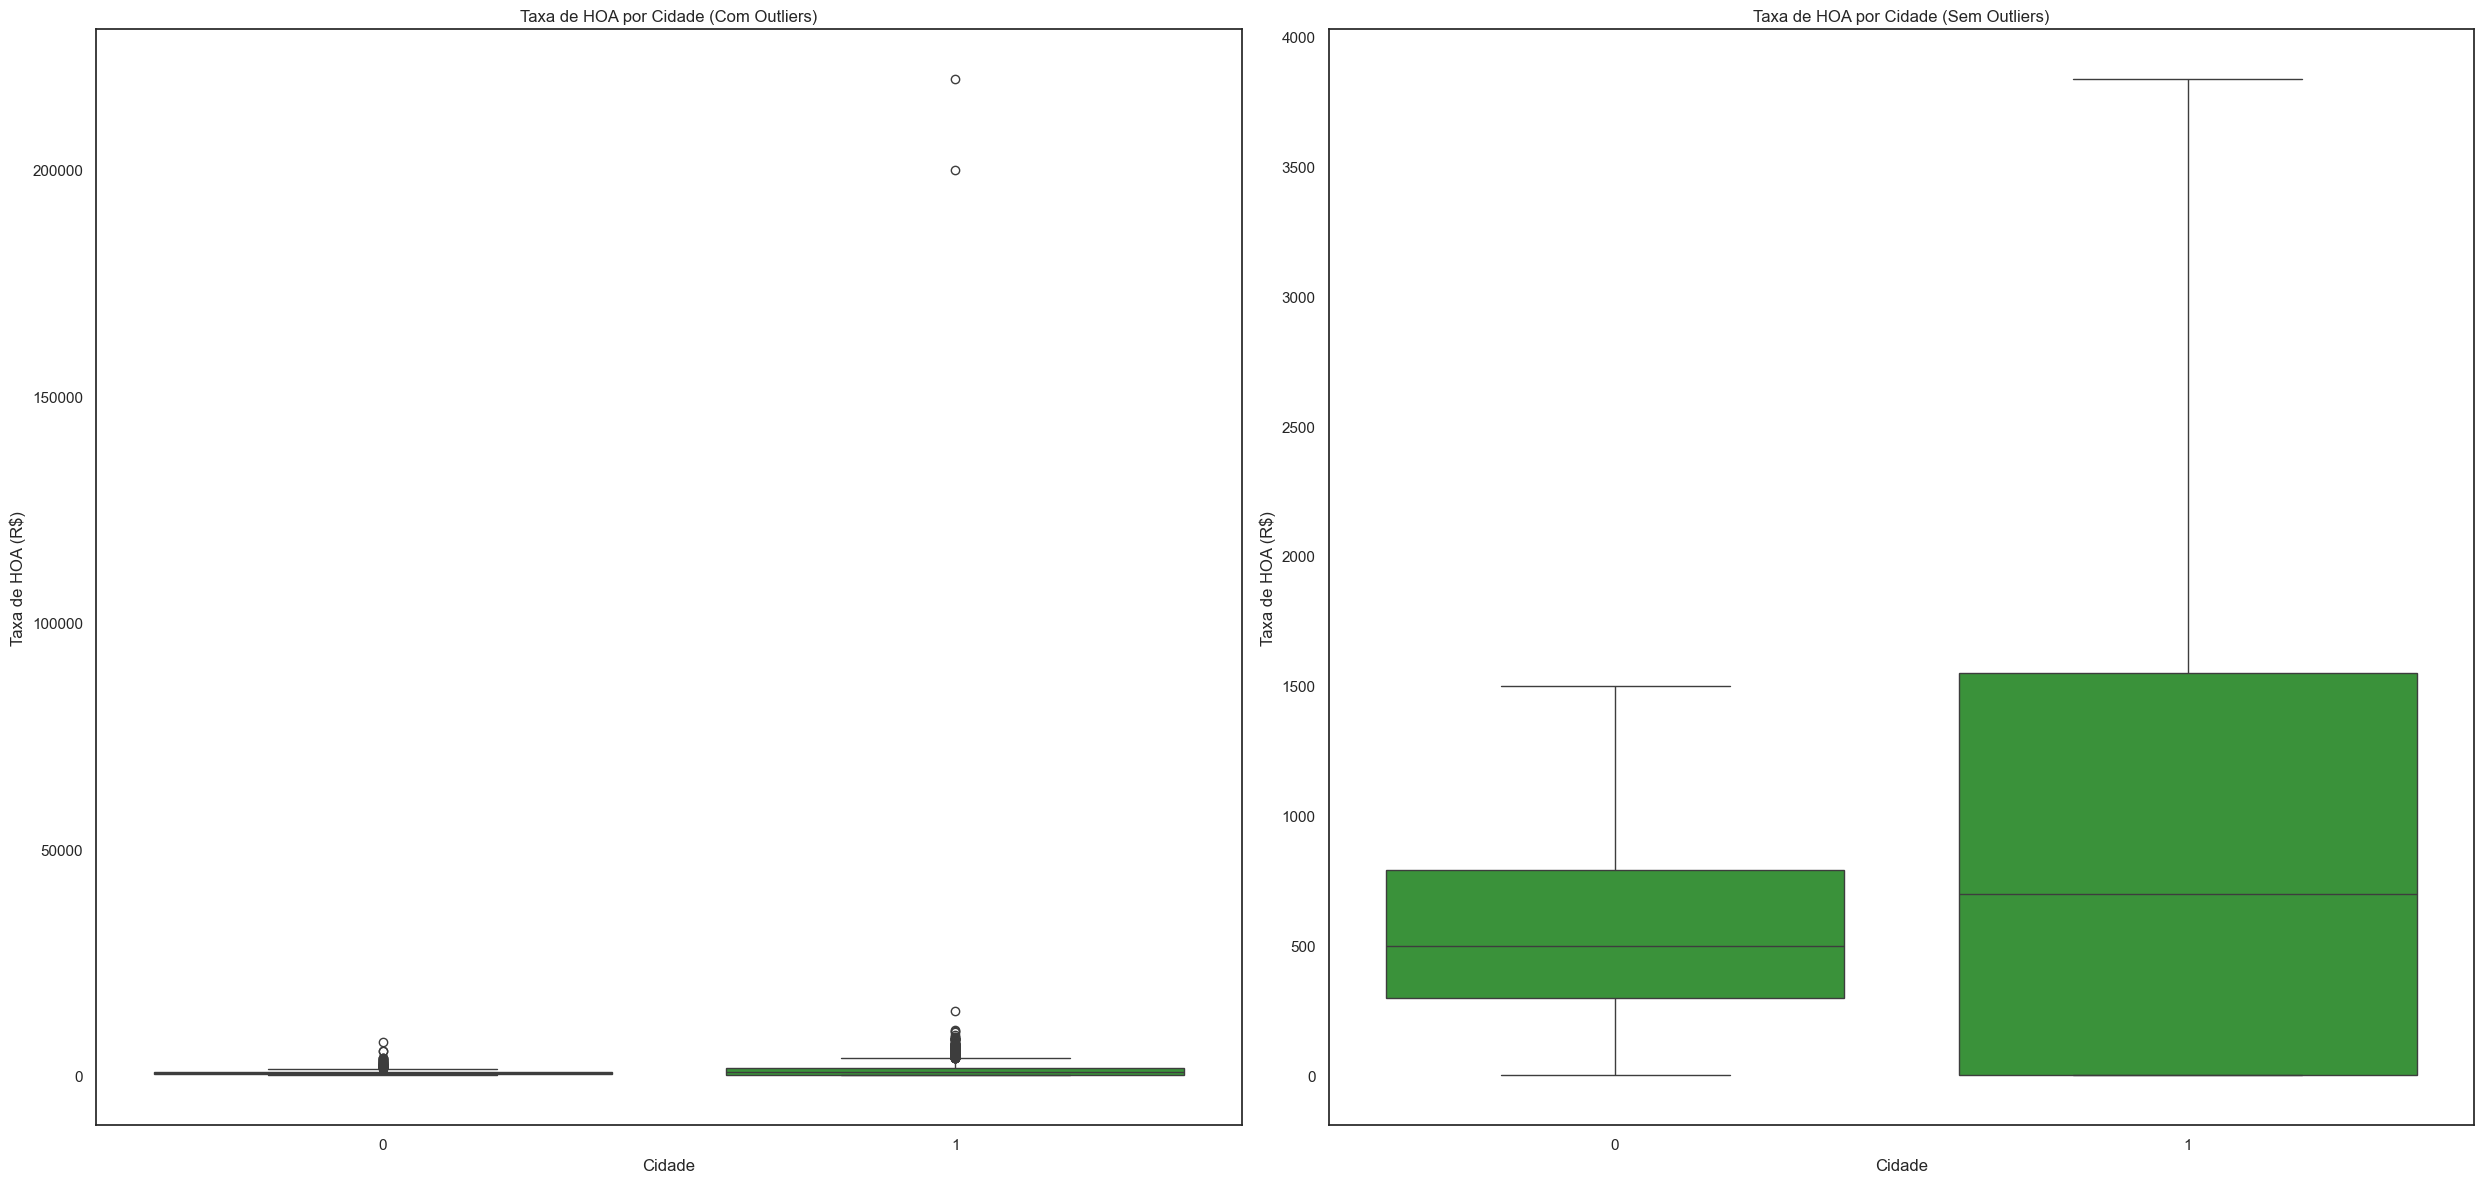

In [124]:
plt.figure()

# Gráfico de caixa com outliers
plt.subplot(1, 2, 1)
sns.boxplot(x = 'city', y = 'hoa', data = data, color = cor3)
plt.title('Taxa de HOA por Cidade (Com Outliers)')
plt.xlabel('Cidade')
plt.ylabel('Taxa de HOA (R$)')

# Gráfico de caixa sem outliers
plt.subplot(1, 2, 2)
sns.boxplot(x = 'city', y = 'hoa', data = data, showfliers = False, color = cor3)
plt.title('Taxa de HOA por Cidade (Sem Outliers)')
plt.xlabel('Cidade')
plt.ylabel('Taxa de HOA (R$)')

plt.tight_layout();
plt.savefig(homepath + 'reports/figures/pergunta13.png')

correlation_city_hoa = data['city'].corr(data['hoa'])
print(f'A correlação entre cidade e HOA é de {round(correlation_city_hoa, 3)}')

A Taxa de variação da HOA não parece estar fortemente associada à cidade em que o imóvel está localizado por causa da correlação fraca. Outros fatores podem ter uma influência maior na determinação da taxa de HOA. 


### 14. Relação entre área e número de quartos/banheiros: Existe uma relação entre a área do imóvel (area) e o número de quartos (rooms) e banheiros (bathroom)? 


Correlação de área e número de quartos: 0.267
Correlação de área e número de quartos: 0.275


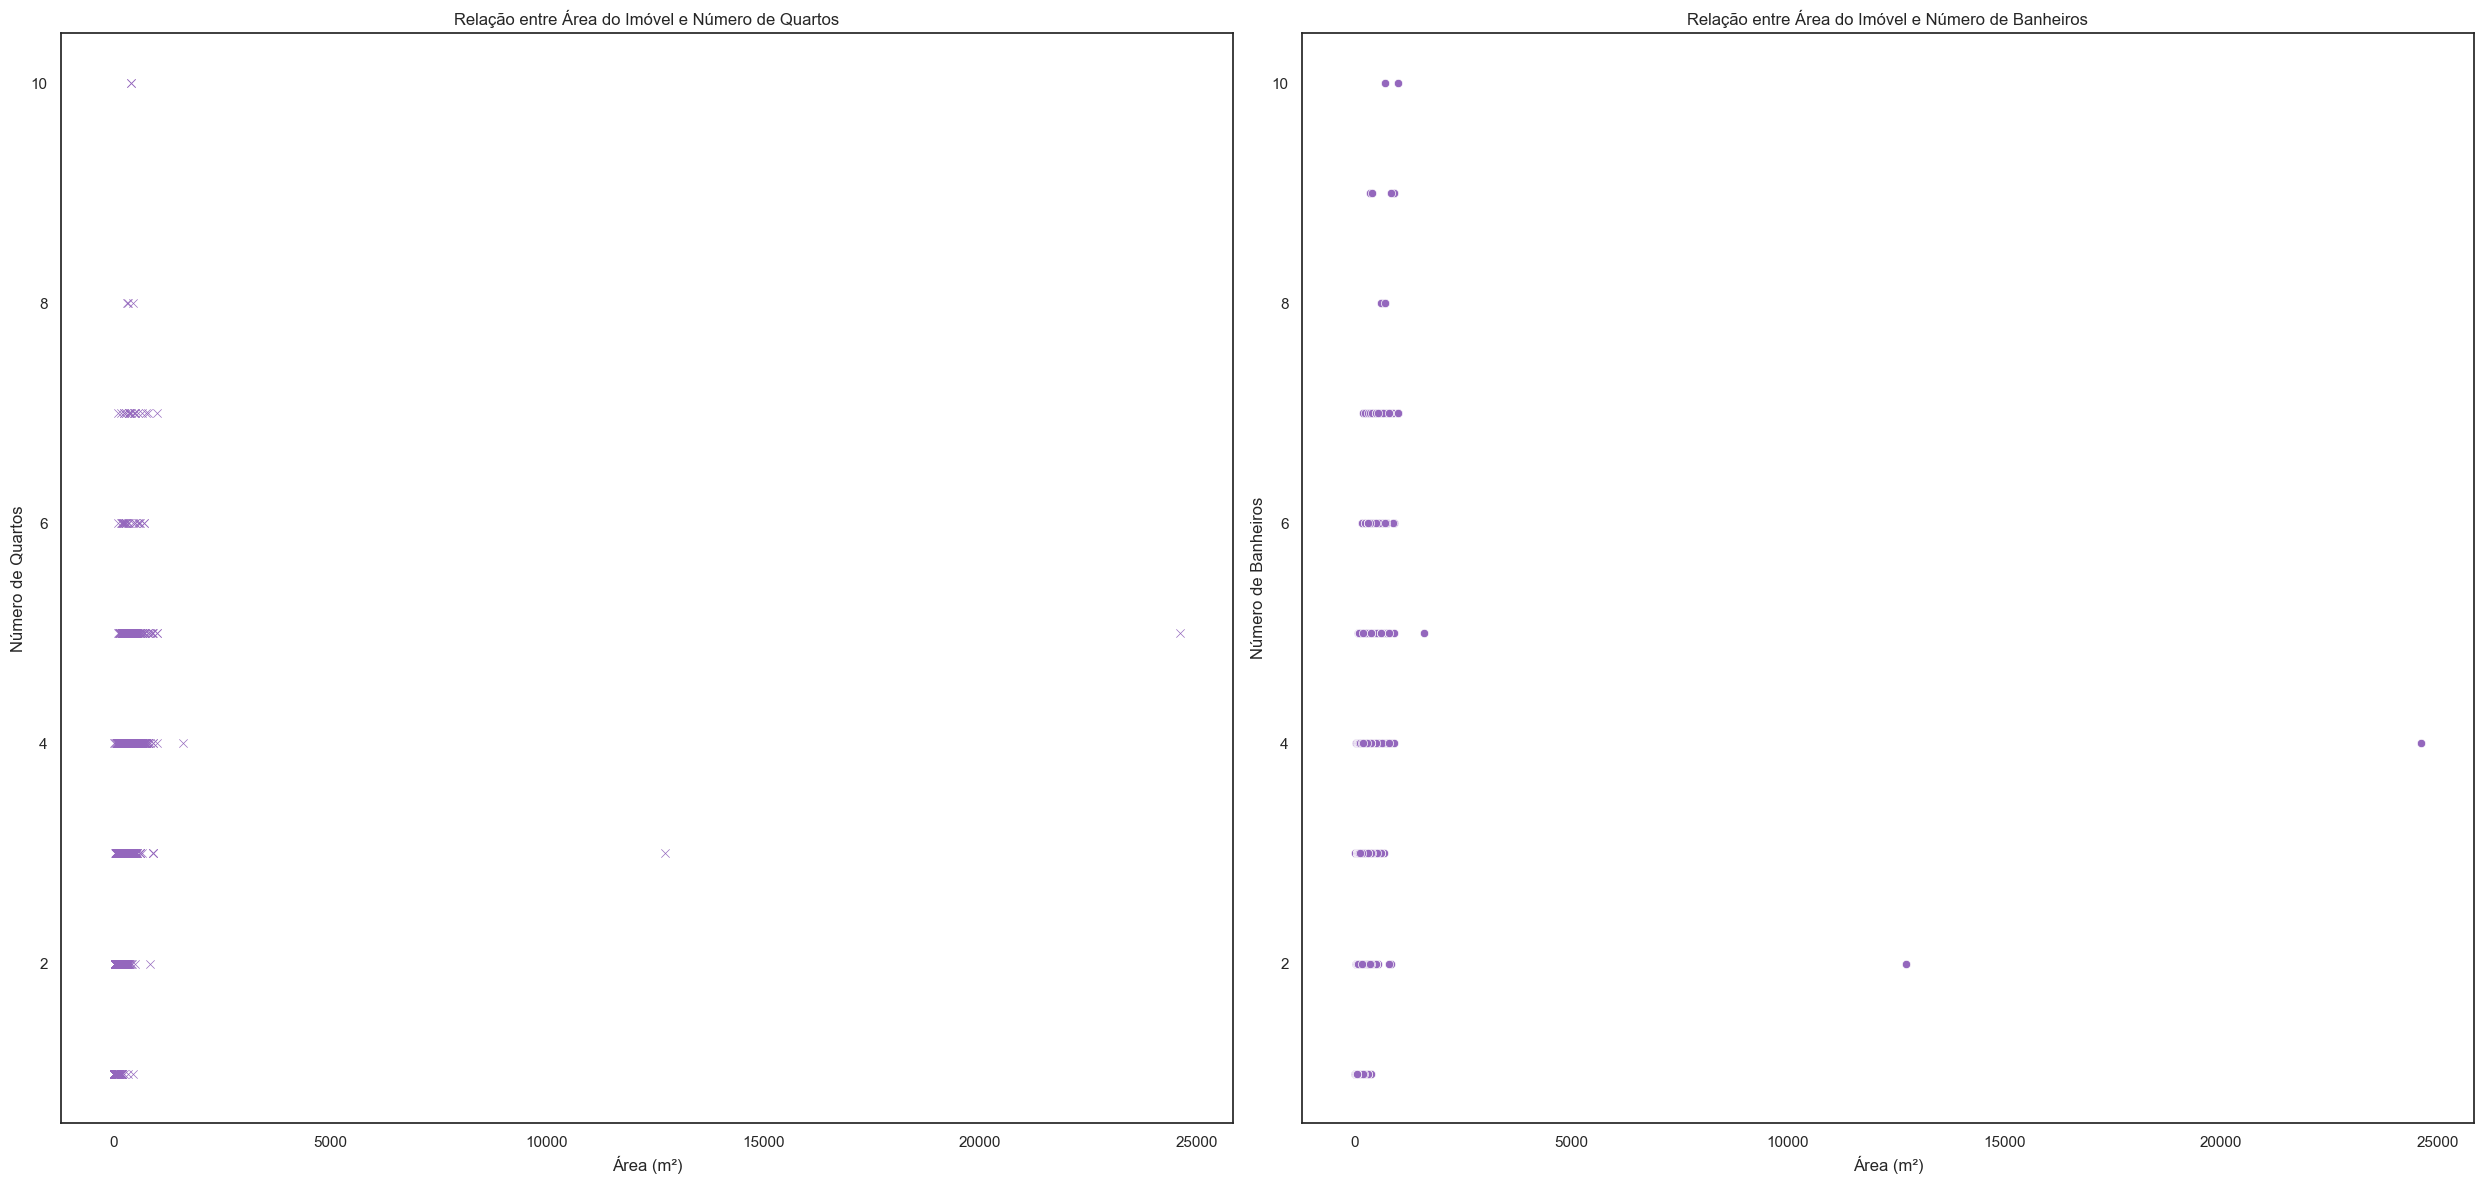

In [126]:
plt.figure()

# Relação entre área e número de quartos
plt.subplot(1, 2, 1)
sns.scatterplot(x = 'area', y = 'rooms', data = data, color = cor5, marker = 'x')
plt.title('Relação entre Área do Imóvel e Número de Quartos')
plt.xlabel('Área (m²)')
plt.ylabel('Número de Quartos')

# Relação entre área e número de banheiros
plt.subplot(1, 2, 2)
sns.scatterplot(x = 'area', y = 'bathroom', data = data, color = cor5, marker = 'o')
plt.title('Relação entre Área do Imóvel e Número de Banheiros')
plt.xlabel('Área (m²)')
plt.ylabel('Número de Banheiros')

plt.tight_layout();
plt.savefig(homepath + 'reports/figures/pergunta14.png')

# Calculando os coeficientes de correlação
correlation_area_rooms = data['area'].corr(data['rooms'])
correlation_area_bathrooms = data['area'].corr(data['bathroom'])

print(f'Correlação de área e número de quartos: {round(correlation_area_rooms, 3)}')
print(f'Correlação de área e número de quartos: {round(correlation_area_bathrooms, 3)}')

Essas relações sugerem que, embora exista alguma tendência de que imóveis maiores tenham mais quartos e banheiros, a correlação não é particularmente forte. Outros fatores podem influenciar o número de quartos e banheiros em um imóvel além de sua área.


### 15. Diferenças no valor do aluguel por tipo de mobília: Como a presença ou ausência de mobília (furniture) afeta o valor do aluguel (rent amount)? 
Obs: Parece a 3.

A média de móveis mobiliados é de R$5387.09228824273
A média de móveis mobiliados é de R$4047.210760337928


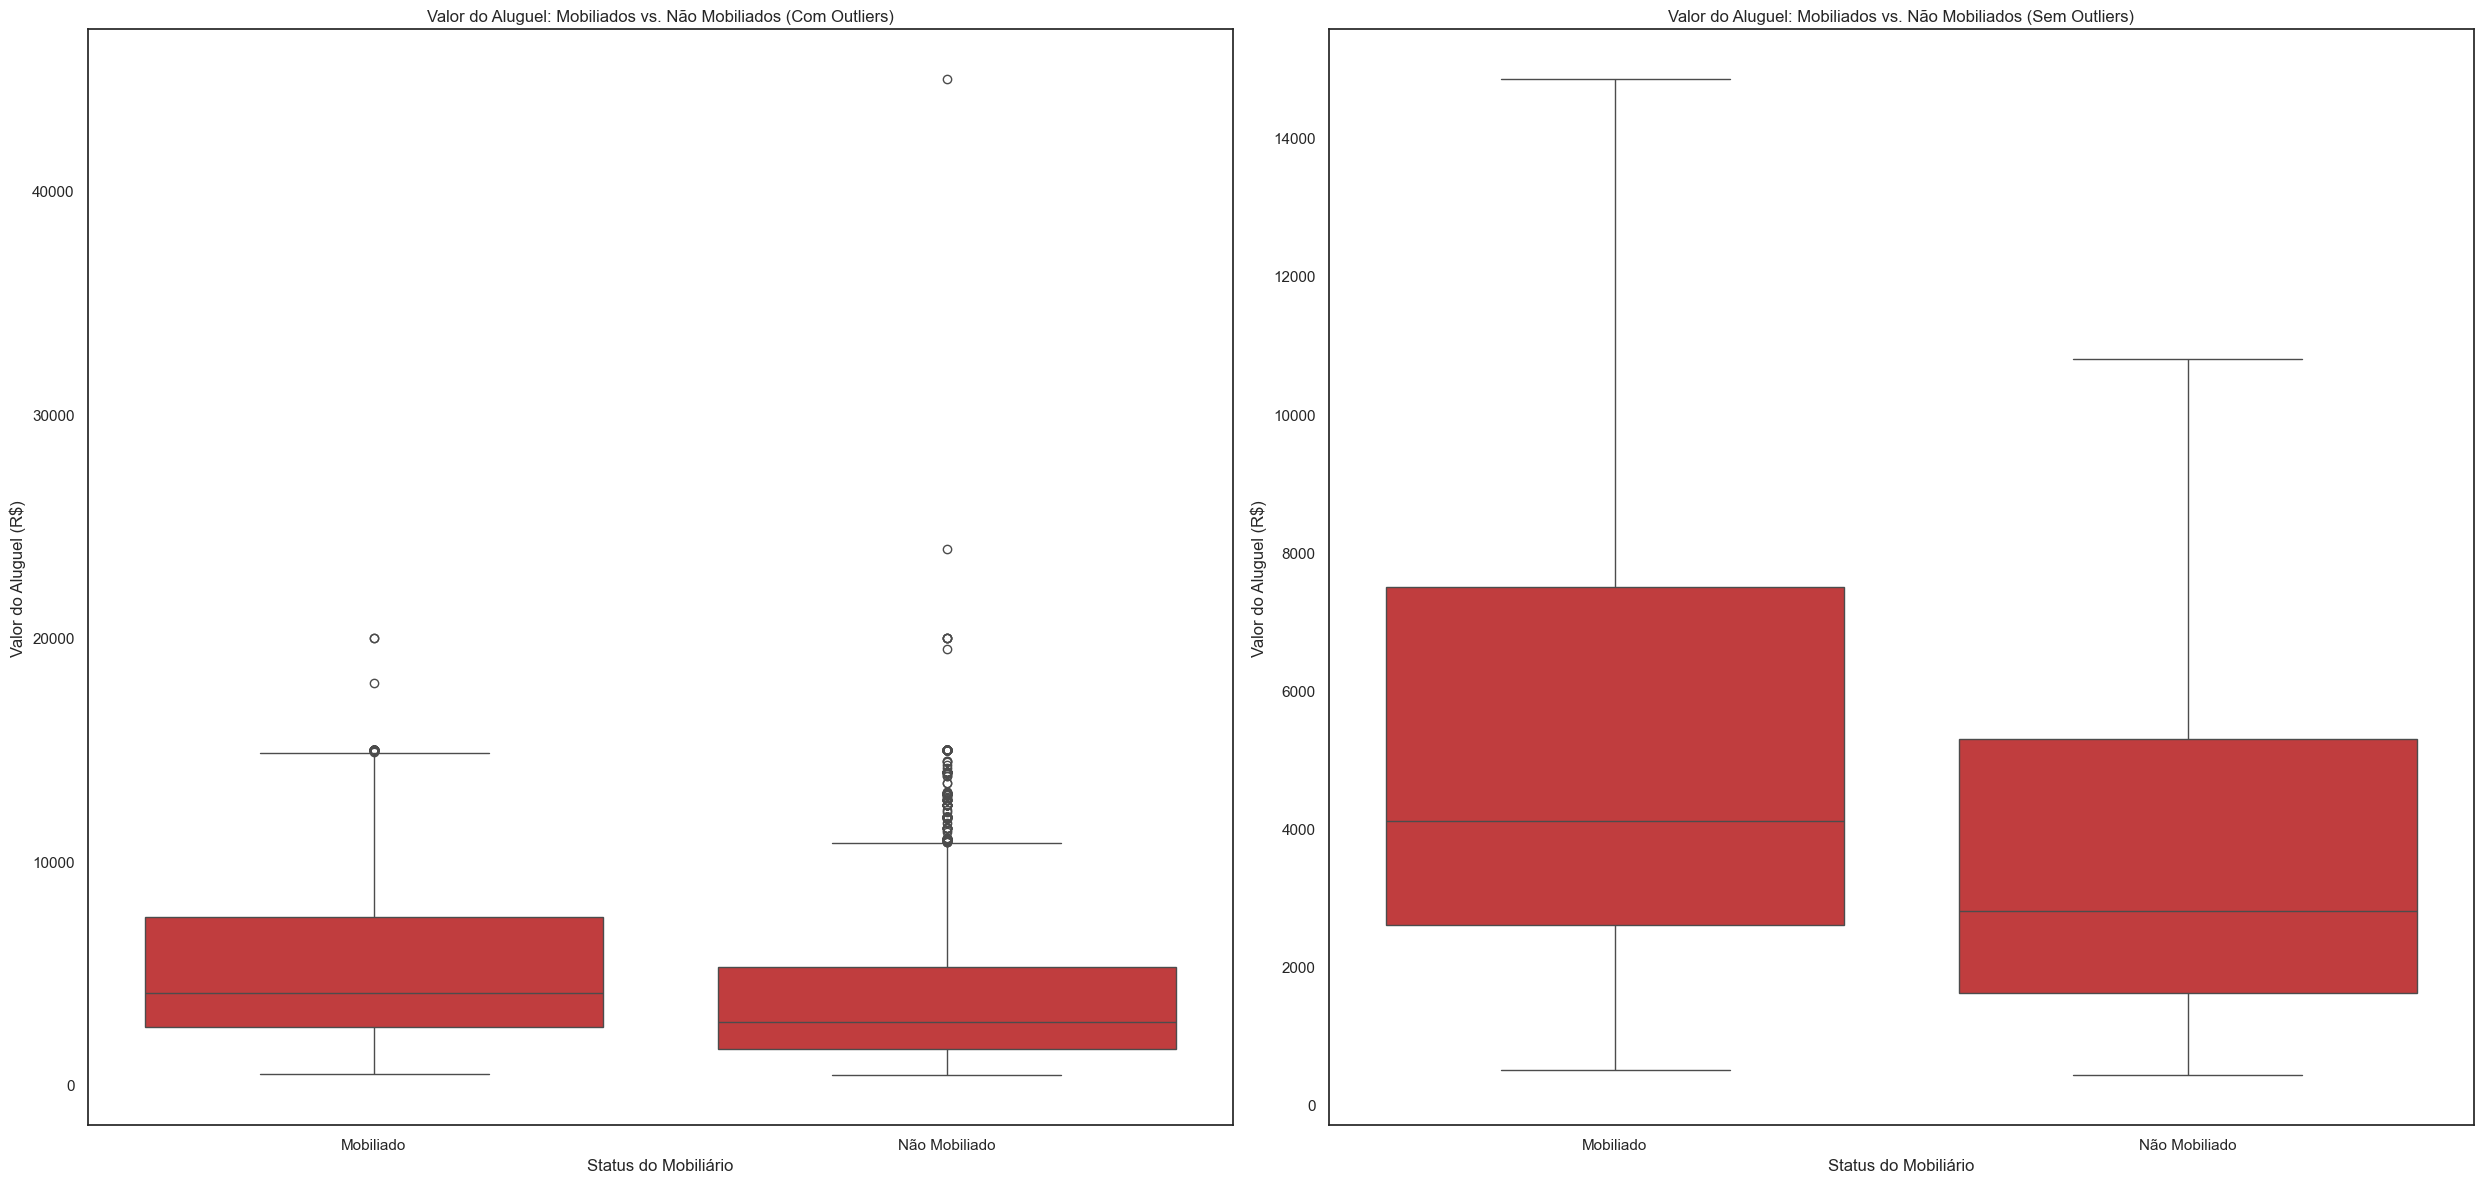

In [127]:
plt.figure()

# Gráfico de caixa com outliers
plt.subplot(1, 2, 1)
sns.boxplot(x = data['furniture'].map({0: 'Não Mobiliado', 1: 'Mobiliado'}), y = 'rent amount', data = data, color = cor4)
plt.title('Valor do Aluguel: Mobiliados vs. Não Mobiliados (Com Outliers)')
plt.xlabel('Status do Mobiliário')
plt.ylabel('Valor do Aluguel (R$)')

# Gráfico de caixa sem outliers
plt.subplot(1, 2, 2)
sns.boxplot(x = data['furniture'].map({0: 'Não Mobiliado', 1: 'Mobiliado'}), y = 'rent amount', data = data, showfliers = False, color = cor4)
plt.title('Valor do Aluguel: Mobiliados vs. Não Mobiliados (Sem Outliers)')
plt.xlabel('Status do Mobiliário')
plt.ylabel('Valor do Aluguel (R$)')

plt.tight_layout();
plt.savefig(homepath + 'reports/figures/pergunta15.png')

# Calculando a média do valor do aluguel para imóveis mobiliados e não mobiliados
mean_rent_furnished = data[data['furniture'] == 1]['rent amount'].mean()
mean_rent_unfurnished = data[data['furniture'] == 0]['rent amount'].mean()

print(f'A média de móveis mobiliados é de R${mean_rent_furnished}')
print(f'A média de móveis mobiliados é de R${mean_rent_unfurnished}')


Diferença no Valor do Aluguel entre Imóveis Mobiliados e Não Mobiliados:
    
- A média do valor do aluguel para imóveis não mobiliados é de aproximadamente R$ 4.047.
- Para imóveis mobiliados, a média do valor do aluguel é de cerca de R$ 5.387.

Isso sugere que, em média, imóveis mobiliados têm um valor de aluguel mais alto em comparação com imóveis não mobiliados, o que faz sentido.

### 16. Análise de densidade de imóveis por cidade: Qual cidade possui mais imóveis listados para aluguel? 

(city
 1    5249
 0     831
 Name: count, dtype: int64,
 6.316486161251504)

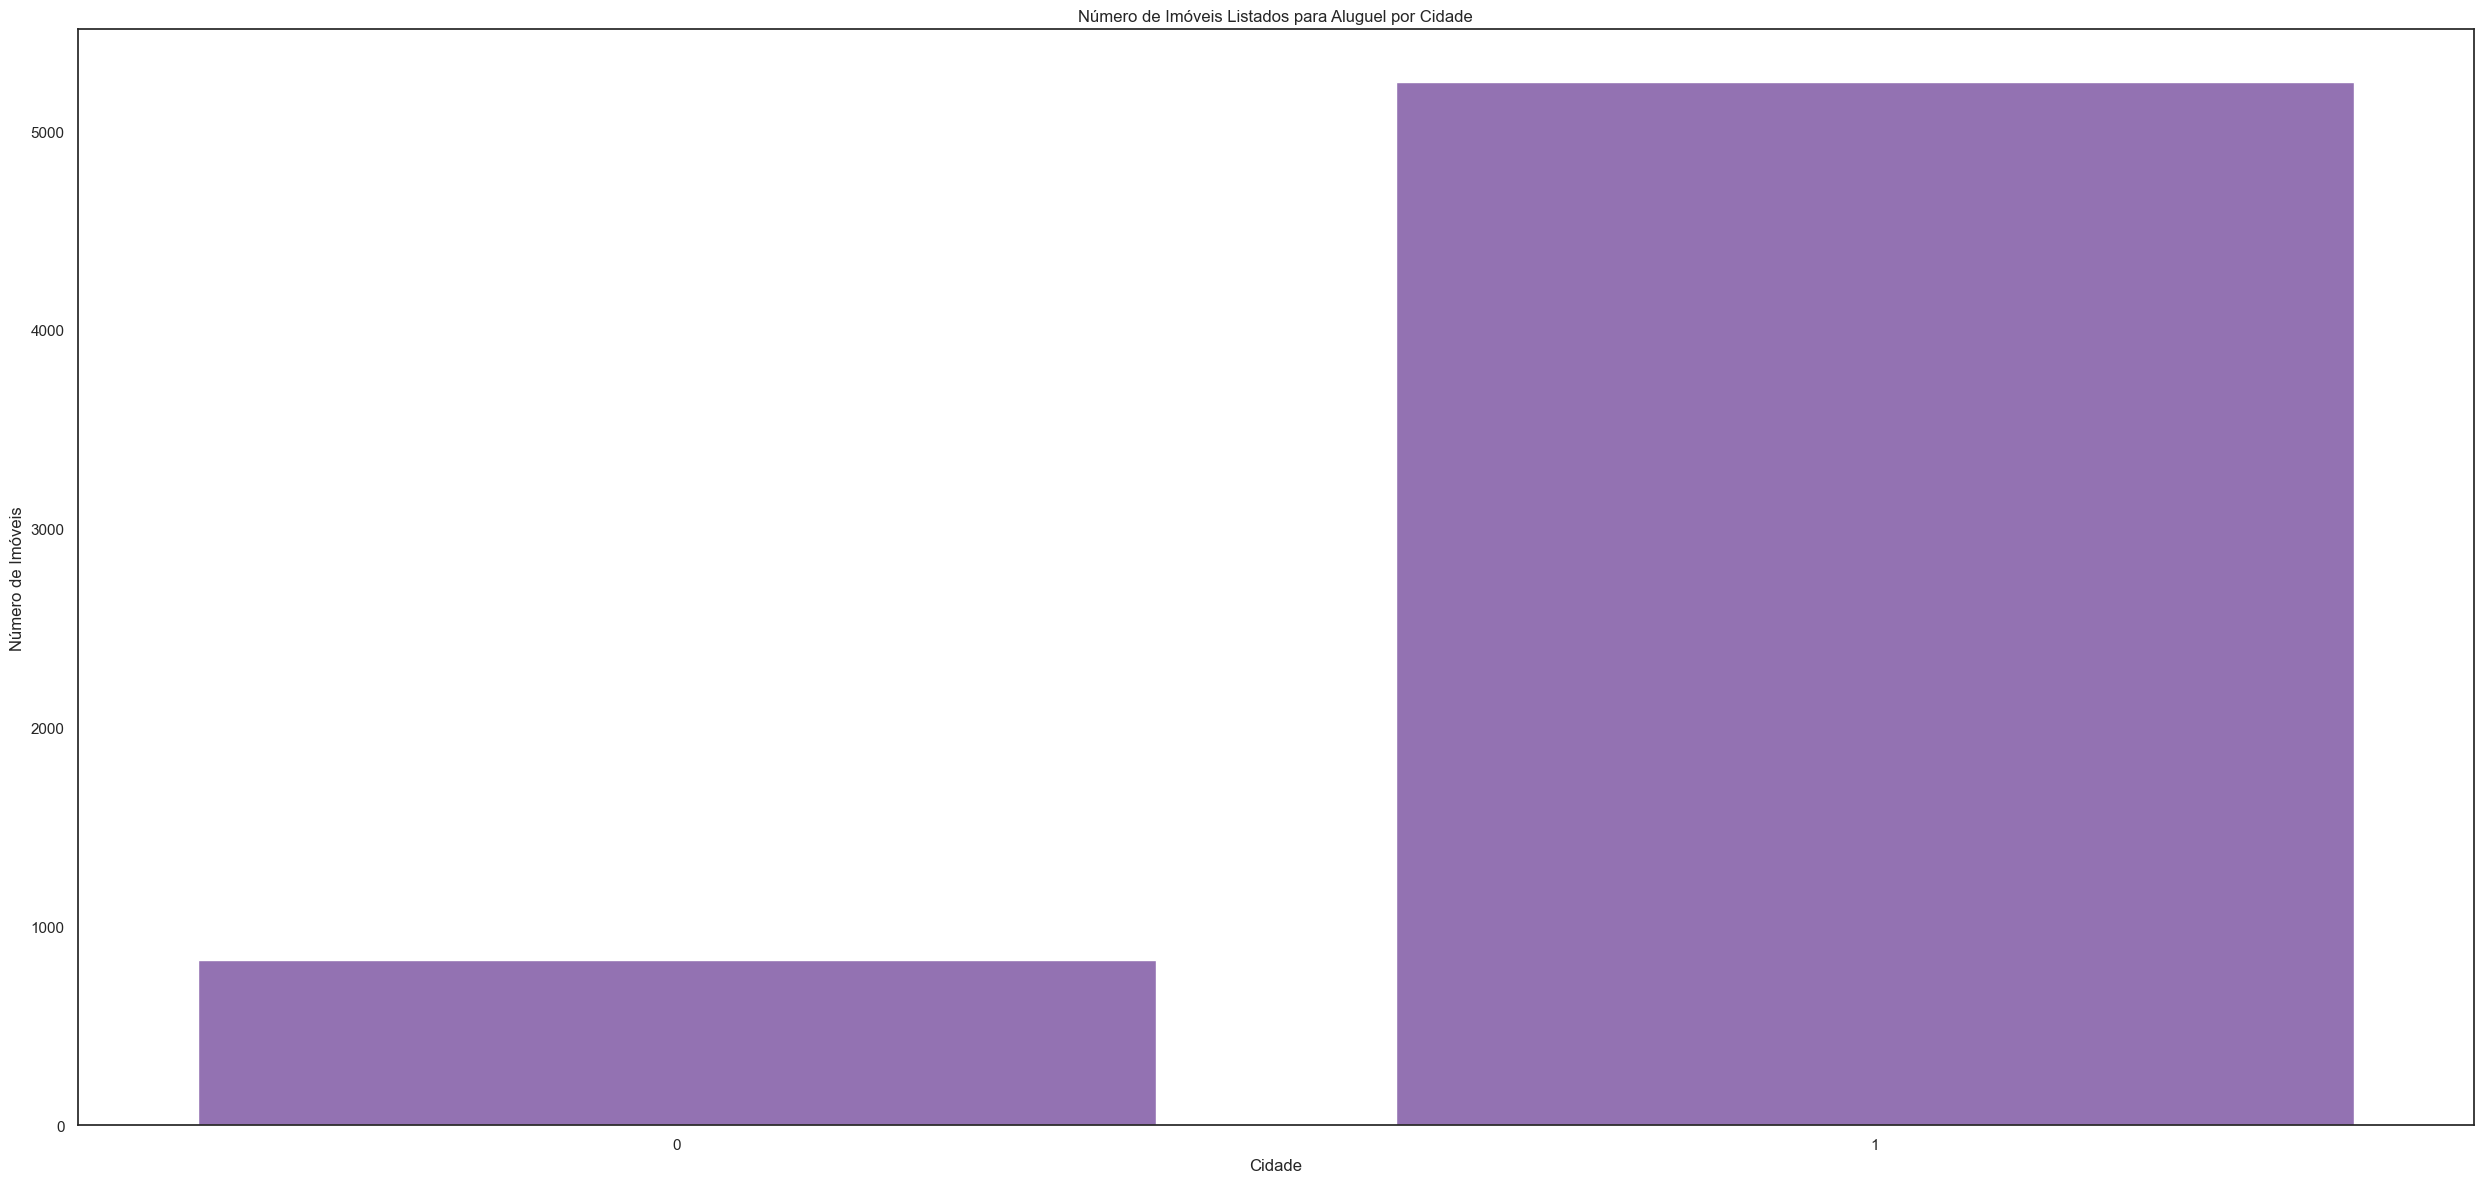

In [139]:
# Contando o número de imóveis listados para aluguel em cada cidade
count_city = data['city'].value_counts()

# Criando um gráfico de barras para mostrar o número de imóveis por cidade
plt.figure()
sns.barplot(x = count_city.index, y = count_city.values, color = cor5)
plt.title('Número de Imóveis Listados para Aluguel por Cidade')
plt.xlabel('Cidade')
plt.ylabel('Número de Imóveis')

plt.tight_layout();
plt.savefig(homepath + 'reports/figures/pergunta16.png')

count_city, 5249 / 831

A cidade com mais imóveis é a cidade 1 com 5249 cidades contra a cidade 0 com 831, 6,31 vezes mais.


### 17. Perfil dos imóveis mais caros e mais baratos: Quais características são comuns nos imóveis com os valores de aluguel mais altos e mais baixos? 

In [144]:
# Definindo os percentis para aluguéis altos e baixos
percentil_alto = data['rent amount'].quantile(0.75)
percentil_baixo = data['rent amount'].quantile(0.25)

# Filtrando imóveis com aluguéis altos e baixos
imoveis_altos = data[data['rent amount'] >= percentil_alto]
imoveis_baixos = data[data['rent amount'] <= percentil_baixo]

# Analisando características médias para imóveis com aluguéis altos
caracteristicas_altas = imoveis_altos[['area', 'rooms', 'bathroom', 'parking spaces', 'furniture', 'animal', 'hoa', 'property tax']].mean()

# Analisando características médias para imóveis com aluguéis baixos
caracteristicas_baixas = imoveis_baixos[['area', 'rooms', 'bathroom', 'parking spaces', 'furniture', 'animal', 'hoa', 'property tax']].mean()

print(caracteristicas_altas)

print(caracteristicas_baixas)


area               290.424342
rooms                3.398684
bathroom             3.765132
parking spaces       3.121053
furniture            0.354605
animal               0.823684
hoa               2115.780263
property tax       916.042763
dtype: float64
area               68.812338
rooms               1.701299
bathroom            1.224675
parking spaces      0.629221
furniture           0.114286
animal              0.690909
hoa               420.058442
property tax       63.169481
dtype: float64


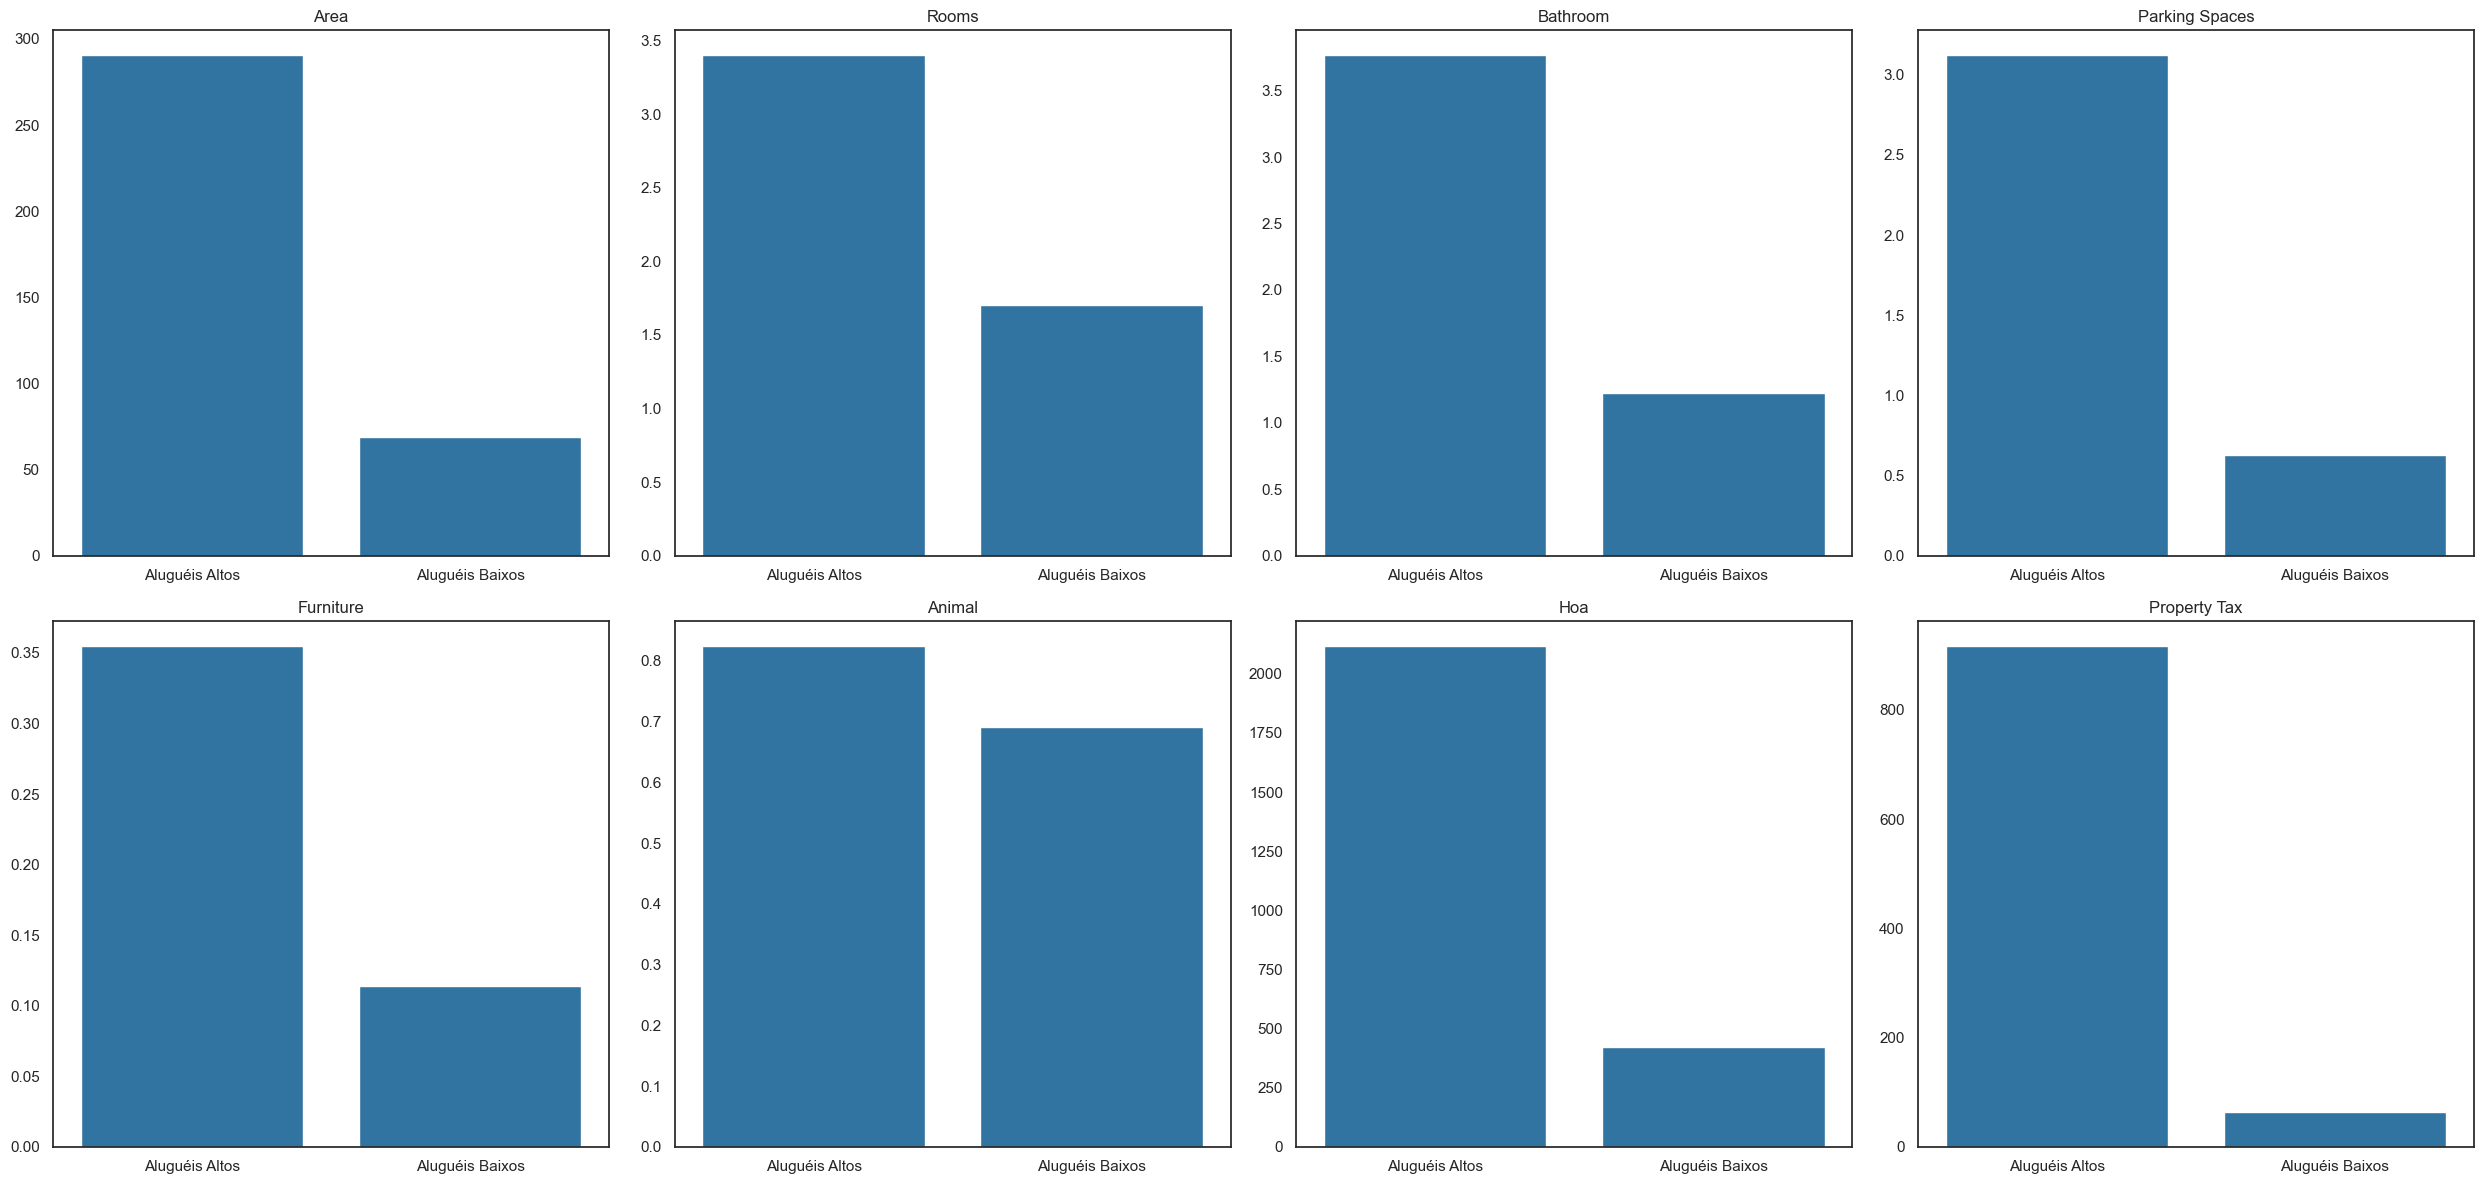

In [148]:
# Definindo os percentis para aluguéis altos e baixos
high_percentile = data['rent amount'].quantile(0.75)
low_percentile = data['rent amount'].quantile(0.25)

# Filtrando imóveis com aluguéis altos e baixos
high_rent = data[data['rent amount'] >= high_percentile]
low_rent = data[data['rent amount'] <= low_percentile]

# Lista de características para análise
features = ['area', 'rooms', 'bathroom', 'parking spaces', 'furniture', 'animal', 'hoa', 'property tax']

# Criando plots para comparar as características médias dos imóveis com aluguéis altos e baixos
plt.figure()

for i, caracteristica in enumerate(features, 1):
    plt.subplot(2, 4, i)
    sns.barplot(x=['Aluguéis Altos', 'Aluguéis Baixos'],
                y=[high_rent[caracteristica].mean(), low_rent[caracteristica].mean()], color = cor1)
    plt.title(caracteristica.title().replace('_', ' '))

plt.tight_layout();
plt.savefig(homepath + 'reports/figures/pergunta17.png')



As principais caraterísticas para aluguel caro são:
- **Área**: Em média, imóveis grandes;
- **Quartos**: Preferencia para mais quartos, geralmente a partir de 3;
- **Banheiros**: 3 ou acima;
- **Vagas de estacionamento**: Geralmente 3, em média;
- **Mobília**: Indiferente;
- **Animal**: Preferencialmente sim;
- **Taxa de condomínio**: Taxas superiores a 1750, valores altos para imóveis caros;
- **IPTU**: Alto valor de IPTU se comparado para aluguéis baratos;


As principais caraterísticas para aluguel barato são:
- **Área**: Em média, imóveis grandes;
- **Quartos**: Em média, 2 quartos;
- **Banheiros**: 1 ou 2;
- **Vagas de estacionamento**: Uma ou nenhuma, provavelmente alguns não possuem veículo próprio;
- **Furniture**: Sem mobília;
- **Animal**: Preferencialmente sim;
- **Taxa de condomínio**: Inferiores a 600, de preferência
- **IPTU**: De preferência, barato;

Em resumo:
- Área, Quartos e Banheiros: Imóveis com aluguéis mais altos tendem a ter uma área maior, mais quartos e banheiros.
- Vagas de Estacionamento: Há também uma tendência de mais vagas de estacionamento em imóveis com aluguéis mais altos.
- Mobília e Aceitação de Animais: Pode haver diferenças na presença de mobília e na aceitação de animais, embora essas características possam ser menos determinantes no valor do aluguel do que o tamanho e a localização do imóvel.
- HOA e IPTU: Os valores de HOA e IPTU parecem ser maiores em imóveis com aluguéis mais altos.


### 18. Relação entre quantidade de banheiros e quartos: Existe uma correlação entre o número de quartos (rooms) e o número de banheiros (bathroom)?

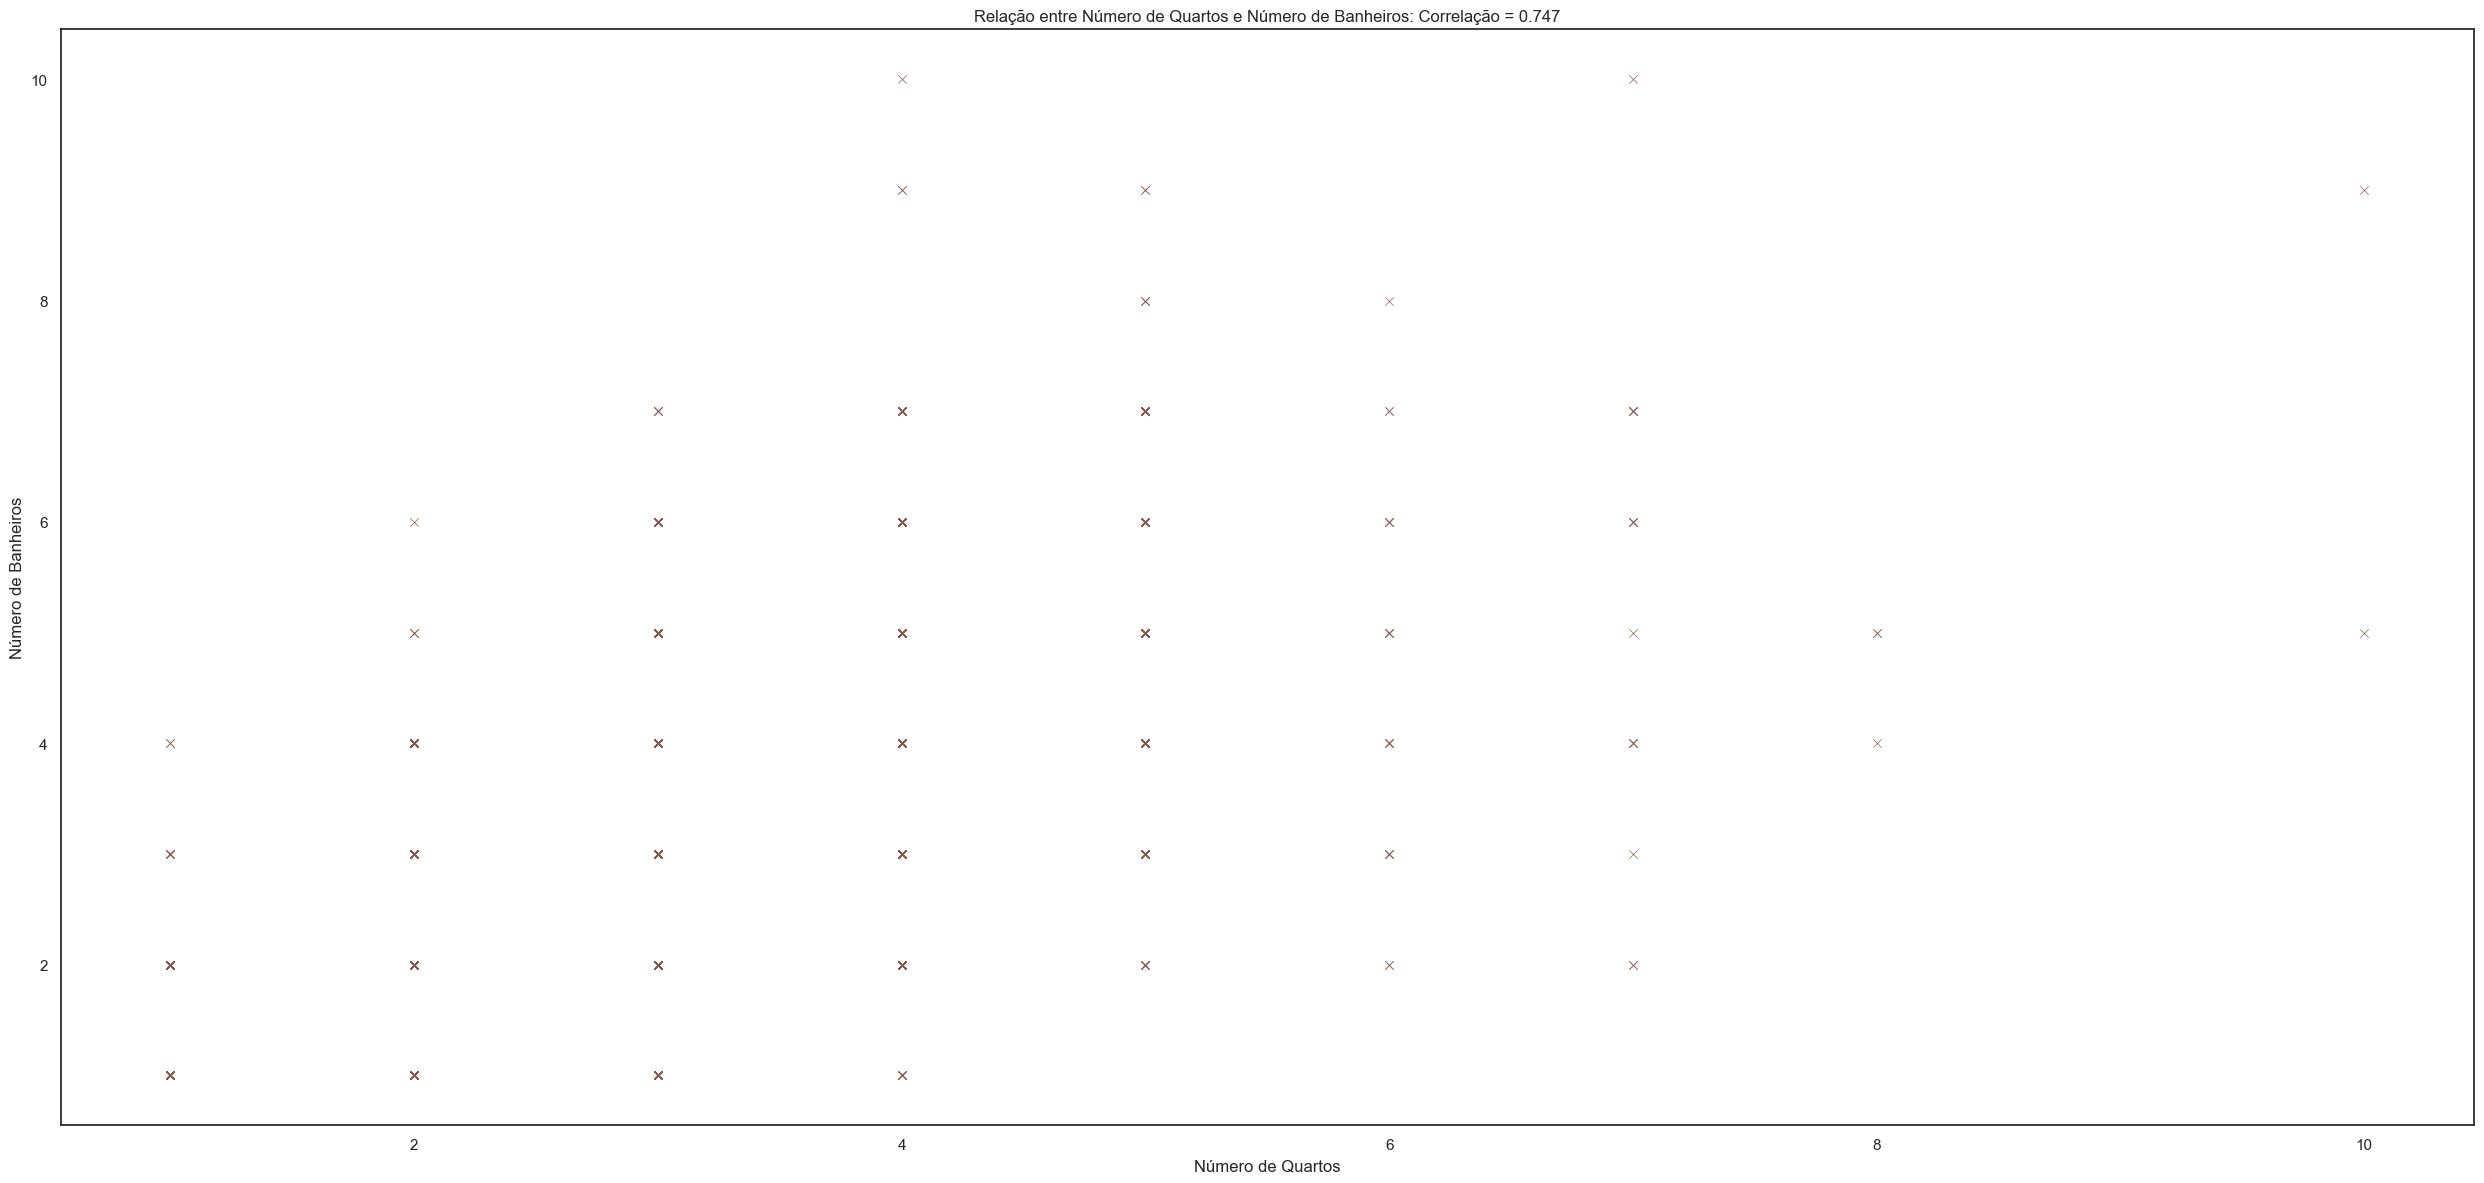

In [149]:
correlation_rooms_bathrooms = data['rooms'].corr(data['bathroom'])

plt.figure()
sns.scatterplot(x = 'rooms', y = 'bathroom', data = data, marker = 'x', color = cor6)

# Título e labels
plt.title(f'Relação entre Número de Quartos e Número de Banheiros: Correlação = {round(correlation_rooms_bathrooms, 3)}')
plt.xlabel('Número de Quartos')
plt.ylabel('Número de Banheiros')

plt.tight_layout();
plt.savefig(homepath + 'reports/figures/pergunta18.png')

O coeficiente de correlação entre o número de quartos e o número de banheiros é de aproximadamente 0.747, valor positivo e forte. Isso sugere que imóveis com mais quartos tendem a ter mais banheiros. Isso é consistente com a expectativa de que imóveis maiores, geralmente com mais quartos, ofereceriam também um maior número de banheiros para inquilinos.


### **DESAFIO 1**. Previsão de valor de aluguel baseado em características: Quais características são os melhores preditores para o valor do aluguel? 



### **DESAFIO 2**. Análise de agrupamento de imóveis: É possível identificar grupos de imóveis com características semelhantes? 
